<a href="https://colab.research.google.com/github/sahar-ghorbani/rental_offer_in_germany/blob/main/last_version_totalRent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saharghorbany","key":"c1e3e0d0bd0ec44ac7e346dbde50a5cc"}'}

In [ ]:
!mkdir  ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle datasets download -d alisharifi2000/talentmindphase1


!kaggle datasets download -d corrieaar/apartment-rental-offers-in-germany

 86% 80.0M/93.0M [00:01<00:00, 75.7MB/s]
100% 93.0M/93.0M [00:01<00:00, 60.1MB/s]


In [ ]:
!ls

apartment-rental-offers-in-germany.zip	kaggle.json  sample_data


In [ ]:
# import zipfile
# zip_ref = zipfile.ZipFile('talentmindphase1.zip', 'r')
# zip_ref.extractall('files')
# zip_ref.close()


import zipfile
zip_ref = zipfile.ZipFile('apartment-rental-offers-in-germany.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

# **Phase 1**

In [ ]:
! pip install scipy==1.6.2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from pathlib import Path  
import scipy
from scipy import stats
import plotly.express as px
import time
import datetime
from datetime import date


In [ ]:
print(scipy.__version__)

1.6.2


In [ ]:
pd.set_option('display.max_columns',None)
# data=pd.read_csv('/content/files/data.csv',lineterminator='\n')
data=pd.read_csv('/content/files/immo_data.csv',lineterminator='\n')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [ ]:
data.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [ ]:
data.sample(5)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
47251,Mecklenburg_Vorpommern,284.38,NaN,ONE_YEAR_FREE,NaN,True,False,11,4.07,40.0,1535.63,2020.0,113581222,NaN,NaN,True,Mecklenburg_Vorpommern,False,9.0,1251.25,NaN,113.75,Ludwigslust_Kreis,first_time_use,sophisticated,negotiable,no_information,NaN,False,7,apartment,19288,3.0,NaN,NaN,NaN,3,False,5,Ludwigslust_Kreis,Ludwigslust,"Der Campus ""Wohnen & Arbeiten"" bietet verschie...","Ausstattung \n- Bad mit Badewanne, Dusche\n- W...",NaN,NaN,NaN,NaN,NaN,Feb20
252539,Nordrhein_Westfalen,280.00,central_heating,ONE_YEAR_FREE,NaN,False,True,30,3.70,40.0,NaN,2000.0,105852113,1.0,gas,False,Nordrhein_Westfalen,True,5.0,945.00,7,112.90,Rheinisch_Bergischer_Kreis,well_kept,sophisticated,negotiable,Am Eichenberg,Am_Eichenberg,False,6,maisonette,51465,3.0,85.0,0.0,NaN,3,False,5,Rheinisch_Bergischer_Kreis,Bergisch_Gladbach,Gut geeignet für eine Familie mit bis zu 1 Kin...,- Elektrische Rollläden\n- Wohnzimmer/Schlafzi...,NaN,NaN,NaN,90.76,0.1985,Sep18
80701,Bayern,150.00,central_heating,ONE_YEAR_FREE,NaN,True,True,7,1.57,40.0,1680.00,2019.0,111375416,2.0,NaN,False,Bayern,True,9.0,1530.00,NaN,117.84,Ingolstadt,NaN,NaN,NaN,no_information,NaN,False,8,ground_floor,85051,4.0,NaN,NaN,NaN,4,True,5,Ingolstadt,Südwest,Hier entsteht ein modernes Wohnhaus mit insges...,Vinylboden,NaN,NaN,NaN,NaN,NaN,May19
127471,Niedersachsen,122.00,gas_heating,NaN,NaN,True,False,13,2.45,NaN,495.00,2019.0,112961510,NaN,NaN,True,Niedersachsen,False,9.0,373.00,"5a, 5b",23.87,Hannover,first_time_use,sophisticated,no,Chicago Lane,Chicago_Lane,False,2,apartment,30539,1.0,NaN,3.0,4.0,1,False,1,Hannover,Bemerode,Das aus zwei baugleichen Gebäuden bestehende S...,Jedes Appartement verfügt über ein eigenes Bad...,NaN,NaN,NaN,NaN,NaN,Feb20
140747,Bayern,250.00,gas_heating,ONE_YEAR_FREE,NaN,False,True,0,5.12,40.0,1050.00,1974.0,113821821,NaN,gas,True,Bayern,True,3.0,800.00,2 A,65.00,München,well_kept,normal,no,Anechostra&szlig;e,Anechostraße,False,5,other,81827,2.0,NaN,1.0,2.0,2,True,3,München,Trudering,Die Wohnung in der ersten Etage kann ab sofor ...,Parkett,NaN,NO_INFORMATION,2010.0,NaN,NaN,Oct19


In [ ]:
data.tail()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
268845,Bayern,90.0,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,910.0,2016.0,115641081,1.0,geothermal,False,Bayern,True,9.0,820.0,NaN,90.0,Weilheim_Schongau_Kreis,mint_condition,sophisticated,no,no_information,NaN,False,6,roof_storey,82390,3.0,NaN,NaN,NaN,3,False,4,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.0,gas_heating,NaN,NaN,False,True,12,6.49,NaN,1150.0,1983.0,96981497,1.0,gas,True,Hessen,False,4.0,930.0,NaN,115.0,Bergstraße_Kreis,well_kept,sophisticated,negotiable,no_information,NaN,False,6,apartment,68519,3.5,NaN,1.0,1.0,3,False,5,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,May19
268847,Hessen,220.0,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,930.0,1965.0,66924271,1.0,gas,False,Hessen,True,2.0,650.0,10,95.0,Limburg_Weilburg_Kreis,well_kept,NaN,negotiable,Emsbachstrasse,Emsbachstrasse,False,5,apartment,65552,4.0,160.77,1.0,2.0,4,True,4,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",NaN,NaN,2019.0,NaN,NaN,Feb20
268848,Nordrhein_Westfalen,175.0,heat_pump,NaN,NaN,True,True,16,4.39,NaN,1015.0,2019.0,110938302,1.0,gas,False,Nordrhein_Westfalen,True,9.0,840.0,58,70.0,Köln,first_time_use,sophisticated,no,Idastra&szlig;e,Idastraße,True,6,apartment,51069,2.0,24.70,NaN,5.0,2,False,3,Köln,Dellbrück,"Neubau Erstbezug, gehobener Standard, alle Ein...","Wände:\nMaler­vlies, weiß gestrichen alter­nat...",40.0,NO_INFORMATION,2019.0,NaN,NaN,May19
268849,Hessen,315.0,central_heating,NaN,NaN,False,True,9,5.00,NaN,NaN,1972.0,115524054,1.0,district_heating,True,Hessen,True,3.0,935.0,8,77.0,Frankfurt_am_Main,modernized,NaN,NaN,Robert-Di&szlig;mann-Str.,Robert-Dißmann-Str.,True,6,apartment,65936,3.0,NaN,NaN,13.0,3,False,3,Frankfurt_am_Main,Sossenheim,"Schöne, helle, gut geschnittene und teilmöblie...","Balkon, Keller, Fahrstuhl, Vollbad, Einbauküch...",NaN,NaN,NaN,NaN,NaN,Feb20


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [ ]:
data.describe().T.style.bar(subset=['mean']).background_gradient(subset=["std"])\
.background_gradient(subset=["50%"]).background_gradient(subset=["max"])

,count,mean,std,min,25%,50%,75%,max
serviceCharge,261941.000000,151.206113,308.295790,0.000000,95.000000,135.000000,190.000000,146118.000000
telekomHybridUploadSpeed,45020.000000,10.000000,0.000000,10.000000,10.000000,10.000000,10.000000,10.000000
picturecount,268850.000000,9.791958,6.408399,0.000000,6.000000,9.000000,13.000000,121.000000
pricetrend,267018.000000,3.389001,1.964874,-12.330000,2.000000,3.390000,4.570000,14.920000
telekomUploadSpeed,235492.000000,28.804928,16.337151,1.000000,10.000000,40.000000,40.000000,100.000000
totalRent,228333.000000,901.331522,33238.333822,0.000000,469.800000,650.000000,985.000000,15751535.000000
yearConstructed,211805.000000,1966.400590,46.992207,1000.000000,1950.000000,1973.000000,1996.000000,2090.000000
scoutId,268850.000000,106969670.362946,12500933.414895,28871743.000000,106691034.000000,111158376.000000,113768759.500000,115711743.000000
noParkSpaces,93052.000000,1.327634,8.361403,0.000000,1.000000,1.000000,1.000000,2241.000000
yearConstructedRange,211805.000000,3.714544,2.738134,1.000000,1.000000,3.000000,5.000000,9.000000


In [ ]:
data.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

In [ ]:
print(f'Number of columns is:',data.shape[1],'\nNumber of rows is:',data.shape[0])

Number of columns is: 49 
Number of rows is: 268850


In [ ]:
data.isna().sum().sort_values(ascending=False)

telekomHybridUploadSpeed    223830
electricityKwhPrice         222004
electricityBasePrice        222004
energyEfficiencyClass       191063
lastRefurbish               188139
heatingCosts                183332
noParkSpaces                175798
petsAllowed                 114573
interiorQual                112665
thermalChar                 106506
numberOfFloors               97732
houseNumber                  71018
streetPlain                  71013
condition                    68489
yearConstructed              57045
yearConstructedRange         57045
firingTypes                  56964
facilities                   52924
floor                        51309
heatingType                  44856
totalRent                    40517
typeOfFlat                   36614
telekomUploadSpeed           33358
telekomTvOffer               32619
description                  19747
serviceCharge                 6909
pricetrend                    1832
regio3                           0
regio2              

In [ ]:
def percent_missing_value(data,max_missing):
  percent = (data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)
  percent = percent[percent.values>=max_missing]
  Missing_df = pd.DataFrame({'value':percent.index, 'Missing values%':percent.values})
  return Missing_df


""" print percentage of the missing value for each feature
Args:
    data (DataFrame) : your dataset 
    max_missing (float): it uses to filter the percentage missing value

Returns:
    Missing_df: a DataFrame of Values and percentage of Missing Value for each feature 

"""


In [ ]:
percent_missing_value(data,30)

,value,Missing values%
0,telekomHybridUploadSpeed,83.254603
1,electricityKwhPrice,82.575414
2,electricityBasePrice,82.575414
3,energyEfficiencyClass,71.066766
4,lastRefurbish,69.979171
5,heatingCosts,68.191185
6,noParkSpaces,65.388879
7,petsAllowed,42.615957
8,interiorQual,41.906267
9,thermalChar,39.615399


In [ ]:
def uniqueness(data):
  unique = data.nunique().sort_values(ascending=True)
  unique_df = pd.DataFrame({'value':unique.index, 'uniqueness':unique.values})
  return unique_df
# unique_df

""" it shows the uniqueness of each feature
Args:
    data (DataFrame) : your dataset 

Returns:
    unique_df: a DataFrame of the value and uniqueness for each feature

"""



In [ ]:
uniqueness(data)

,value,uniqueness
0,telekomHybridUploadSpeed,1
1,electricityBasePrice,2
2,garden,2
3,newlyConst,2
4,balcony,2
5,lift,2
6,cellar,2
7,hasKitchen,2
8,telekomTvOffer,3
9,petsAllowed,3


In [ ]:
def distribution(data):
  # data = data.select_dtypes(exclude=['object'])
  data = data.select_dtypes(include=['float64'])
  for cols in data.columns:
    sns.distplot(data[cols],fit=norm,bins=40)
    plt.show()


"""  it shows the distribution plot of each feature
Args:
    data (DataFrame) : your dataset 

Returns:
    Distribution plot of each feature
"""



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


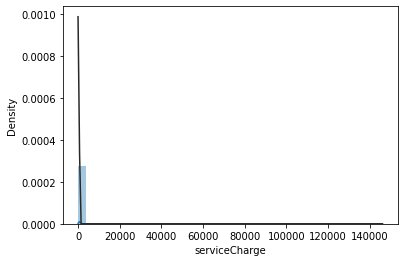

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


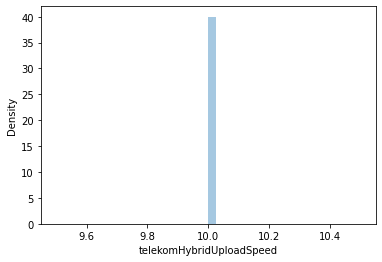

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


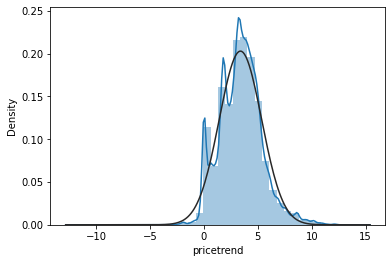

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


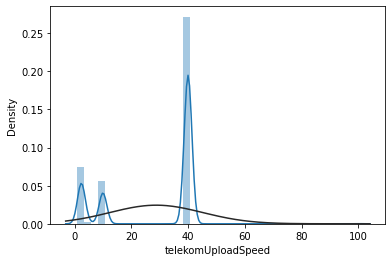

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


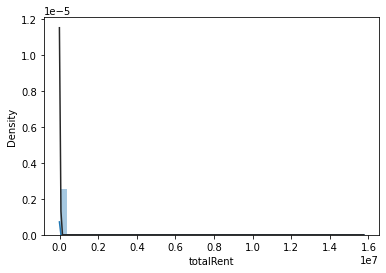

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


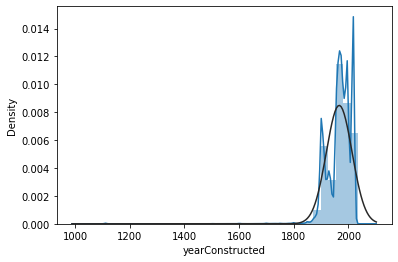

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


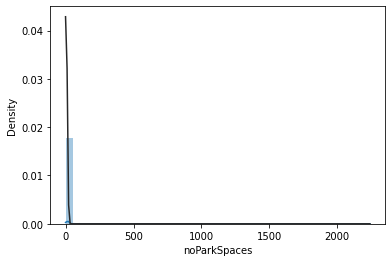

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


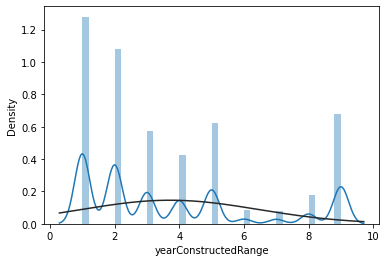

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


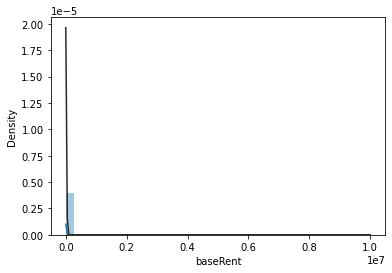

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


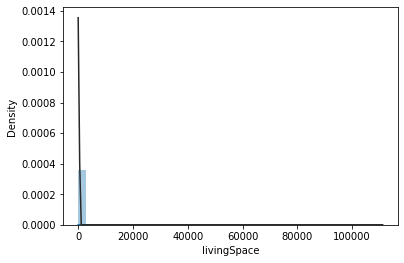

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


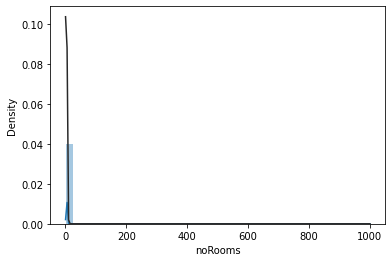

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


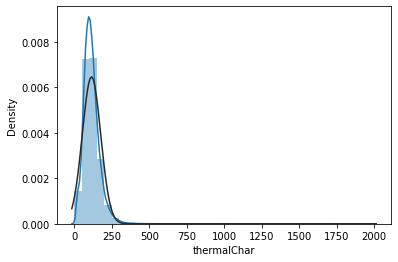

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


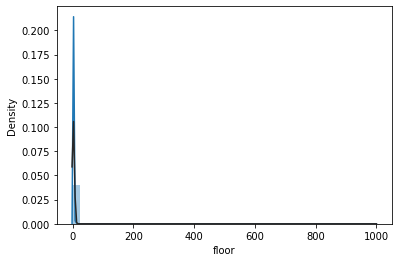

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


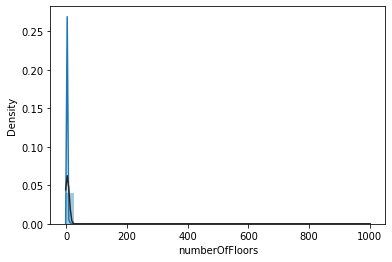

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


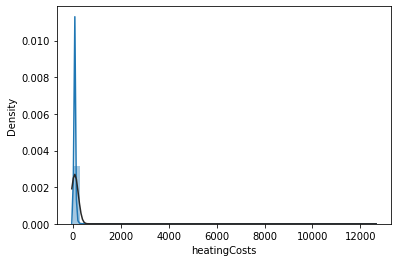

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


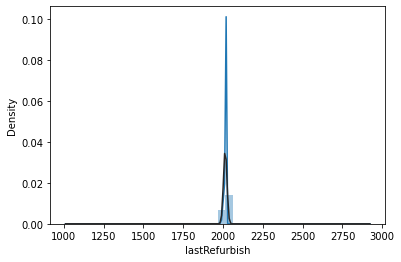

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


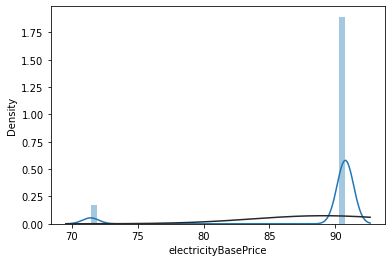

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


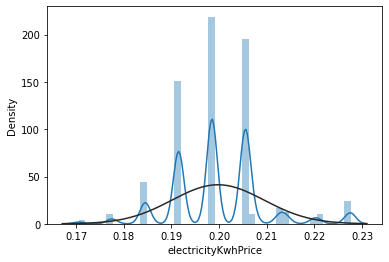

In [ ]:
distribution(data)

In [ ]:
def boxPlot(data):
  # data = data.select_dtypes(exclude=['object'])
  data = data.select_dtypes(include=['float64'])
  for cols in data.columns:
    sns.boxplot(data[cols])
    plt.show()

""" it shows the Boxplot of each feature
Args:
    data (DataFrame) : your dataset 

Returns:
    distribution plot of each feature with max, min, Q3, and Q1
"""



In [ ]:
#************************************

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


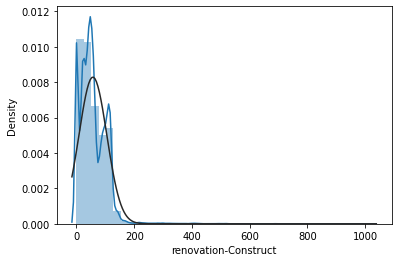

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


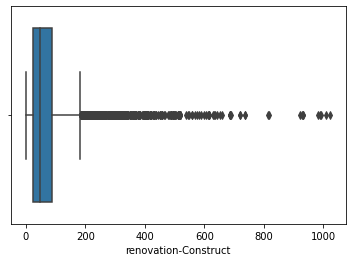

In [ ]:
#Create new feature : yearConstructed-lastRefurbish to improve outlier detection
d=data
d['renovation-Construct']=d['lastRefurbish']-d['yearConstructed']
sns.distplot(d['renovation-Construct'],fit=norm,bins=40)
plt.show()
sns.boxplot(d['renovation-Construct'])

In [ ]:
d = d.loc[ (d['renovation-Construct'] >= d['renovation-Construct'].mean() + d['renovation-Construct'].std()*3) | (d['renovation-Construct'] <= d['renovation-Construct'].mean() - d['renovation-Construct'].std()*3) ]

In [ ]:
np.nanpercentile(d['renovation-Construct'],75)
np.nanpercentile(d['renovation-Construct'],25)

1023.0

In [ ]:
# **************************

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


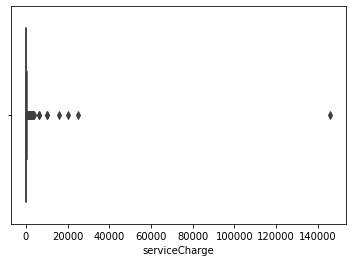

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


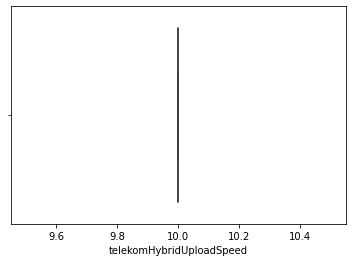

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


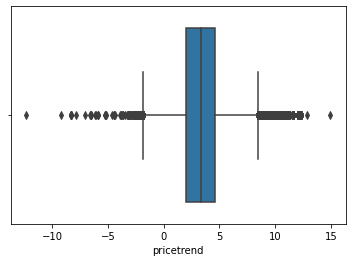

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


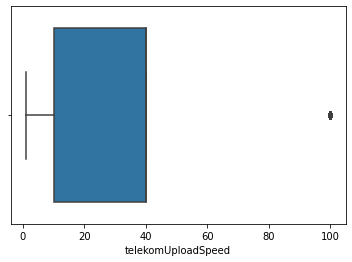

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


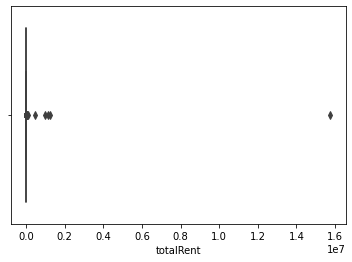

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


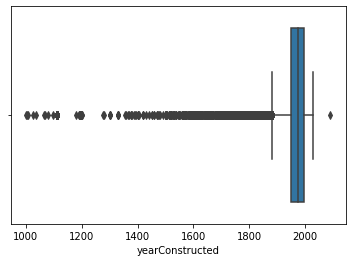

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


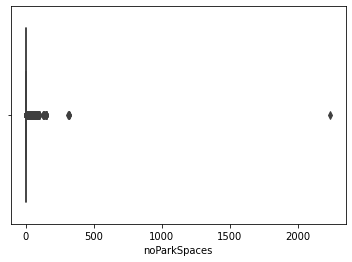

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


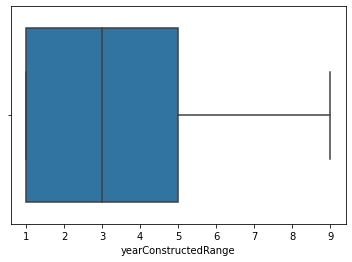

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


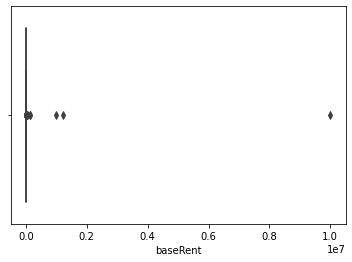

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


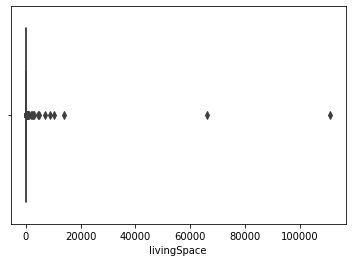

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


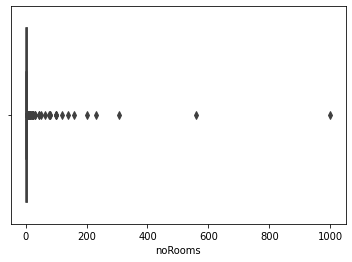

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


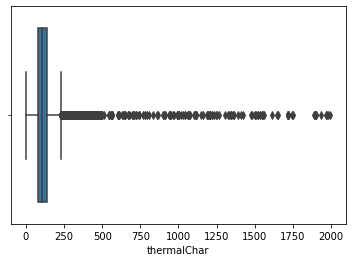

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


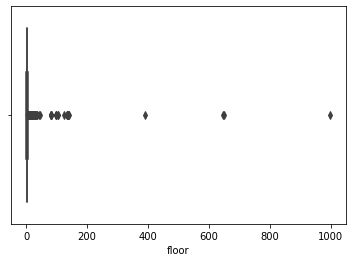

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


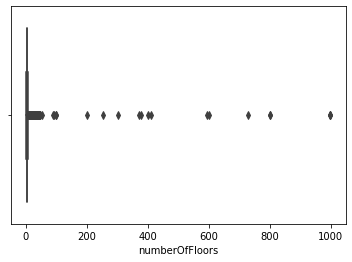

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


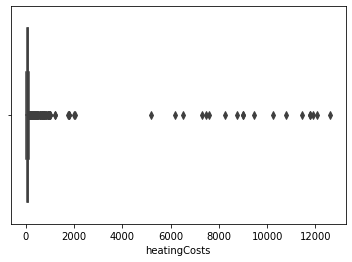

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


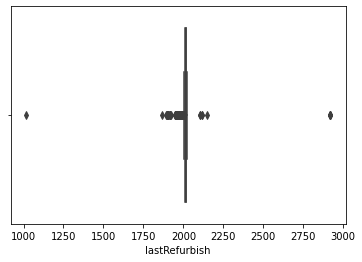

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


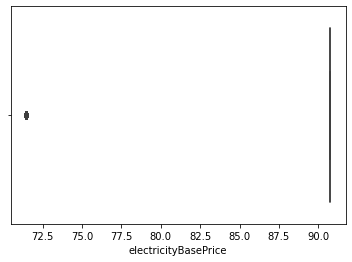

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


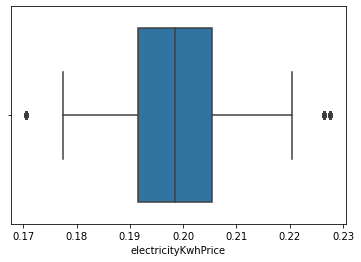

In [ ]:
boxPlot(data)

In [ ]:
def violinPlot(data):
  # data = data.select_dtypes(exclude=['object'])
  data = data.select_dtypes(include=['float64'])
  for cols in data.columns:
    sns.violinplot(data[cols])
    plt.show()


""" it shows the distribution plot of each feature
Args:
    data (DataFrame) : your dataset 

Returns:
  The Violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of
     one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components 
     correspond to actual data points, the violin plot features a kernel density estimation of the underlying distribution.
"""


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


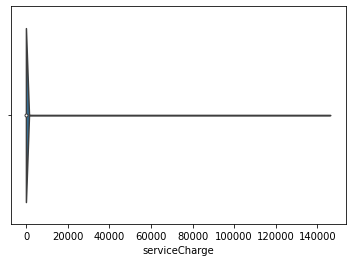

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


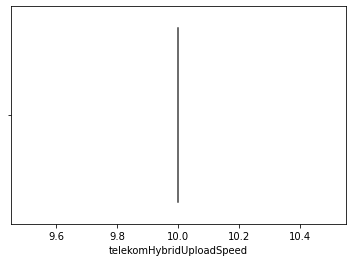

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


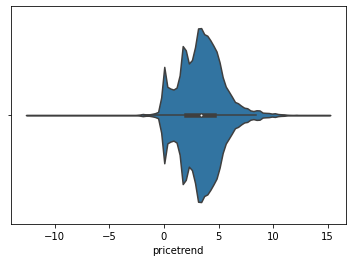

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


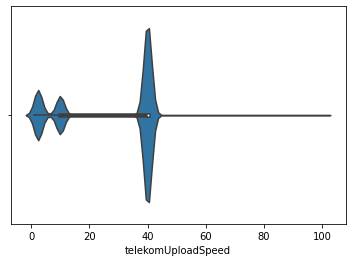

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


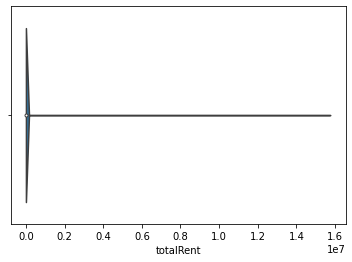

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


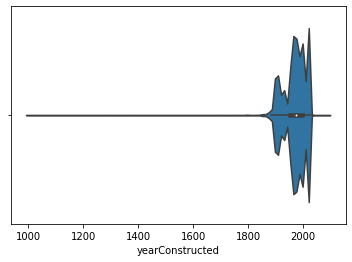

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


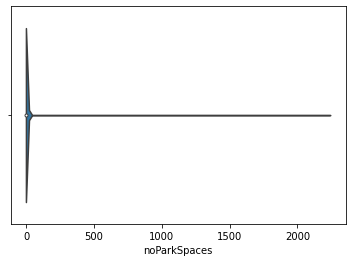

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


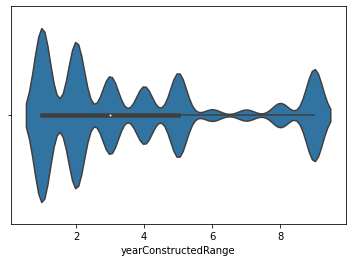

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


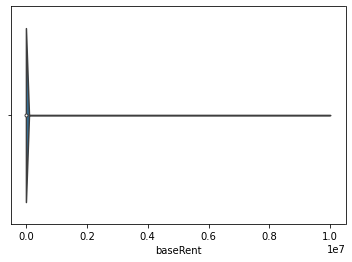

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


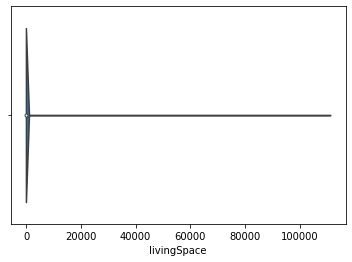

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


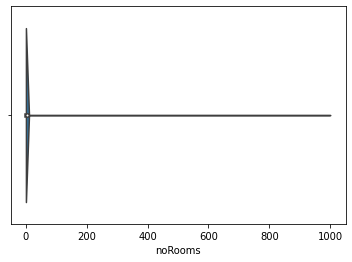

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


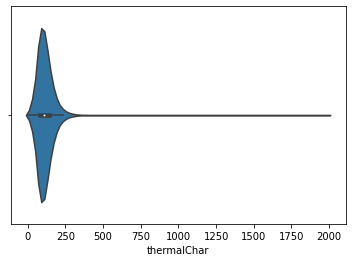

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


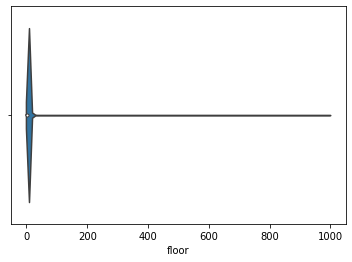

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


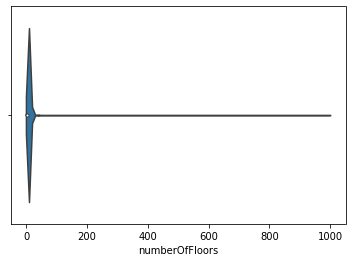

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


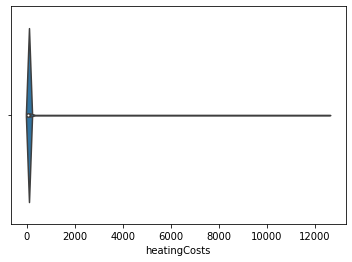

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


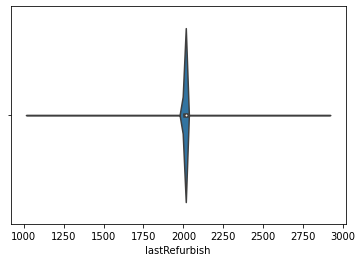

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


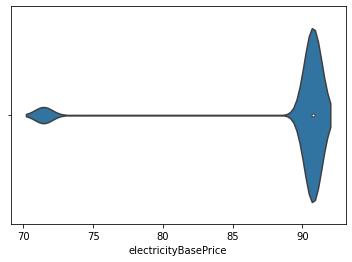

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


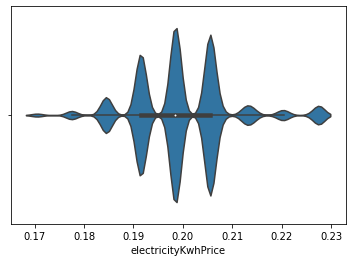

In [ ]:
violinPlot(data)

In [ ]:
# from pathlib import Path  
# filepath = Path('D:/Data Science/LOOp/out.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# d.to_csv(filepath) 


# import os  
# d= data.head()
# # os.makedirs('D:/Data Science/LOOp', exist_ok=True)  
# d.to_csv('out.csv') 

In [ ]:
ROOT = 'outliers/excel_files/' 
def save_csv(data,column):
  path = ROOT + column +'.csv'
  filepath = Path(path)  
  filepath.parent.mkdir(parents=True, exist_ok=True)  
  data.to_csv(filepath) 


""" Save CSV Files in a specific path
Args:
    data (DataFrame) : your dataset 
    columns (String) : name of your column that you want to save in CSV format

Returns:
    save 'column'.csv in the specific path 
"""

In [ ]:
def outliere_IQR(data,columns):
  for col in columns:
    q1 = np.nanpercentile(data[col], 25)
    q3 = np.nanpercentile(data[col], 75)
    iqr = q3 - q1
    data1 = data.loc[ (data[col] <= q1 - 1.5*iqr) | (data[col] >= q3 + 1.5*iqr) ]
    print(col)
    display(data1)
    save_csv(data1[[col,'scoutId']],col)



""" It finds outliers in each column.
Args:
    data (DataFrame) : your dataset 
    columns (list) : list of your features where distributions are not normal

Returns:
    Display DataFrame include of outliers, and save it in a CSV file
"""

In [ ]:
IQR_list = ['serviceCharge','telekomUploadSpeed','totalRent','yearConstructed','noParkSpaces','yearConstructedRange',
 'baseRent','livingSpace','noRooms','floor','numberOfFloors','heatingCosts','electricityBasePrice','electricityKwhPrice','lastRefurbish']

In [ ]:
std_list = ['thermalChar','picturecount','pricetrend']

In [ ]:
outliere_IQR(data,IQR_list)

serviceCharge


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
22,Sachsen,346.0,central_heating,ONE_YEAR_FREE,NaN,False,True,22,5.34,40.0,1946.0,NaN,111412293,NaN,district_heating,False,Sachsen,False,NaN,1600.0,66,140.00,Leipzig,first_time_use_after_refurbishment,NaN,NaN,Aurelienstr.,Aurelienstr.,True,8,roof_storey,4229,4.0,NaN,0.0,NaN,4,True,6,Leipzig,Lindenau,Umgeben von neu sanierten Indurstriedenkmalen ...,LIFESTYLE VERBINDET\nIDEAL FÜR LIEBHABER DES I...,NaN,NaN,2019.0,NaN,NaN,Oct19
96,Hamburg,450.0,NaN,ONE_YEAR_FREE,10.0,False,True,9,3.95,10.0,NaN,1978.0,115639691,1.0,NaN,False,Hamburg,True,3.0,2290.0,NaN,142.00,Hamburg,well_kept,NaN,no,no_information,NaN,False,9,NaN,22607,4.0,NaN,1.0,NaN,4,False,6,Hamburg,Groß_Flottbek,In einer der beliebtesten Lagen in Groß Flottb...,NaN,NaN,NaN,NaN,NaN,NaN,Feb20
115,Hessen,340.0,central_heating,ONE_YEAR_FREE,10.0,False,True,4,2.21,2.4,1710.0,NaN,113180289,NaN,gas,False,Hessen,False,NaN,1370.0,NaN,136.00,Wiesbaden,fully_renovated,NaN,NaN,no_information,NaN,True,7,roof_storey,65183,5.0,NaN,NaN,NaN,5,False,6,Wiesbaden,Mitte,Die wunderbare Altbauwohnung liegt in der ober...,"Energieausweis ist nicht notwendig, das Haus s...",NaN,NaN,NaN,NaN,NaN,Oct19
165,Baden_Württemberg,370.0,NaN,NaN,NaN,True,True,12,6.11,NaN,2400.0,2019.0,109940808,NaN,gas,False,Baden_Württemberg,False,9.0,2030.0,NaN,123.22,Rems_Murr_Kreis,NaN,NaN,NaN,no_information,NaN,True,9,apartment,73614,3.0,52.2,NaN,4.0,3,False,6,Rems_Murr_Kreis,Schorndorf,"Ein Zuhause im Stadtzentrum, davon träumen vie...","QUALITÄT und STIL bis ins kleinste Detail, so ...",NaN,NaN,NaN,NaN,NaN,Oct19
182,Nordrhein_Westfalen,370.0,floor_heating,ONE_YEAR_FREE,NaN,False,True,32,3.85,10.0,2205.0,2015.0,79343710,NaN,natural_gas_light,False,Nordrhein_Westfalen,True,8.0,1550.0,125,148.00,Dortmund,mint_condition,luxury,NaN,Olpketalstra&szlig;e,Olpketalstraße,True,8,apartment,44229,3.0,16.5,2.0,3.0,3,False,6,Dortmund,Lücklemberg,Qi – das innovative Wohnresort an der Olpketal...,- Separater Schlaftrakt mit Ankleide und Desig...,120.0,A_PLUS,NaN,NaN,NaN,May19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268606,Hessen,1100.0,NaN,ONE_YEAR_FREE,10.0,True,True,6,4.38,10.0,5700.0,2019.0,114964082,2.0,NaN,True,Hessen,True,9.0,4600.0,76,153.00,Frankfurt_am_Main,first_time_use,luxury,negotiable,Oberlindau,Oberlindau,True,9,apartment,60323,3.0,NaN,6.0,13.0,3,False,7,Frankfurt_am_Main,Westend_Süd,Das Onyx liegt im Herzen des Westends in beste...,Diese besondere Wohnung wurde mit feinsten Mat...,NaN,NaN,2019.0,NaN,NaN,Feb20
268644,Baden_Württemberg,342.0,central_heating,ONE_YEAR_FREE,NaN,False,True,12,1.61,40.0,2692.0,2016.0,113697664,3.0,environmental_thermal_energy,False,Baden_Württemberg,True,9.0,2200.0,1,171.81,Bodenseekreis,first_time_use,sophisticated,NaN,Ravensburger Stra&szlig;e,Ravensburger_Straße,True,9,apartment,88069,5.0,14.0,10.0,11.0,5,False,7,Bodenseekreis,Tettnang,Neubauobjekt.,"Hochwertige Fliesen im gesamten Objekt, modern...",NaN,A_PLUS,NaN,NaN,NaN,Oct19
268714,Baden_Württemberg,350.0,district_heating,ONE_YEAR_FREE,NaN,False,False,25,4.16,10.0,2600.0,2017.0,91472965,NaN,district_heating,True,Baden_Württemberg,True,9.0,2250.0,22,155.00,Mannheim,mint_condition,luxury,negotiable,Stresemannstr.,Stresemannstr.,True,9,apartment,68165,3.5,NaN,2.0,6.0,3,False,7,Mannheim,Schwetzingerstadt_/_Ost

telekomUploadSpeed


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
831,Sachsen,70.0,gas_heating,ONE_YEAR_FREE,NaN,False,False,5,1.92,100.0,240.0,1911.0,89407447,NaN,gas,False,Sachsen,True,1.0,170.0,24,32.49,Chemnitz,well_kept,normal,NaN,Fichtestra&szlig;e,Fichtestraße,False,1,roof_storey,9126,1.5,NaN,4.0,4.0,1,False,1,Chemnitz,Gablenz,Denkmalgeschütztes saniertes Mehrfamilienhaus ...,Hübsche kleine Singelwohnung mit offener Küche...,NaN,NaN,2005.0,90.76,0.2055,Sep18
1306,Sachsen,80.0,central_heating,ONE_YEAR_FREE,NaN,False,False,8,1.96,100.0,393.0,NaN,60244952,NaN,gas,True,Sachsen,False,NaN,248.0,4,65.33,Chemnitz,fully_renovated,normal,NaN,Paul-Gruner-Stra&szlig;e,Paul-Gruner-Straße,False,1,other,9120,2.0,NaN,2.0,5.0,2,True,3,Chemnitz,Altchemnitz,In dem sanierten Altbau liegt die Wohnung im ...,"Die Wohnung verfügt über 2 Zimmer, Küche und B...",65.0,NaN,NaN,NaN,NaN,Feb20
1521,Sachsen_Anhalt,100.0,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,False,7,1.79,100.0,550.0,1900.0,65691753,1.0,NaN,False,Sachsen_Anhalt,False,1.0,450.0,110,85.00,Magdeburg,fully_renovated,normal,NaN,Halberst&auml;dter Stra&szlig;e,Halberstädter_Straße,False,3,apartment,39112,3.0,174.4,3.0,3.0,3,False,4,Magdeburg,Sudenburg,Sanierter Altbau im Herzen Sudenburgs an der H...,"- helle, renovierte Wohnräume - Laminatböden \...",NaN,NaN,NaN,NaN,NaN,Oct19
6735,Sachsen_Anhalt,150.0,central_heating,ONE_YEAR_FREE,NaN,False,True,24,1.92,100.0,NaN,1994.0,57206381,1.0,oil,False,Sachsen_Anhalt,True,5.0,390.0,04,70.00,Saalekreis,well_kept,normal,negotiable,Rampitzer Stra&szlig;e,Rampitzer_Straße_,False,2,roof_storey,6231,2.0,122.0,2.0,2.0,2,True,3,Saalekreis,Nempitz,Frei stehendes Mehrfamilienhaus mit zwei getre...,Sehr schön geschnittene Zwei- Raumwohnung mit ...,NaN,NO_INFORMATION,NaN,NaN,NaN,Oct19
8225,Sachsen,118.0,central_heating,ONE_YEAR_FREE,NaN,False,True,15,1.92,100.0,398.0,1928.0,90865567,NaN,district_heating,True,Sachsen,True,1.0,280.0,97,49.10,Chemnitz,refurbished,sophisticated,negotiable,Heimgarten,Heimgarten,False,1,NaN,9127,2.0,103.1,1.0,3.0,2,True,2,Chemnitz,Gablenz,Das Objekt ist ein hochwertig saniertes und de...,- hochwertiges Laminat in Ahorn-Optik\n- moder...,NaN,NaN,NaN,NaN,NaN,May19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261264,Bayern,260.0,central_heating,ONE_YEAR_FREE,NaN,False,True,7,4.11,100.0,1300.0,2016.0,89715048,1.0,pellet_heating,True,Bayern,True,9.0,990.0,NaN,115.73,Mühldorf_am_Inn_Kreis,mint_condition,sophisticated,negotiable,no_information,NaN,True,6,penthouse,84453,4.0,45.7,3.0,3.0,4,True,5,Mühldorf_am_Inn_Kreis,Mühldorf_am_Inn,+++++++++++++++++++++++++++++++++++\n\nBei Int...,einige Highlights der hochwertigen Ausstattung...,NaN,NaN,NaN,NaN,NaN,May19
262558,Sachsen,180.0,central_heating,ONE_YEAR_FREE,NaN,False,False,14,3.70,100.0,NaN,1910.0,78324786,NaN,district_heating,False,Sachsen,True,1.0,430.0,2,65.97,Dresden,fully_renovated,NaN,negotiable,Scariastra&szlig;e,Scariastraße,False,3,roof_storey,1277,2.0,105.0,2.0,3.0,2,False,3,Dresden,Blasewitz,+ stilvoll saniertes Mehrfamilienhaus in Blase...,+ 2-Raum-Wohnung im DG\r\n+ Wohnküche\r\n+ Lam...,NaN,NaN,2004.0,90.76,0.2055,Sep18
263758,Rheinland_Pfalz,225.0,floor_heating,ONE_YEAR_FREE,NaN,False,True,24,4.72,100.0,1620.0,2017.0,95168534,1.0,district_heating,True,Rheinland_Pfalz,True,9.0,1395.0,13,107.00,Mainz,m

totalRent


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
19,Niedersachsen,290.0,district_heating,ONE_YEAR_FREE,NaN,False,True,35,2.35,5.0,1878.48,2013.0,113019528,1.0,district_heating,False,Niedersachsen,True,8.0,1343.48,3,127.95,Göttingen_Kreis,mint_condition,sophisticated,negotiable,Robert-Gernhardt-Platz,Robert-Gernhardt-Platz,True,7,apartment,37073,5.0,110.0,1.0,4.0,5,False,6,Göttingen_Kreis,Göttingen,Im Südgebäude des Quartiers am Leinebogen ents...,Moderne Architektur gepaart mit hochwertigen M...,160.0,NaN,NaN,NaN,NaN,Oct19
22,Sachsen,346.0,central_heating,ONE_YEAR_FREE,NaN,False,True,22,5.34,40.0,1946.00,NaN,111412293,NaN,district_heating,False,Sachsen,False,NaN,1600.00,66,140.00,Leipzig,first_time_use_after_refurbishment,NaN,NaN,Aurelienstr.,Aurelienstr.,True,8,roof_storey,4229,4.0,NaN,0.0,NaN,4,True,6,Leipzig,Lindenau,Umgeben von neu sanierten Indurstriedenkmalen ...,LIFESTYLE VERBINDET\nIDEAL FÜR LIEBHABER DES I...,NaN,NaN,2019.0,NaN,NaN,Oct19
23,Bayern,180.0,central_heating,ONE_YEAR_FREE,NaN,False,False,18,4.47,10.0,2030.00,1871.0,113626688,NaN,district_heating,True,Bayern,True,1.0,1850.00,NaN,81.00,München,well_kept,NaN,no,no_information,NaN,False,8,apartment,80331,2.0,48.4,4.0,4.0,2,False,4,München,Altstadt,Die Wohnung (OHNE Balkon !!) liegt im 4. OG (O...,- Eichenparkettboden im Wohn-EZ u. im Schlafzi...,NaN,NO_INFORMATION,NaN,NaN,NaN,Oct19
28,Bayern,0.0,NaN,ONE_YEAR_FREE,NaN,False,True,25,7.53,40.0,2400.00,1956.0,111398027,1.0,gas,False,Bayern,False,2.0,2400.00,3,61.00,München,NaN,NaN,NaN,Burgunderstra&szlig;e,Burgunderstraße,True,9,NaN,80804,3.0,210.6,1.0,NaN,3,False,3,München,Schwabing_West,"Highlights:\n\n * alle Wände der Wohnräume, Kü...",Waschmaschine in der Wohnung\nFlachbildfernseh...,NaN,NaN,NaN,NaN,NaN,May19
32,Bayern,0.0,NaN,ONE_YEAR_FREE,NaN,False,True,29,6.08,40.0,2780.00,2016.0,112411856,NaN,district_heating,False,Bayern,False,9.0,2780.00,51,100.00,München,NaN,NaN,NaN,Am Oberwiesenfeld,Am_Oberwiesenfeld,True,9,NaN,80809,3.0,44.8,5.0,NaN,3,False,4,München,Milbertshofen,Bitte beachten Sie: Die Wohnung ist komplett m...,Waschmaschine in der Wohnung\nFlachbildfernseh...,NaN,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268771,Hessen,450.0,NaN,ONE_YEAR_FREE,NaN,False,True,8,5.29,10.0,3450.00,1910.0,115521159,NaN,NaN,True,Hessen,True,1.0,3000.00,NaN,165.00,Frankfurt_am_Main,mint_condition,luxury,NaN,no_information,NaN,False,9,apartment,60322,5.0,NaN,3.0,NaN,5,False,7,Frankfurt_am_Main,Nordend_West,"In einer der schönsten Lagen Frankfurts, unter...",Extras:\r\r• einmalige Wohnlage\r• traumhafte ...,NaN,NaN,NaN,NaN,NaN,Feb20
268774,Bayern,200.0,central_heating,NaN,NaN,True,True,20,5.64,NaN,2106.00,2020.0,115246380,1.0,geothermal,True,Bayern,True,9.0,1906.00,NaN,105.95,München_Kreis,first_time_use,sophisticated,negotiable,no_information,NaN,True,8,terraced_flat,85764,4.0,NaN,0.0,3.0,4,True,5,München_Kreis,Oberschleißheim,Wir vermieten in einer neu erbauten Wohnanlage...,- alle Wohnungen mit hochwertiger Einbauküche ...,NaN,NaN,NaN,NaN,NaN,Feb20
268806,Baden_Württemberg,400.0,district_heating,NaN,NaN,True,True,8,3.99,NaN,2600.00,2018.0,104489676,1.0,district_heating,True,Baden_Württemberg,True,9.0,2200.00,9,169.00,Mannheim,first_time_use,luxury,negotiable,Gerwigstrasse,Gerwigstrasse,True,9,penthouse,68305,4.0,NaN,1.0

yearConstructed


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.00,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
23,Bayern,180.00,central_heating,ONE_YEAR_FREE,NaN,False,False,18,4.47,10.0,2030.00,1871.0,113626688,NaN,district_heating,True,Bayern,True,1.0,1850.00,NaN,81.00,München,well_kept,NaN,no,no_information,NaN,False,8,apartment,80331,2.0,48.4,4.0,4.0,2,False,4,München,Altstadt,Die Wohnung (OHNE Balkon !!) liegt im 4. OG (O...,- Eichenparkettboden im Wohn-EZ u. im Schlafzi...,NaN,NO_INFORMATION,NaN,NaN,NaN,Oct19
102,Hessen,120.00,central_heating,ONE_YEAR_FREE,NaN,False,True,5,3.64,40.0,NaN,1800.0,88525047,NaN,combined_heat_and_power_fossil_fuels,True,Hessen,False,1.0,520.00,NaN,110.00,Hersfeld_Rotenburg_Kreis,well_kept,normal,no,no_information,NaN,False,4,apartment,36217,4.0,203.0,2.0,3.0,4,False,5,Hersfeld_Rotenburg_Kreis,Ronshausen,Die 4-Zimmer-Wohnung mit einer Größe von ca. 1...,In der Küche ist eine komplette schöne Einbauk...,150.00,G,NaN,NaN,NaN,May19
150,Sachsen,145.81,floor_heating,ONE_YEAR_FREE,10.0,False,True,6,0.56,2.4,906.11,1880.0,114466884,NaN,district_heating:local_heating,False,Sachsen,True,1.0,697.81,42,104.15,Chemnitz,NaN,NaN,NaN,Further Stra&szlig;e,Further_Straße,False,5,ground_floor,9113,4.0,68.0,NaN,NaN,4,False,5,Chemnitz,Schloßchemnitz,Kernsanierter Gründerzeitaltbau an ruhiger Anl...,"Fußbodenheizung, Terrasse mit Zugang von Wohnz...",62.49,B,NaN,NaN,NaN,Feb20
154,Sachsen,181.27,floor_heating,NaN,NaN,False,True,14,4.24,NaN,739.03,1875.0,110908934,1.0,district_heating,False,Sachsen,True,1.0,557.76,13,69.72,Leipzig,first_time_use_after_refurbishment,sophisticated,no,Fehmarner Stra&szlig;e,Fehmarner_Straße,True,4,apartment,4157,2.0,NaN,2.0,5.0,2,False,3,Leipzig,Gohlis_Nord,Die „Heeresbäckerei“ befindet sich auf einem e...,Wir bieten Ihnen eine großzügige 2-Zimmer-Wohn...,NaN,NaN,2019.0,NaN,NaN,May19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268515,Bayern,180.00,central_heating,ONE_YEAR_FREE,NaN,False,True,20,3.74,40.0,1060.00,1844.0,111402293,1.0,district_heating,False,Bayern,True,1.0,880.00,1,74.00,Traunstein_Kreis,well_kept,sophisticated,no,Klosterstra&szlig;e,Klosterstraße,True,6,apartment,83278,3.0,67.0,1.0,4.0,3,True,3,Traunstein_Kreis,Traunstein,"Zum 01.07.2019 können Sie diese freundliche, g...","Es vesteht sich von selbst, dass bei diesem Sc...",NaN,B,2014.0,NaN,NaN,May19
268531,Nordrhein_Westfalen,130.00,district_heating,ONE_YEAR_FREE,NaN,False,False,8,5.18,40.0,830.00,1868.0,113528550,NaN,NaN,True,Nordrhein_Westfalen,False,1.0,700.00,NaN,129.00,Minden_Lübbecke_Kreis,well_kept,normal,no,no_information,NaN,False,5,roof_storey,32427,5.0,NaN,NaN,NaN,5,False,6,Minden_Lübbecke_Kreis,Minden,In unserem 3-Parteien-Haus in Glacisnähe von M...,NaN,NaN,NaN,2017.0,NaN,NaN,Oct19
268535,Sachsen,347.62,central_heating,NaN,NaN,False,True,18,4.15,NaN,1457.33,1875.0,112814046,1.0,district_heating,False,Sachsen,False,1.0,1109.71,19,133.70,Leipzig,first_time_use_after_refurbishment,sophisticated,no

noParkSpaces


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.00,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.0,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.40,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.0,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.0,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.0,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.00,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.8,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
8,Baden_Württemberg,110.0,oil_heating,ONE_YEAR_FREE,NaN,False,False,5,3.77,40.0,690.00,1970.0,106416361,1.0,oil,True,Baden_Württemberg,True,2.0,580.0,NaN,53.0,Emmendingen_Kreis,well_kept,sophisticated,no,no_information,NaN,False,4,roof_storey,79211,2.0,138.00,2.0,2.0,2,False,2,Emmendingen_Kreis,Denzlingen,"Diese ansprechende, lichtdurchflutete DG-Wohnu...","Parkett, Einbauküche, kein Balkon",NaN,E,NaN,NaN,NaN,Feb20
14,Nordrhein_Westfalen,215.0,gas_heating,ONE_YEAR_FREE,10.0,True,True,12,3.76,2.4,1320.65,2018.0,92798563,1.0,gas,False,Nordrhein_Westfalen,True,9.0,972.6,4,87.0,Dortmund,first_time_use,sophisticated,negotiable,Am Dimberg,Am_Dimberg,True,6,ground_floor,44229,3.0,NaN,0.0,4.0,3,False,4,Dortmund,Kirchhörde,Der attraktive Neubau mit 10 Wohnungen liegt i...,"Fußbodenheizung, hochwertiger Bodenbelag Parke...",43.05,NaN,2018.0,NaN,NaN,May19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.0,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,910.00,2016.0,115641081,1.0,geothermal,False,Bayern,True,9.0,820.0,NaN,90.0,Weilheim_Schongau_Kreis,mint_condition,sophisticated,no,no_information,NaN,False,6,roof_storey,82390,3.0,NaN,NaN,NaN,3,False,4,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.0,gas_heating,NaN,NaN,False,True,12,6.49,NaN,1150.00,1983.0,96981497,1.0,gas,True,Hessen,False,4.0,930.0,NaN,115.0,Bergstraße_Kreis,well_kept,sophisticated,negotiable,no_information,NaN,False,6,apartment,68519,3.5,NaN,1.0,1.0,3,False,5,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,May19
268847,Hessen,220.0,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,930.00,1965.0,66924271,1.0,gas,False,Hessen,True,2.0,650.0,10,95.0,Limburg_Weilburg_Kreis,well_kept,NaN,negotiable,Emsbachstrasse,Emsbachstrasse,False,5,apartment,65552,4.0,160.77,1.0,2.0,4,Tr

yearConstructedRange


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date


baseRent


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
22,Sachsen,346.0,central_heating,ONE_YEAR_FREE,NaN,False,True,22,5.34,40.0,1946.0,NaN,111412293,NaN,district_heating,False,Sachsen,False,NaN,1600.0,66,140.00,Leipzig,first_time_use_after_refurbishment,NaN,NaN,Aurelienstr.,Aurelienstr.,True,8,roof_storey,4229,4.0,NaN,0.0,NaN,4,True,6,Leipzig,Lindenau,Umgeben von neu sanierten Indurstriedenkmalen ...,LIFESTYLE VERBINDET\nIDEAL FÜR LIEBHABER DES I...,NaN,NaN,2019.0,NaN,NaN,Oct19
23,Bayern,180.0,central_heating,ONE_YEAR_FREE,NaN,False,False,18,4.47,10.0,2030.0,1871.0,113626688,NaN,district_heating,True,Bayern,True,1.0,1850.0,NaN,81.00,München,well_kept,NaN,no,no_information,NaN,False,8,apartment,80331,2.0,48.4,4.0,4.0,2,False,4,München,Altstadt,Die Wohnung (OHNE Balkon !!) liegt im 4. OG (O...,- Eichenparkettboden im Wohn-EZ u. im Schlafzi...,NaN,NO_INFORMATION,NaN,NaN,NaN,Oct19
28,Bayern,0.0,NaN,ONE_YEAR_FREE,NaN,False,True,25,7.53,40.0,2400.0,1956.0,111398027,1.0,gas,False,Bayern,False,2.0,2400.0,3,61.00,München,NaN,NaN,NaN,Burgunderstra&szlig;e,Burgunderstraße,True,9,NaN,80804,3.0,210.6,1.0,NaN,3,False,3,München,Schwabing_West,"Highlights:\n\n * alle Wände der Wohnräume, Kü...",Waschmaschine in der Wohnung\nFlachbildfernseh...,NaN,NaN,NaN,NaN,NaN,May19
32,Bayern,0.0,NaN,ONE_YEAR_FREE,NaN,False,True,29,6.08,40.0,2780.0,2016.0,112411856,NaN,district_heating,False,Bayern,False,9.0,2780.0,51,100.00,München,NaN,NaN,NaN,Am Oberwiesenfeld,Am_Oberwiesenfeld,True,9,NaN,80809,3.0,44.8,5.0,NaN,3,False,4,München,Milbertshofen,Bitte beachten Sie: Die Wohnung ist komplett m...,Waschmaschine in der Wohnung\nFlachbildfernseh...,NaN,NaN,NaN,NaN,NaN,Feb20
46,Hessen,0.0,NaN,NaN,NaN,False,False,28,5.92,NaN,2190.0,1900.0,110341073,0.0,gas,False,Hessen,False,1.0,2190.0,000,96.00,Frankfurt_am_Main,NaN,NaN,NaN,Oederweg,Oederweg_,False,9,NaN,60318,4.0,NaN,NaN,NaN,4,False,4,Frankfurt_am_Main,Nordend_West,Diese Wohnung ist voll möbliert und nur auf Ze...,\r- gut kombinierte Möblierung im Ikea-Stil\r-...,NaN,NaN,NaN,NaN,NaN,May19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268735,Hamburg,300.0,central_heating,ONE_YEAR_FREE,NaN,False,True,12,3.55,10.0,2575.0,1900.0,115693917,NaN,district_heating,False,Hamburg,False,1.0,2275.0,NaN,130.00,Hamburg,NaN,NaN,NaN,no_information,NaN,False,9,apartment,20146,4.0,144.0,2.0,NaN,4,False,6,Hamburg,Rotherbaum,Das angebotene Mietobjekt befindet sich im zwe...,NaN,NaN,NO_INFORMATION,NaN,NaN,NaN,Feb20
268771,Hessen,450.0,NaN,ONE_YEAR_FREE,NaN,False,True,8,5.29,10.0,3450.0,1910.0,115521159,NaN,NaN,True,Hessen,True,1.0,3000.0,NaN,165.00,Frankfurt_am_Main,mint_condition,luxury,NaN,no_information,NaN,False,9,apartment,60322,5.0,NaN,3.0,NaN,5,False,7,Frankfurt_am_Main,Nordend_West,"In einer der schönsten Lagen Frankfurts, unter...",Extras:\r\r• einmalige Wohnlage\r• traumhafte ...,NaN,NaN,NaN,NaN,NaN,Feb20
268774,Bayern,200.0,central_heating,NaN,NaN,True,True,20,5.64,NaN,2106.0,2020.0,115246380,1.0,geothermal,True,Bayern,True,9.0,1906.0,NaN,105.95,München_Kreis,first_time_use,sophisticated,negotiable,no_information,NaN,True,8,terraced_flat,85764,4.0,NaN,0.0,3.0,4,True,5,München_Kreis,Oberschleißheim,Wir vermieten in einer neu erbauten Wohnanlage...,- alle Wohnungen mit hochwertiger Einbauküche ...,NaN,NaN,NaN,NaN,NaN,Feb20
268806,Baden_Württemberg,400.

livingSpace


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
20,Schleswig_Holstein,140.0,central_heating,ONE_YEAR_FREE,NaN,False,True,15,5.00,10.0,1450.00,1978.0,110416311,2.0,gas,False,Schleswig_Holstein,True,3.0,1150.00,NaN,160.0,Neumünster,well_kept,sophisticated,negotiable,no_information,NaN,False,7,ground_floor,24539,4.0,187.0,0.0,2.0,4,True,7,Neumünster,Wittorf,"Ihre repräsentative, großzügige und helle Wohn...",Das große Wohnzimmer wurde mit hochwertigem La...,160.0,NaN,NaN,NaN,NaN,Oct19
22,Sachsen,346.0,central_heating,ONE_YEAR_FREE,NaN,False,True,22,5.34,40.0,1946.00,NaN,111412293,NaN,district_heating,False,Sachsen,False,NaN,1600.00,66,140.0,Leipzig,first_time_use_after_refurbishment,NaN,NaN,Aurelienstr.,Aurelienstr.,True,8,roof_storey,4229,4.0,NaN,0.0,NaN,4,True,6,Leipzig,Lindenau,Umgeben von neu sanierten Indurstriedenkmalen ...,LIFESTYLE VERBINDET\nIDEAL FÜR LIEBHABER DES I...,NaN,NaN,2019.0,NaN,NaN,Oct19
89,Bayern,295.0,central_heating,ONE_YEAR_FREE,NaN,False,True,1,5.14,40.0,NaN,2018.0,111198398,1.0,pellet_heating,True,Bayern,True,9.0,1970.00,NaN,164.0,Kitzingen_Kreis,mint_condition,luxury,NaN,no_information,NaN,True,8,roof_storey,97318,5.0,78.8,6.0,6.0,5,False,7,Kitzingen_Kreis,Kitzingen,"Sie lieben das Besondere, eine Wohnung, die es...","Luxus - Loftwohnung, mit Deckenhöhen von fast ...",NaN,NO_INFORMATION,2018.0,NaN,NaN,Feb20
96,Hamburg,450.0,NaN,ONE_YEAR_FREE,10.0,False,True,9,3.95,10.0,NaN,1978.0,115639691,1.0,NaN,False,Hamburg,True,3.0,2290.00,NaN,142.0,Hamburg,well_kept,NaN,no,no_information,NaN,False,9,NaN,22607,4.0,NaN,1.0,NaN,4,False,6,Hamburg,Groß_Flottbek,In einer der beliebtesten Lagen in Groß Flottb...,NaN,NaN,NaN,NaN,NaN,NaN,Feb20
100,Baden_Württemberg,300.0,central_heating,ONE_YEAR_FREE,NaN,False,False,26,6.52,10.0,NaN,2001.0,115537467,2.0,gas,False,Baden_Württemberg,False,6.0,1734.00,NaN,137.0,Heilbronn,NaN,sophisticated,NaN,no_information,NaN,False,8,NaN,74076,4.0,98.4,0.0,NaN,4,False,6,Heilbronn,Heilbronner_Kernstadt,Im östlichen Bereich von Heilbronn gelegen dür...,NaN,NaN,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268714,Baden_Württemberg,350.0,district_heating,ONE_YEAR_FREE,NaN,False,False,25,4.16,10.0,2600.00,2017.0,91472965,NaN,district_heating,True,Baden_Württemberg,True,9.0,2250.00,22,155.0,Mannheim,mint_condition,luxury,negotiable,Stresemannstr.,Stresemannstr.,True,9,apartment,68165,3.5,NaN,2.0,6.0,3,False,7,Mannheim,Schwetzingerstadt_/_Oststadt,In bester Wohnlage Mannheims entsteht moderner...,Hochwertigste und energetische Kernsanierung u...,NaN,NaN,NaN,NaN,NaN,May19
268756,Nordrhein_Westfalen,200.0,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,18,3.75,40.0,1530.00,1973.0,101920358,2.0,gas,False,Nordrhein_Westfalen,True,3.0,1330.00,12,190.0,Rheinisch_Bergischer_Kreis,well_kept,normal,yes,Am Milchbornsberg,Am_Milchbornsberg,False,7,raised_ground_floor,51429,4.0,NaN,NaN,NaN,4,True,7,Rheinisch_Bergischer_Kreis,Bergisch_Gladbach,Erdgeschosswohnung + Souterrain in 2-Familienh...,NaN,NaN,NaN,NaN,90.76,0.1985,Sep18
268771,Hessen,450.0,NaN,ONE_YEAR_FREE,NaN,False,True,8,5.29,10.0,3450.00,1910.0,115521159,NaN,NaN,True,Hessen,True,1.0,3000.00,NaN,165.0,Frankfurt_am_Main,mint_condition,luxury,NaN,no_information,NaN,False,9,apartment,60322,5.0,NaN,3.0,NaN,5,False,7,Frankfurt_am_Main,Nordend_W

noRooms


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
19,Niedersachsen,290.0,district_heating,ONE_YEAR_FREE,NaN,False,True,35,2.35,5.0,1878.48,2013.0,113019528,1.0,district_heating,False,Niedersachsen,True,8.0,1343.48,3,127.95,Göttingen_Kreis,mint_condition,sophisticated,negotiable,Robert-Gernhardt-Platz,Robert-Gernhardt-Platz,True,7,apartment,37073,5.0,110.0,1.0,4.0,5,False,6,Göttingen_Kreis,Göttingen,Im Südgebäude des Quartiers am Leinebogen ents...,Moderne Architektur gepaart mit hochwertigen M...,160.0,NaN,NaN,NaN,NaN,Oct19
65,Sachsen,200.0,NaN,ONE_YEAR_FREE,NaN,False,True,13,0.21,40.0,760.00,1998.0,111181684,NaN,NaN,True,Sachsen,True,5.0,560.00,9,115.00,Chemnitz,NaN,NaN,NaN,Humbold Stra&szlig;e,Humbold_Straße,False,4,other,9130,5.0,NaN,4.0,4.0,5,True,5,Chemnitz,Sonnenberg,Bei dieser ansprechenden Immobilie handelt es ...,"Laminat 2 Jahre alt, Teppichböden 2. DG 2 Jahr...",NaN,NaN,2000.0,NaN,NaN,Oct19
85,Bayern,200.0,gas_heating,ONE_YEAR_FREE,NaN,False,False,11,2.89,10.0,NaN,NaN,113505477,NaN,gas,True,Bayern,False,NaN,900.00,NaN,100.00,Würzburg,NaN,NaN,NaN,no_information,NaN,False,6,other,97076,4.5,NaN,NaN,NaN,4,False,4,Würzburg,Lengfeld,"Helle 4,5-Zimmerwohnung in ruhigem, kleinen Wo...",NaN,NaN,NaN,NaN,NaN,NaN,Oct19
89,Bayern,295.0,central_heating,ONE_YEAR_FREE,NaN,False,True,1,5.14,40.0,NaN,2018.0,111198398,1.0,pellet_heating,True,Bayern,True,9.0,1970.00,NaN,164.00,Kitzingen_Kreis,mint_condition,luxury,NaN,no_information,NaN,True,8,roof_storey,97318,5.0,78.8,6.0,6.0,5,False,7,Kitzingen_Kreis,Kitzingen,"Sie lieben das Besondere, eine Wohnung, die es...","Luxus - Loftwohnung, mit Deckenhöhen von fast ...",NaN,NO_INFORMATION,2018.0,NaN,NaN,Feb20
115,Hessen,340.0,central_heating,ONE_YEAR_FREE,10.0,False,True,4,2.21,2.4,1710.00,NaN,113180289,NaN,gas,False,Hessen,False,NaN,1370.00,NaN,136.00,Wiesbaden,fully_renovated,NaN,NaN,no_information,NaN,True,7,roof_storey,65183,5.0,NaN,NaN,NaN,5,False,6,Wiesbaden,Mitte,Die wunderbare Altbauwohnung liegt in der ober...,"Energieausweis ist nicht notwendig, das Haus s...",NaN,NaN,NaN,NaN,NaN,Oct19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268644,Baden_Württemberg,342.0,central_heating,ONE_YEAR_FREE,NaN,False,True,12,1.61,40.0,2692.00,2016.0,113697664,3.0,environmental_thermal_energy,False,Baden_Württemberg,True,9.0,2200.00,1,171.81,Bodenseekreis,first_time_use,sophisticated,NaN,Ravensburger Stra&szlig;e,Ravensburger_Straße,True,9,apartment,88069,5.0,14.0,10.0,11.0,5,False,7,Bodenseekreis,Tettnang,Neubauobjekt.,"Hochwertige Fliesen im gesamten Objekt, modern...",NaN,A_PLUS,NaN,NaN,NaN,Oct19
268719,Thüringen,184.0,gas_heating,ONE_YEAR_FREE,NaN,False,False,12,0.41,40.0,609.00,1995.0,111672513,NaN,gas,False,Thüringen,True,5.0,425.00,24,92.00,Greiz_Kreis,well_kept,normal,yes,Steinberg,Steinberg,False,3,roof_storey,7987,5.0,157.2,NaN,3.0,5,True,4,Greiz_Kreis,Teichwolframsdorf,gepflegtes Mehrfamilienhaus in ruhiger ländlic...,großzugig geschnittene Wohnung im Dachgeschoss...,NaN,E,NaN,NaN,NaN,Oct19
268726,Niedersachsen,150.0,gas_heating,NaN,NaN,False,False,0,1.89,NaN,650.00,NaN,106203163,NaN,gas,False,Niedersachsen,True,NaN,500.00,3,110.00,Helmstedt_Kreis,NaN,NaN,no,Warbergerstr,Warbergerstr,False,3,roof_storey,38364,5.0,NaN,2.0,2.0,5,True,5,Helmstedt_Kreis,Schöningen,NaN,NaN,NaN,NaN,NaN,71.43,0.2132,Sep18
268771,Hessen

floor


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
27,Sachsen_Anhalt,147.32,district_heating,ONE_YEAR_FREE,NaN,False,True,14,1.08,40.0,447.62,1977.0,114132653,NaN,district_heating,False,Sachsen_Anhalt,True,3.0,300.30,4,56.66,Magdeburg,NaN,NaN,yes,Helene-Weigel-Stra&szlig;e,Helene-Weigel-Straße,True,1,apartment,39128,3.0,85.03,6.0,NaN,3,False,2,Magdeburg,Kannenstieg,Das Objekt ist ruhig und grün gelegen. Der Auf...,NaN,54.39,C,NaN,NaN,NaN,Feb20
84,Baden_Württemberg,295.00,floor_heating,NaN,NaN,False,True,2,6.46,NaN,1900.00,2014.0,115692523,NaN,NaN,True,Baden_Württemberg,False,8.0,1465.00,40,113.94,Böblingen_Kreis,NaN,normal,negotiable,Liesel-Bach-Stra&szlig;e,Liesel-Bach-Straße,False,7,NaN,71034,3.0,NaN,6.0,1.0,3,False,5,Böblingen_Kreis,Böblingen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Feb20
86,Berlin,228.78,floor_heating,NaN,NaN,False,True,2,8.63,NaN,1428.78,2017.0,107589685,NaN,district_heating,True,Berlin,True,9.0,1200.00,5a,67.00,Berlin,mint_condition,sophisticated,negotiable,Hallesche Stra&szlig;e,Hallesche_Straße,True,7,apartment,10963,2.5,NaN,6.0,7.0,2,False,3,Berlin,Kreuzberg_Kreuzberg,Bei dieser ansprechenden Immobilie handelt es ...,Balkon und 10m Terasse,NaN,NaN,NaN,NaN,NaN,Oct19
89,Bayern,295.00,central_heating,ONE_YEAR_FREE,NaN,False,True,1,5.14,40.0,NaN,2018.0,111198398,1.0,pellet_heating,True,Bayern,True,9.0,1970.00,NaN,164.00,Kitzingen_Kreis,mint_condition,luxury,NaN,no_information,NaN,True,8,roof_storey,97318,5.0,78.80,6.0,6.0,5,False,7,Kitzingen_Kreis,Kitzingen,"Sie lieben das Besondere, eine Wohnung, die es...","Luxus - Loftwohnung, mit Deckenhöhen von fast ...",NaN,NO_INFORMATION,2018.0,NaN,NaN,Feb20
123,Hessen,155.00,central_heating,ONE_YEAR_FREE,NaN,False,True,16,3.46,40.0,635.00,1967.0,113650097,1.0,district_heating,False,Hessen,False,2.0,480.00,1b,43.00,Kassel,fully_renovated,normal,negotiable,Weserstr.,Weserstr.,True,3,penthouse,34125,1.0,165.50,10.0,10.0,1,False,2,Kassel,Wesertor,Das Objekt besteht aus 133 Wohneinheiten und 1...,1 Schlaf- und Wohnraum\n1 Diele/Flur\n1 Einbau...,72.00,NaN,2016.0,NaN,NaN,Oct19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268606,Hessen,1100.00,NaN,ONE_YEAR_FREE,10.0,True,True,6,4.38,10.0,5700.00,2019.0,114964082,2.0,NaN,True,Hessen,True,9.0,4600.00,76,153.00,Frankfurt_am_Main,first_time_use,luxury,negotiable,Oberlindau,Oberlindau,True,9,apartment,60323,3.0,NaN,6.0,13.0,3,False,7,Frankfurt_am_Main,Westend_Süd,Das Onyx liegt im Herzen des Westends in beste...,Diese besondere Wohnung wurde mit feinsten Mat...,NaN,NaN,2019.0,NaN,NaN,Feb20
268607,Sachsen_Anhalt,74.00,NaN,ONE_YEAR_FREE,NaN,False,True,11,3.92,40.0,531.00,1979.0,103716364,NaN,district_heating,False,Sachsen_Anhalt,False,3.0,336.00,1,54.00,Halle_Saale,NaN,NaN,NaN,Ibsenweg,Ibsenweg,False,2,NaN,6126,3.0,158.00,10.0,11.0,3,False,2,Halle_Saale,Westliche_Neustadt,Von unseren Wohnungen haben Sie einen freien B...,Die Wohnung ist mit PVC-Belag und Raufaser wei...,103.00,E,NaN,90.76,0.2055,Sep18
268617,Sachsen,136.00,central_heating,ONE_YEAR_FREE,10.0,False,True,6,1.61,10.0,496.00,1978.0,107298852,NaN,district_heating,False,Sachsen,True,3.0,360.00,39,65.75,Dresden,refurbished,NaN,no,Gubener Stra&szlig;e,Gubener_Straße,False,2,apartment,1237,3.0,99.00,6.0,6.0,3,False,3,Dresden,Prohlis_Nord,In dem Mietshaus finden die 12 Mietparteien pr...,Herzlich Willkomen un

numberOfFloors


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
50,Brandenburg,50.00,central_heating,ONE_YEAR_FREE,NaN,False,True,7,4.20,40.0,377.00,1980.0,115654986,NaN,gas,False,Brandenburg,True,3.0,285.00,19,36.29,Oder_Spree_Kreis,fully_renovated,normal,negotiable,Gottfried-Keller Str.,Gottfried-Keller_Str.,True,1,apartment,15517,1.0,147.0,1.0,7.0,1,False,1,Oder_Spree_Kreis,Fürstenwalde/Spree,NaN,"Bad mit Badewanne, Balkon und neue Bodenbeläge...",42.0,NaN,2019.0,NaN,NaN,Feb20
86,Berlin,228.78,floor_heating,NaN,NaN,False,True,2,8.63,NaN,1428.78,2017.0,107589685,NaN,district_heating,True,Berlin,True,9.0,1200.00,5a,67.00,Berlin,mint_condition,sophisticated,negotiable,Hallesche Stra&szlig;e,Hallesche_Straße,True,7,apartment,10963,2.5,NaN,6.0,7.0,2,False,3,Berlin,Kreuzberg_Kreuzberg,Bei dieser ansprechenden Immobilie handelt es ...,Balkon und 10m Terasse,NaN,NaN,NaN,NaN,NaN,Oct19
123,Hessen,155.00,central_heating,ONE_YEAR_FREE,NaN,False,True,16,3.46,40.0,635.00,1967.0,113650097,1.0,district_heating,False,Hessen,False,2.0,480.00,1b,43.00,Kassel,fully_renovated,normal,negotiable,Weserstr.,Weserstr.,True,3,penthouse,34125,1.0,165.5,10.0,10.0,1,False,2,Kassel,Wesertor,Das Objekt besteht aus 133 Wohneinheiten und 1...,1 Schlaf- und Wohnraum\n1 Diele/Flur\n1 Einbau...,72.0,NaN,2016.0,NaN,NaN,Oct19
156,Hamburg,287.00,central_heating,ONE_YEAR_FREE,NaN,True,True,9,5.36,40.0,NaN,2019.0,115312391,NaN,steam_district_heating,False,Hamburg,True,9.0,1299.00,11,90.30,Hamburg,first_time_use,NaN,negotiable,Sonninstr.,Sonninstr.,True,7,apartment,20097,3.0,55.2,2.0,7.0,3,False,4,Hamburg,Hammerbrook,+++ Besichtigung der Musterwohnung (Sonninstr....,+++ Besichtigung der Musterwohnung (Sonninstr....,NaN,B,NaN,NaN,NaN,Feb20
170,Hessen,137.00,central_heating,ONE_YEAR_FREE,NaN,False,False,11,3.16,40.0,467.00,1967.0,114877803,1.0,district_heating,False,Hessen,False,2.0,330.00,35,27.50,Kassel,fully_renovated,normal,negotiable,Kurt Schumacher Str.,Kurt_Schumacher_Str.,True,2,apartment,34117,1.0,165.5,1.0,10.0,1,False,1,Kassel,Wesertor,Das Gebäude besteht aus einem 9-geschossigen ...,1Zimmer\n1. OG \nLaminat\nDuschbad\nLift,60.0,NaN,2020.0,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268670,Sachsen,76.00,central_heating,ONE_YEAR_FREE,NaN,False,True,2,3.77,40.0,417.00,1983.0,110355506,NaN,NaN,False,Sachsen,False,4.0,274.00,5,55.81,Leipzig,NaN,NaN,negotiable,Titaniaweg,Titaniaweg,True,1,NaN,4205,2.0,NaN,4.0,9.0,2,False,2,Leipzig,Grünau_Nord,Das Wohnhaus im Titaniaweg liegt im westlichen...,NaN,67.0,NaN,NaN,NaN,NaN,May19
268709,Berlin,150.00,central_heating,ONE_YEAR_FREE,10.0,False,True,9,9.70,10.0,1250.00,1996.0,82368044,1.0,natural_gas_light,True,Berlin,True,5.0,1000.00,53a,85.00,Berlin,well_kept,sophisticated,negotiable,Wartburgstra&szlig;e,Wartburgstraße,True,6,apartment,10823,3.0,170.0,2.0,7.0,3,True,4,Berlin,Schöneberg_Schöneberg,Das Gebäude wurde 1996 errichtet und ist daher...,Zur Wohnung gehört eine gut ausgestattet Einba...,100.0,NaN,2015.0,NaN,NaN,May19
268712,Bayern,165.00,district_heating,ONE_YEAR_FREE,NaN,False,True,11,5.88,40.0,1810.17,1980.0,113798284,NaN,heat_supply,False,Bayern,True,3.0,1485.17,34,106.90,München,well_kept,sophisticated,negotiable,St.-Cajetan-Str.,St.-Cajetan-Str.,True,7,terraced_flat,81669,3.0,125.5,0.0,8.0,3,True,5,München,Ramersdorf,Gepflegte Wohn

heatingCosts


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
19,Niedersachsen,290.0,district_heating,ONE_YEAR_FREE,NaN,False,True,35,2.35,5.0,1878.48,2013.0,113019528,1.0,district_heating,False,Niedersachsen,True,8.0,1343.48,3,127.95,Göttingen_Kreis,mint_condition,sophisticated,negotiable,Robert-Gernhardt-Platz,Robert-Gernhardt-Platz,True,7,apartment,37073,5.0,110.0,1.0,4.0,5,False,6,Göttingen_Kreis,Göttingen,Im Südgebäude des Quartiers am Leinebogen ents...,Moderne Architektur gepaart mit hochwertigen M...,160.0,NaN,NaN,NaN,NaN,Oct19
20,Schleswig_Holstein,140.0,central_heating,ONE_YEAR_FREE,NaN,False,True,15,5.00,10.0,1450.00,1978.0,110416311,2.0,gas,False,Schleswig_Holstein,True,3.0,1150.00,NaN,160.00,Neumünster,well_kept,sophisticated,negotiable,no_information,NaN,False,7,ground_floor,24539,4.0,187.0,0.0,2.0,4,True,7,Neumünster,Wittorf,"Ihre repräsentative, großzügige und helle Wohn...",Das große Wohnzimmer wurde mit hochwertigem La...,160.0,NaN,NaN,NaN,NaN,Oct19
102,Hessen,120.0,central_heating,ONE_YEAR_FREE,NaN,False,True,5,3.64,40.0,NaN,1800.0,88525047,NaN,combined_heat_and_power_fossil_fuels,True,Hessen,False,1.0,520.00,NaN,110.00,Hersfeld_Rotenburg_Kreis,well_kept,normal,no,no_information,NaN,False,4,apartment,36217,4.0,203.0,2.0,3.0,4,False,5,Hersfeld_Rotenburg_Kreis,Ronshausen,Die 4-Zimmer-Wohnung mit einer Größe von ca. 1...,In der Küche ist eine komplette schöne Einbauk...,150.0,G,NaN,NaN,NaN,May19
283,Sachsen,150.0,NaN,NaN,NaN,False,False,2,0.00,NaN,475.00,1966.0,110684305,NaN,NaN,False,Sachsen,False,2.0,325.00,17,67.98,Zwickau_Kreis,NaN,NaN,NaN,Siedlerweg,Siedlerweg,False,2,NaN,9212,3.0,86.0,2.0,NaN,3,False,3,Zwickau_Kreis,Limbach_Oberfrohna,Unsere Wohnung liegt im 2. Obergeschoss des Wo...,"Wanne, Kabelloser Internetzugang, Küche mit Fe...",0.0,NaN,NaN,NaN,NaN,May19
327,Bayern,100.0,central_heating,ONE_YEAR_FREE,NaN,False,True,23,6.71,40.0,NaN,1981.0,111219380,1.0,gas,True,Bayern,True,4.0,1800.00,98,101.38,München,fully_renovated,sophisticated,NaN,Ellingerweg,Ellingerweg,False,8,apartment,81673,3.0,150.1,1.0,2.0,3,False,5,München,Berg_am_Laim,Die großzügige 3-Zimmer-Wohnung befindet sich ...,Folgende Highlights erwarten Sie:\n\n- neuwert...,150.0,E,2015.0,NaN,NaN,May19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268712,Bayern,165.0,district_heating,ONE_YEAR_FREE,NaN,False,True,11,5.88,40.0,1810.17,1980.0,113798284,NaN,heat_supply,False,Bayern,True,3.0,1485.17,34,106.90,München,well_kept,sophisticated,negotiable,St.-Cajetan-Str.,St.-Cajetan-Str.,True,7,terraced_flat,81669,3.0,125.5,0.0,8.0,3,True,5,München,Ramersdorf,Gepflegte Wohnanlage mit Spielplätzen und groß...,* die Wohnräume sind mit neuem Parkett ausgest...,160.0,NaN,2019.0,NaN,NaN,Oct19
268717,Sachsen,72.0,NaN,ONE_YEAR_FREE,NaN,False,False,9,3.08,40.0,592.00,1984.0,114670766,NaN,district_heating,False,Sachsen,True,4.0,350.00,31,89.68,Leipzig_Kreis,well_kept,NaN,NaN,Erich-Weinert-Str.,Erich-Weinert-Str.,False,2,apartment,4651,4.0,122.8,2.0,5.0,4,False,4,Leipzig_Kreis,Bad_Lausick,Das 5-stöckige Wohnhaus wurde 1884 erbaut - In...,Die 4-Zimmer-Wohnung verteilt sich auf ca. 90 ...,170.0,NaN,NaN,NaN,NaN,Feb20
268818,Bayern,180.0,central_heating,ONE_YEAR_FREE,NaN,False,True,9,6.96,40.0,1792.00,NaN,110481149,NaN,gas,False,Bayern,True,NaN,1437.00,6,84.18,München,fully_renovated,sophisticated,nego

electricityBasePrice


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
15,Thüringen,80.00,district_heating,ONE_YEAR_FREE,10.0,False,True,5,1.67,2.4,300.00,1990.0,106896167,NaN,district_heating,False,Thüringen,True,4.0,220.00,4,36.63,Weimar,first_time_use_after_refurbishment,NaN,NaN,Birkenhof,Birkenhof,False,1,apartment,99427,1.0,79.00,4.0,5.0,1,False,1,Weimar,Schöndorf,Schönes fünfgeschossiges Mehrfamilienhaus in ...,Die Wohnung verfügt über eine separate Küche m...,NaN,NaN,NaN,90.76,0.1915,Sep18
17,Sachsen,50.00,central_heating,ONE_YEAR_FREE,NaN,False,False,12,1.96,40.0,325.00,1897.0,107018003,NaN,gas,False,Sachsen,False,1.0,200.00,NaN,50.00,Mittelsachsen_Kreis,refurbished,normal,NaN,no_information,NaN,False,1,roof_storey,4720,2.0,257.50,3.0,NaN,2,True,2,Mittelsachsen_Kreis,Döbeln,Vermietet wird eine gemütliche Wohnung mit zwe...,NaN,75.00,NaN,1996.0,90.76,0.2055,Sep18
30,Bayern,170.00,floor_heating,ONE_YEAR_FREE,10.0,False,True,15,6.49,2.4,970.00,1974.0,105494876,1.0,oil,True,Bayern,True,3.0,800.00,NaN,106.08,Passau,NaN,NaN,negotiable,no_information,NaN,False,5,ground_floor,94036,2.0,NaN,NaN,1.0,2,False,5,Passau,Haidenhof_Süd,WOHNEN UND ENTSPANNEN!\n \nDie Architektur bei...,- Gartenwohnung in bester Lage\n- 2 Zimmer + H...,NaN,NaN,NaN,90.76,0.1985,Sep18
31,Nordrhein_Westfalen,130.00,district_heating,ONE_YEAR_FREE,NaN,False,True,14,3.90,40.0,445.18,1976.0,107002234,NaN,district_heating,False,Nordrhein_Westfalen,True,3.0,315.18,91,60.00,Mettmann_Kreis,NaN,NaN,negotiable,Willbeckerstra&szlig;e,Willbeckerstraße,True,2,terraced_flat,40699,2.0,96.80,0.0,6.0,2,True,2,Mettmann_Kreis,Erkrath,Zur Anmietung dieser Wohnung benötigen Sie zwi...,Die Wohnung wurde frisch renoviert. Sie ist mi...,NaN,NaN,NaN,90.76,0.1845,Sep18
41,Niedersachsen,196.80,NaN,ON_DEMAND,NaN,False,True,2,1.82,2.4,NaN,1974.0,107366896,NaN,gas,False,Niedersachsen,True,3.0,333.20,106,70.04,Wesermarsch_Kreis,NaN,NaN,NaN,Kirchenstr.,Kirchenstr._,False,2,apartment,26919,3.0,116.50,1.0,NaN,3,False,3,Wesermarsch_Kreis,Brake_Unterweser,NaN,"Kellerraum, Balkon, Kabel-TV, Internet / Telef...",NaN,NaN,NaN,90.76,0.1985,Sep18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268834,Sachsen,170.00,central_heating,ON_DEMAND,NaN,False,True,3,1.92,2.4,610.00,NaN,99131525,1.0,gas,False,Sachsen,True,NaN,440.00,NaN,70.49,Zwickau_Kreis,well_kept,NaN,NaN,no_information,NaN,False,3,NaN,8396,3.0,NaN,0.0,2.0,3,False,3,Zwickau_Kreis,Waldenburg,Die Wohnung befindet sich in einem gewachsenen...,- Tageslichbad + Gäste WC gefließt\n- Küche ge...,NaN,NO_INFORMATION,NaN,90.76,0.2055,Sep18
268835,Bremen,NaN,district_heating,ONE_YEAR_FREE,10.0,False,True,9,3.57,2.4,764.82,2016.0,96966002,NaN,gas,True,Bremen,False,9.0,509.88,1,42.49,Bremerhaven,first_time_use,sophisticated,no,Grashoffstra&szlig;e,Grashoffstraße,True,4,apartment,27570,1.0,58.80,2.0,6.0,1,True,2,Bremerhaven,Geestemünde,Die schwellenfreie 1-Zimmer-Wohnung verfügt üb...,Alle Wohnungen sind für Ihre Sicherheit mit ei...,NaN,B,NaN,90.76,0.1985,Sep18
268839,Bayern,100.00,district_heating,ONE_YEAR_FREE,10.0,False,True,15,7.43,10.0,1980.00,1900.0,104772937,NaN,NaN,True,Bayern,False,1.0,1780.00,NaN,65.00,München,refurbished,NaN,no,no_information,NaN,False,8,ground_floor,80799,2.0,NaN,0.0,3.0,2,False,3,München,Maxvorstadt,Die sehr liebevoll grundsanierte (2017) Wohnun...,Allgemein:\nvollstän

electricityKwhPrice


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
144,Mecklenburg_Vorpommern,110.0,gas_heating,ONE_YEAR_FREE,10.0,False,False,6,1.72,10.0,350.00,NaN,94465542,NaN,gas,True,Mecklenburg_Vorpommern,False,NaN,240.00,6,33.80,Nordwestmecklenburg_Kreis,NaN,NaN,NaN,M&uuml;hlentor,Mühlentor,False,1,NaN,19217,2.0,NaN,1.0,2.0,2,False,1,Nordwestmecklenburg_Kreis,Rehna,Die Wohnung befindet sich im ersten Obergescho...,NaN,NaN,NaN,NaN,90.76,0.2265,Sep18
475,Niedersachsen,108.0,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,False,3,1.79,40.0,NaN,1940.0,106881036,1.0,gas,False,Niedersachsen,True,1.0,290.00,153,58.02,Wilhelmshaven,well_kept,normal,negotiable,Kniprodestra&szlig;e,Kniprodestraße,False,1,ground_floor,26388,3.0,207.2,NaN,2.0,3,False,2,Wilhelmshaven,Fedderwardergroden,"Die angebotene Wohnung befindet sich, in einem...","Da die Wohnung noch bewohnt ist, können wir Ih...",NaN,NaN,NaN,90.76,0.1705,Sep18
697,Baden_Württemberg,130.0,oil_heating,NONE,NaN,False,True,9,3.66,2.4,1020.00,2001.0,107364554,1.0,oil,True,Baden_Württemberg,True,6.0,890.00,1,80.00,Bodenseekreis,well_kept,sophisticated,no,Winkel&ouml;sch,Winkelösch,False,6,roof_storey,88069,3.0,NaN,2.0,2.0,3,False,3,Bodenseekreis,Tettnang,"Diese attraktive, gepflegte Dachgeschosswohnun...",NaN,NaN,NaN,NaN,90.76,0.1705,Sep18
727,Brandenburg,90.0,NaN,ONE_YEAR_FREE,NaN,False,True,6,7.32,40.0,NaN,1995.0,106849851,1.0,gas,False,Brandenburg,True,5.0,600.00,NaN,66.67,Dahme_Spreewald_Kreis,NaN,NaN,NaN,no_information,NaN,False,4,apartment,15745,2.5,104.0,1.0,NaN,2,False,3,Dahme_Spreewald_Kreis,Wildau,Für Besichtigungen bitte schriftliche Anfrage ...,"Balkon, Keller, Vollbad, Laminat, Fliesen\n\nB...",90.0,D,NaN,71.43,0.2276,Sep18
1017,Mecklenburg_Vorpommern,70.0,central_heating,ONE_YEAR_FREE,NaN,False,True,7,0.00,40.0,461.32,1961.0,106988310,NaN,district_heating,False,Mecklenburg_Vorpommern,True,2.0,321.32,4,60.06,Wismar,modernized,NaN,negotiable,Anton-Saefkow-Str.,Anton-Saefkow-Str.,False,2,apartment,23968,3.0,80.0,3.0,5.0,3,False,2,Wismar,Vor_Wendorf,Das Wohngbäude wurde im Jahr 1997 komplett mod...,"das Bad ist gefliest und mit einer Badewanne, ...",70.0,NO_INFORMATION,1997.0,71.43,0.2276,Sep18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268186,Sachsen_Anhalt,125.0,central_heating,ONE_YEAR_FREE,10.0,False,False,14,1.79,2.4,NaN,1993.0,106962800,NaN,gas,True,Sachsen_Anhalt,False,5.0,249.00,37,50.00,Börde_Kreis,first_time_use,sophisticated,NaN,Lindenstra&szlig;e,Lindenstraße,True,1,apartment,39171,2.0,NaN,1.0,2.0,2,True,2,Börde_Kreis,Sülzetal,Der Rasthof Körling beherbergte bis zuletzt ei...,Die barrierefreien Altersgerechten Appartement...,NaN,NaN,2018.0,71.43,0.2276,Sep18
268467,Mecklenburg_Vorpommern,NaN,central_heating,ONE_YEAR_FREE,NaN,False,False,16,2.22,40.0,NaN,1900.0,104186222,9.0,oil,False,Mecklenburg_Vorpommern,False,1.0,450.00,NaN,80.00,Mecklenburg_Strelitz_Kreis,NaN,NaN,NaN,no_information,NaN,False,3,apartment,17237,3.0,127.4,NaN,2.0,3,True,3,Mecklenburg_Strelitz_Kreis,Blankensee,Wir vermieten eine 3-Raumwohung in 17237 Rödli...,Das Haus wurde ca. 1900 erbaut und ist heute g...,NaN,D,2016.0,71.43,0.2276,Sep18
268496,Brandenburg,120.0,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,False,7,3.51,10.0,570.00,NaN,101321943,NaN,NaN,False,Brandenburg,True,NaN,450.00,32,74.00,Teltow_Fläming_Kr

lastRefurbish


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
17,Sachsen,50.0,central_heating,ONE_YEAR_FREE,NaN,False,False,12,1.96,40.0,325.0,1897.0,107018003,NaN,gas,False,Sachsen,False,1.0,200.0,NaN,50.00,Mittelsachsen_Kreis,refurbished,normal,NaN,no_information,NaN,False,1,roof_storey,4720,2.0,257.50,3.0,NaN,2,True,2,Mittelsachsen_Kreis,Döbeln,Vermietet wird eine gemütliche Wohnung mit zwe...,NaN,75.0,NaN,1996.0,90.76,0.2055,Sep18
36,Sachsen,140.0,district_heating,ONE_YEAR_FREE,NaN,False,True,9,2.10,40.0,546.0,1966.0,111185200,NaN,district_heating,False,Sachsen,True,2.0,406.0,6,74.00,Görlitz_Kreis,refurbished,NaN,negotiable,Birkenweg,Birkenweg,False,3,apartment,2708,3.0,71.00,3.0,NaN,3,False,3,Görlitz_Kreis,Löbau,- modernes Bad mit Wanne und Dusche\n- große K...,"Die sanierte Wohnung besteht aus Wohnzimmer, S...",NaN,NaN,1998.0,NaN,NaN,May19
39,Sachsen,103.7,central_heating,ONE_YEAR_FREE,NaN,False,True,9,0.74,40.0,NaN,1928.0,113998693,NaN,district_heating,False,Sachsen,True,1.0,246.0,38,43.93,Meißen_Kreis,well_kept,normal,negotiable,Schillerstra&szlig;e,Schillerstraße,False,1,ground_floor,1589,2.0,82.00,NaN,NaN,2,True,2,Meißen_Kreis,Riesa,Im Erdgeschoss wird Ihnen diese 2 Zimmerwohnun...,In den hellen Wohnräumen ist ein PVC Fußboden ...,NaN,NaN,1997.0,NaN,NaN,Feb20
65,Sachsen,200.0,NaN,ONE_YEAR_FREE,NaN,False,True,13,0.21,40.0,760.0,1998.0,111181684,NaN,NaN,True,Sachsen,True,5.0,560.0,9,115.00,Chemnitz,NaN,NaN,NaN,Humbold Stra&szlig;e,Humbold_Straße,False,4,other,9130,5.0,NaN,4.0,4.0,5,True,5,Chemnitz,Sonnenberg,Bei dieser ansprechenden Immobilie handelt es ...,"Laminat 2 Jahre alt, Teppichböden 2. DG 2 Jahr...",NaN,NaN,2000.0,NaN,NaN,Oct19
92,Sachsen,200.0,gas_heating,ONE_YEAR_FREE,NaN,False,False,16,0.55,40.0,715.0,1920.0,113724686,NaN,gas,False,Sachsen,False,1.0,515.0,15,102.30,Chemnitz,well_kept,NaN,NaN,Apollostra&szlig;e,Apollostraße,False,4,roof_storey,9111,3.0,NaN,NaN,2.0,3,True,5,Chemnitz,Zentrum,"- untere Etage mit Schlafzimmer, offene Küche ...",NaN,NaN,NaN,1995.0,NaN,NaN,Oct19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268617,Sachsen,136.0,central_heating,ONE_YEAR_FREE,10.0,False,True,6,1.61,10.0,496.0,1978.0,107298852,NaN,district_heating,False,Sachsen,True,3.0,360.0,39,65.75,Dresden,refurbished,NaN,no,Gubener Stra&szlig;e,Gubener_Straße,False,2,apartment,1237,3.0,99.00,6.0,6.0,3,False,3,Dresden,Prohlis_Nord,In dem Mietshaus finden die 12 Mietparteien pr...,Herzlich Willkomen und treten Sie ein:\r\n- ei...,NaN,NaN,1994.0,90.76,0.2055,Sep18
268674,Sachsen,110.0,district_heating,ONE_YEAR_FREE,NaN,False,False,8,3.52,40.0,430.0,1943.0,113449954,NaN,district_heating,False,Sachsen,True,1.0,320.0,132,46.73,Leipzig,modernized,NaN,negotiable,Max- Liebermann- Stra&szlig;e,Max-_Liebermann-_Straße,False,2,roof_storey,4157,1.0,137.00,3.0,0.0,1,True,2,Leipzig,Gohlis_Nord,Zur Vermietung wird die Wohnung im vorgerichte...,- DG Appartment mit Balkon\n- praktischer Grun...,NaN,NaN,1998.0,NaN,NaN,Oct19
268683,Sachsen,130.0,central_heating,ONE_YEAR_FREE,NaN,False,False,9,2.00,40.0,430.0,1930.0,105028627,NaN,gas,False,Sachsen,False,1.0,300.0,NaN,58.95,Zwickau_Kreis,NaN,NaN,NaN,no_information,NaN,False,1,apartment,9350,2.0,151.52,NaN,NaN,2,False,2,Zwickau_Kreis,Lichtenstein/Sachsen,Diese großzügig geschnittene 2-Raumwohnung bef...,NaN,NaN,NaN,1998.0,90.76,0.2055,Sep

In [ ]:
def outliere_std(data,columns):
  for col in columns:
    data1 = data.loc[ (data[col] >= data[col].mean() + data[col].std()*3) | (data[col] <= data[col].mean() - data[col].std()*3) ]
    print(col)
    display(data1)
    save_csv(data1[[col,'scoutId']],col)



""" It finds outliers for columns.
Args:
    data (DataFrame) : your dataset 
    columns (list) : list of your features where distributions are normal or relatively normal

Returns:
    Display a DataFrame includes outliers and saves it in a CSV file
"""

In [ ]:
outliere_std(data,std_list)

thermalChar


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
462,Baden_Württemberg,150.0,central_heating,ONE_YEAR_FREE,NaN,False,True,10,4.89,10.0,900.00,1912.0,113770083,NaN,gas,False,Baden_Württemberg,True,1.0,750.00,33,110.00,Göppingen_Kreis,well_kept,normal,NaN,Davidstr.,Davidstr.,False,5,NaN,73033,3.5,443.90,3.0,4.0,3,False,5,Göppingen_Kreis,Göppingen,"Diese 3,5 Zimmer-Wohnung mit über 110 m² Wohnf...",NaN,NaN,NaN,NaN,NaN,NaN,Oct19
712,Nordrhein_Westfalen,210.0,central_heating,NaN,NaN,False,False,10,3.30,NaN,605.00,1967.0,115402588,NaN,gas,True,Nordrhein_Westfalen,True,2.0,395.00,44-46,60.00,Mönchengladbach,well_kept,normal,no,Grevenbroicherstrasse,Grevenbroicherstrasse,False,2,roof_storey,41065,3.0,500.00,4.0,4.0,3,False,2,Mönchengladbach,Hardterbroich_Pesch,Gepflegtes Wohn- u. Geschäftshaus in zentraler...,Über einen großzügigen Flurbereich geht es zur...,NaN,NO_INFORMATION,NaN,NaN,NaN,Feb20
725,Hessen,280.0,central_heating,ONE_YEAR_FREE,10.0,False,False,15,4.15,10.0,930.00,1955.0,115351229,NaN,oil,True,Hessen,False,2.0,650.00,NaN,90.00,Groß_Gerau_Kreis,well_kept,sophisticated,negotiable,no_information,NaN,False,5,ground_floor,65428,3.0,307.08,NaN,2.0,3,False,4,Groß_Gerau_Kreis,Rüsselsheim_am_Main,Bitte stellen Sie Ihre Anfrage ausschließlich ...,"Zur Ausstattung, gehören eine Einbauküche mit ...",NaN,H,NaN,NaN,NaN,Feb20
1099,Nordrhein_Westfalen,143.0,NaN,ONE_YEAR_FREE,NaN,False,True,4,3.28,40.0,640.00,1960.0,113861119,NaN,gas,False,Nordrhein_Westfalen,True,2.0,497.00,6,74.17,Dortmund,NaN,NaN,NaN,Tengelmannweg,Tengelmannweg,False,3,apartment,44149,4.5,316.00,1.0,2.0,4,False,3,Dortmund,Dorstfeld,4 Parteienhaus\n\nKontaktieren Sie uns auch üb...,"Helle, schöne 4,5 Raumwohnung mit Balkon\nKell...",NaN,H,NaN,NaN,NaN,Oct19
1163,Nordrhein_Westfalen,101.0,central_heating,ONE_YEAR_FREE,10.0,False,False,6,2.91,2.4,NaN,1900.0,114842300,1.0,gas,False,Nordrhein_Westfalen,False,1.0,440.00,140,67.00,Ennepe_Ruhr_Kreis,fully_renovated,NaN,negotiable,Eckardtstr.,Eckardtstr.,False,3,apartment,58453,2.5,300.10,2.0,2.0,2,True,3,Ennepe_Ruhr_Kreis,Witten,NaN,- neu verlegte Laminatböden\n- weiß gefliestes...,68.0,NaN,2019.0,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267296,Nordrhein_Westfalen,80.0,central_heating,ONE_YEAR_FREE,NaN,False,False,9,4.62,10.0,515.00,1998.0,49176012,NaN,gas,False,Nordrhein_Westfalen,True,5.0,395.00,16,59.00,Solingen,NaN,sophisticated,NaN,Lippe Str,Lippe_Str,False,2,roof_storey,42697,2.0,1563.20,4.0,4.0,2,False,2,Solingen,Ohligs/Aufderhöhe/Merscheid,Die Wohnung liegt im Dachgeschoss eines gepfle...,Diese schicke und individuelle Dachgeschosswoh...,40.0,NaN,NaN,90.76,0.2055,Sep18
267475,Bayern,126.0,NaN,ONE_YEAR_FREE,10.0,False,False,8,6.17,10.0,654.00,1909.0,110696994,NaN,electricity,False,Bayern,True,1.0,528.00,7,66.00,Ostallgäu_Kreis,NaN,NaN,NaN,An der Halde,An_der_Halde,False,4,apartment,86807,2.5,327.00,1.0,NaN,2,False,3,Ostallgäu_Kreis,Buchloe,Perfekt wenn Sie es sich im Winter zuhause vor...,Rollläden; Isolierverglasung; Warmwasserbereit...,NaN,NaN,NaN,NaN,NaN,May19
268004,Bayern,150.0,central_heating,NONE,NaN,False,True,16,7.86,2.4,600.00,1956.0,114861092,1.0,oil,True,Bayern,True,2.0,450.00,NaN,63.72,Freyung_Grafenau_Kreis,modernized,sophisticated,NaN,no_information,NaN,False,3,ground_floor,94065,2.0,343.10,NaN,NaN,2,True,3,Fre

picturecount


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
19,Niedersachsen,290.0,district_heating,ONE_YEAR_FREE,NaN,False,True,35,2.35,5.0,1878.48,2013.0,113019528,1.0,district_heating,False,Niedersachsen,True,8.0,1343.48,3,127.95,Göttingen_Kreis,mint_condition,sophisticated,negotiable,Robert-Gernhardt-Platz,Robert-Gernhardt-Platz,True,7,apartment,37073,5.0,110.0,1.0,4.0,5,False,6,Göttingen_Kreis,Göttingen,Im Südgebäude des Quartiers am Leinebogen ents...,Moderne Architektur gepaart mit hochwertigen M...,160.0,NaN,NaN,NaN,NaN,Oct19
163,Nordrhein_Westfalen,60.0,central_heating,NaN,NaN,False,False,31,4.41,NaN,NaN,1979.0,87928570,1.0,NaN,False,Nordrhein_Westfalen,True,3.0,301.00,101-103,30.07,Dortmund,first_time_use_after_refurbishment,sophisticated,negotiable,Hansastra&szlig;e,Hansastraße,True,2,apartment,44137,1.5,80.0,3.0,NaN,1,False,1,Dortmund,Innenstadt,Der repräsentative Gebäudekomplex wurde 1979 e...,Bei dieser Einheit handelt es sich um Wohnung ...,36.0,C,2016.0,90.76,0.1915,Sep18
182,Nordrhein_Westfalen,370.0,floor_heating,ONE_YEAR_FREE,NaN,False,True,32,3.85,10.0,2205.00,2015.0,79343710,NaN,natural_gas_light,False,Nordrhein_Westfalen,True,8.0,1550.00,125,148.00,Dortmund,mint_condition,luxury,NaN,Olpketalstra&szlig;e,Olpketalstraße,True,8,apartment,44229,3.0,16.5,2.0,3.0,3,False,6,Dortmund,Lücklemberg,Qi – das innovative Wohnresort an der Olpketal...,- Separater Schlaftrakt mit Ankleide und Desig...,120.0,A_PLUS,NaN,NaN,NaN,May19
184,Schleswig_Holstein,100.0,district_heating,ONE_YEAR_FREE,NaN,False,True,31,3.44,40.0,680.00,1950.0,113845967,NaN,gas,True,Schleswig_Holstein,True,1.0,530.00,77,41.00,Kiel,fully_renovated,sophisticated,NaN,Eckernf&ouml;rder Stra&szlig;e,Eckernförder_Straße,False,4,ground_floor,24116,1.5,NaN,0.0,3.0,1,True,2,Kiel,Schreventeich,- hochwertig und neu möblierte 41qm EG-Wohnung...,- vollständig renoviert im September 2019\n- v...,50.0,NaN,2019.0,NaN,NaN,Oct19
258,Bayern,190.0,central_heating,ONE_YEAR_FREE,NaN,False,True,42,4.17,40.0,1380.00,2014.0,70054713,2.0,gas,True,Bayern,False,8.0,1190.00,8,109.00,Aschaffenburg_Kreis,mint_condition,luxury,no,Klingerweg,Klingerweg,False,7,ground_floor,63877,2.0,NaN,1.0,5.0,2,True,5,Aschaffenburg_Kreis,Sailauf,- Exklusives-Architektenhaus im Bauhausstil mi...,Zimmer:\n- Eingangsbereich und Flur\n--- Separ...,NaN,NaN,NaN,NaN,NaN,May19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268345,Bayern,552.0,central_heating,ONE_YEAR_FREE,NaN,False,True,35,6.21,40.0,5052.00,2011.0,113076877,1.0,district_heating,True,Bayern,False,8.0,4500.00,NaN,189.17,München,mint_condition,sophisticated,NaN,no_information,NaN,True,9,apartment,80797,4.0,74.8,4.0,NaN,4,False,7,München,Schwabing_West,Auf rund 200 ㎡ erstreckt sich die wunderschöne...,+ hochwertiger Eichendielenboden\n+ Fußbodenhe...,NaN,NaN,NaN,NaN,NaN,Oct19
268358,Bayern,200.0,NaN,ONE_YEAR_FREE,NaN,False,False,30,6.03,10.0,1400.00,2013.0,111425974,1.0,gas,False,Bayern,False,8.0,1200.00,NaN,130.00,Bad_Kissingen_Kreis,NaN,NaN,NaN,no_information,NaN,False,7,NaN,97688,3.0,32.0,1.0,NaN,3,False,6,Bad_Kissingen_Kreis,Bad_Kissingen,Bei diesem Immobilienangebot können Sie sich n...,NaN,NaN,NaN,NaN,NaN,NaN,May19
268598,Sachsen,310.0,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,30,2.30,40.0,1697.00,1900.0,114328600,1.0,gas,False,Sachsen,True,1.0,1387.00,

pricetrend


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
286,Berlin,215.00,central_heating,ONE_YEAR_FREE,NaN,False,True,9,10.23,10.0,1125.00,1890.0,110747740,NaN,gas,True,Berlin,False,1.0,792.00,NaN,88.00,Berlin,well_kept,sophisticated,no,no_information,NaN,False,5,apartment,13127,3.5,288.70,1.0,2.0,3,False,4,Berlin,Französisch_Buchholz_Pankow,"Das Haus befindet sich an einer Hauptstraße, d...",Die Wohnung befindet sich in einem kleinen Meh...,118.00,NaN,1992.0,NaN,NaN,May19
510,Berlin,55.00,central_heating,ONE_YEAR_FREE,NaN,False,False,1,9.65,40.0,399.84,1900.0,115232156,NaN,natural_gas_heavy,False,Berlin,False,1.0,309.84,204,35.00,Berlin,well_kept,normal,negotiable,Weserstr.,Weserstr.,False,2,apartment,12047,1.0,234.70,1.0,NaN,1,False,1,Berlin,Neukölln_Neukölln,Wichtig: Bitte lassen Sie uns eine Kontaktanfr...,- gefliestes Duschbad\n- neuer Laminatfußboden...,35.00,NaN,NaN,NaN,NaN,Feb20
527,Berlin,100.00,district_heating,ONE_YEAR_FREE,NaN,False,True,19,10.17,40.0,1000.00,1975.0,111391200,1.0,district_heating,True,Berlin,True,3.0,845.00,36,41.58,Berlin,NaN,NaN,NaN,Spenerstra&szlig;e,Spenerstraße,False,6,apartment,10557,2.0,163.10,6.0,7.0,2,False,2,Berlin,Tiergarten_Tiergarten,Extras:\n- Treppenhausreinigung\n- Hausmeister...,Allgemein:\n- Waschtrockner\n\nRäume:\n- verpu...,55.00,F,NaN,NaN,NaN,May19
570,Berlin,151.00,central_heating,ONE_YEAR_FREE,NaN,False,False,27,10.95,10.0,1399.00,NaN,110091597,NaN,gas,True,Berlin,False,NaN,1189.00,5,82.00,Berlin,refurbished,NaN,negotiable,Burgsdorfstra&szlig;e,Burgsdorfstraße,False,7,apartment,13353,3.0,156.23,2.0,5.0,3,False,4,Berlin,Wedding_Wedding,Suchen Sie eine 3-Zimmerwohnung in Wedding? \n...,Die im Vorderhaus im 2.OG gelegene Wohnung bie...,59.00,NaN,2017.0,NaN,NaN,May19
594,Berlin,209.65,floor_heating,NaN,NaN,True,True,16,10.40,NaN,1289.65,2018.0,106922848,NaN,district_heating,True,Berlin,True,9.0,1080.00,21,59.90,Berlin,first_time_use,luxury,no,"Gabriele-Tergit-Promenade 59,9","Gabriele-Tergit-Promenade_59,9",True,7,terraced_flat,10963,2.0,59.00,11.0,14.0,2,True,2,Berlin,Tiergarten_Tiergarten,Architektonisches Highlight entstanden durch d...,Die Ausstattung Ihrer Wohnung lässt nahezu kei...,NaN,B,NaN,90.76,0.1985,Sep18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268376,Berlin,85.00,district_heating,ONE_YEAR_FREE,NaN,False,False,8,10.28,40.0,1270.00,1985.0,106364639,NaN,district_heating,True,Berlin,True,4.0,1100.00,3,70.12,Berlin,NaN,NaN,NaN,Wriezener Karree,Wriezener_Karree,False,7,roof_storey,10243,3.0,103.00,5.0,5.0,3,False,3,Berlin,Friedrichshain_Friedrichshain,Extras:\n- Treppenhausreinigung\n- Hausmeister...,"Allgemein:\n- Kabel-TV, Grundversorgung\n- Was...",85.00,NaN,NaN,90.76,0.1985,Sep18
268453,Berlin,138.16,district_heating,NaN,NaN,False,True,25,11.00,NaN,1477.30,2017.0,110808884,NaN,NaN,False,Berlin,True,9.0,1219.05,19,81.27,Berlin,mint_condition,sophisticated,negotiable,Tile-Wardenberg-Str.,Tile-Wardenberg-Str.,True,7,apartment,10555,3.0,48.70,1.0,5.0,3,False,4,Berlin,Tiergarten_Tiergarten,"wunderschöne, gut geschnittene 3 Zimmer Wohnun...","ZH, Fußbodenheizung, ZWW, \nBad mit Badewanne ...",120.09,A,NaN,NaN,NaN,May19
268589,Berlin,160.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,11.54,40.0,1290.00,1896.0,107321458,NaN,district_heating,True,Berlin,False,1.0,1130.00,29,87.00,Berlin,NaN,NaN,N

In [ ]:
# mask1 = data['heatingCosts']<15
# mask0 = data['heatingCosts']>0
# df = data[mask0 & mask1]

# save_csv(df,'heatingCostsLessThan15Euro')

In [ ]:
outliere_std(data,['lastRefurbish'])

lastRefurbish


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
312,Thüringen,136.00,central_heating,ONE_YEAR_FREE,NaN,False,False,14,1.85,40.0,490.00,1780.0,107373155,NaN,district_heating,False,Thüringen,True,1.0,354.00,7,68.00,Gera,well_kept,NaN,NaN,Markt,Markt,True,2,apartment,7545,2.0,64.3,4.0,5.0,2,False,3,Gera,Stadtmitte,Es handelt sich um eine besondere 2-Raum-Wohnu...,- 1A-Lage Geras\r\n- gefliestes Bad mit Dusche...,NaN,NaN,1980.0,90.76,0.2055,Sep18
5163,Sachsen_Anhalt,147.00,central_heating,ONE_YEAR_FREE,NaN,False,True,10,0.00,40.0,431.00,1980.0,105173735,NaN,district_heating,False,Sachsen_Anhalt,True,3.0,284.00,1,56.66,Dessau_Roßlau,NaN,NaN,NaN,Heinz-Steyer-Ring,Heinz-Steyer-Ring,False,1,apartment,6849,3.0,104.0,3.0,5.0,3,False,2,Dessau_Roßlau,Süd,Die angebotene Wohnung verfügt über einen sonn...,"Wohnung mit Balkon, \r\ngefliestes Wannenbad,...",NaN,D,1980.0,90.76,0.1985,Sep18
5372,Sachsen_Anhalt,90.00,NaN,ONE_YEAR_FREE,10.0,False,False,2,0.00,10.0,440.00,1966.0,109419263,0.0,NaN,False,Sachsen_Anhalt,False,2.0,350.00,4,65.00,Burgenlandkreis,NaN,NaN,NaN,Forstplatz,Forstplatz_,False,2,NaN,6712,3.0,NaN,NaN,NaN,3,False,3,Burgenlandkreis,Zeitz,\n\nHier befinden wir uns im Stadtteil Forstst...,"Küche, Bad mit Dusche, Wohnzimmer, Kinderzimme...",0.0,NaN,1966.0,NaN,NaN,May19
6437,Schleswig_Holstein,157.00,central_heating,ONE_YEAR_FREE,NaN,False,True,1,4.17,40.0,382.89,1967.0,115673986,NaN,district_heating,False,Schleswig_Holstein,True,2.0,225.89,14,52.15,Dithmarschen_Kreis,well_kept,normal,negotiable,Am M&uuml;hlenberg,Am_Mühlenberg,False,1,ground_floor,25779,2.0,173.5,0.0,2.0,2,False,2,Dithmarschen_Kreis,Hennstedt,"Mehrfamilienhaus mit 19 Wohnungen, 2-geschossi...","Wohn- und Schlafzimmer, Küche, Duschbad",70.0,F,1967.0,NaN,NaN,Feb20
7306,Hessen,140.00,gas_heating,ONE_YEAR_FREE,NaN,False,True,0,4.51,40.0,690.00,1976.0,111218025,1.0,gas,True,Hessen,False,3.0,550.00,5,75.00,Wetteraukreis,well_kept,simple,no,Homburger Stra&szlig;e,Homburger_Straße,False,4,apartment,61206,3.0,NaN,1.0,3.0,3,False,3,Wetteraukreis,Wöllstadt,Bei dieser ansprechenden Immobilie handelt es ...,"Küche soll übernommen werden, steht ansonsten ...",NaN,NaN,1976.0,NaN,NaN,May19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260661,Nordrhein_Westfalen,120.00,night_storage_heater,ONE_YEAR_FREE,NaN,False,True,12,3.87,40.0,670.00,1972.0,113554623,NaN,electricity,False,Nordrhein_Westfalen,True,3.0,550.00,35,83.00,Bochum,well_kept,normal,NaN,Ruhrstra&szlig;e,Ruhrstraße,False,4,raised_ground_floor,44869,3.5,NaN,0.0,2.0,3,False,4,Bochum,Eppendorf,"Diese schöne, gepflegte Hochparterre-Wohnung i...",Die Wohnung verfügt über ein großes Wohnzimmer...,NaN,NaN,1972.0,NaN,NaN,Oct19
260867,Niedersachsen,145.00,central_heating,ONE_YEAR_FREE,NaN,False,False,5,1.91,10.0,NaN,NaN,110242000,NaN,oil,False,Niedersachsen,False,NaN,280.00,1B,67.00,Holzminden_Kreis,NaN,NaN,yes,Holzmindener Stra&szlig;e,Holzmindener_Straße,False,1,roof_storey,37639,3.0,278.7,NaN,NaN,3,False,3,Holzminden_Kreis,Bevern,Bei diesem Objekt handelt es sich um eine ca. ...,Die Wohnung befindet sich im Dachgeschoss und ...,NaN,H,1970.0,NaN,NaN,May19
261209,Nordrhein_Westfalen,70.00,central_heating,ONE_YEAR_FREE,NaN,False,False,4,3.64,10.0,300.00,1900.0,88261931,NaN,gas,False,Nordrhein_Westfalen,False,1.0,160.00,25A,28.00,Hagen,well_kept,simple,ne

In [ ]:

!zip -r /content/outliers/excel_files.zip /content/outliers/excel_files

  adding: content/outliers/excel_files/ (stored 0%)
  adding: content/outliers/excel_files/totalRent.csv (deflated 59%)
  adding: content/outliers/excel_files/lastRefurbish.csv (deflated 64%)
  adding: content/outliers/excel_files/electricityBasePrice.csv (deflated 68%)
  adding: content/outliers/excel_files/livingSpace.csv (deflated 59%)
  adding: content/outliers/excel_files/noParkSpaces.csv (deflated 64%)
  adding: content/outliers/excel_files/floor.csv (deflated 61%)
  adding: content/outliers/excel_files/yearConstructed.csv (deflated 61%)
  adding: content/outliers/excel_files/heatingCosts.csv (deflated 60%)
  adding: content/outliers/excel_files/pricetrend.csv (deflated 59%)
  adding: content/outliers/excel_files/numberOfFloors.csv (deflated 61%)
  adding: content/outliers/excel_files/electricityKwhPrice.csv (deflated 65%)
  adding: content/outliers/excel_files/picturecount.csv (deflated 56%)
  adding: content/outliers/excel_files/noRooms.csv (deflated 61%)
  adding: content/outl

In [ ]:
files.download('/content/outliers/excel_files.zip')


detect noParkSpaces's outlier

In [ ]:
p=list(data['noParkSpaces'].unique())
p.sort()
print(p)


[1.0, 2.0, nan, 0.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 30.0, 31.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 45.0, 46.0, 48.0, 50.0, 54.0, 55.0, 58.0, 59.0, 60.0, 61.0, 64.0, 65.0, 70.0, 73.0, 75.0, 76.0, 80.0, 81.0, 82.0, 83.0, 85.0, 87.0, 90.0, 93.0, 95.0, 99.0, 126.0, 130.0, 150.0, 310.0, 320.0, 2241.0]


In [ ]:
data['noParkSpaces'].describe()

count    93052.000000
mean         1.327634
std          8.361403
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       2241.000000
Name: noParkSpaces, dtype: float64

In [ ]:
data[data['noParkSpaces']>4]

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,heatingCosts,lastRefurbish,date
34,Hessen,260.00,wood_pellet_heating,ONE_YEAR_FREE,False,False,15,5.22,40.0,1195.00,2013.0,93735747,27.0,pellet_heating,True,False,8.0,935.00,35.00,mint_condition,normal,no,False,6,apartment,65479,1.0,175.6,3.0,2.0,1,False,1,Groß_Gerau_Kreis,Raunheim,NaN,NaN,Oct19
792,Nordrhein_Westfalen,114.00,district_heating,ONE_YEAR_FREE,False,False,1,4.52,40.0,594.00,1972.0,109465358,25.0,other,False,True,3.0,480.00,66.00,well_kept,normal,no,True,3,apartment,45127,2.5,91.2,2.0,5.0,2,False,3,Essen,Stadtkern,55.00,NaN,Feb20
1480,Schleswig_Holstein,120.00,district_heating,ONE_YEAR_FREE,False,False,9,4.92,NaN,760.00,1896.0,115454504,31.0,district_heating,True,True,1.0,520.00,80.00,well_kept,normal,no,False,4,apartment,24939,2.0,127.5,3.0,3.0,2,True,3,Flensburg,Neustadt,120.00,NaN,Feb20
1482,Sachsen_Anhalt,71.03,central_heating,ONE_YEAR_FREE,False,True,6,0.00,2.4,432.09,1992.0,82062122,30.0,natural_gas_light,False,True,5.0,278.19,59.19,well_kept,normal,negotiable,False,1,roof_storey,39319,2.0,84.0,4.0,4.0,2,False,2,Jerichower_Land_Kreis,Jerichow,82.87,NaN,May19
1490,Nordrhein_Westfalen,185.00,floor_heating,ONE_YEAR_FREE,False,True,9,3.48,40.0,445.00,NaN,113663886,5.0,other,False,False,NaN,650.00,83.00,first_time_use_after_refurbishment,normal,negotiable,False,5,apartment,52538,2.0,NaN,NaN,2.0,2,False,4,Heinsberg_Kreis,Gangelt,NaN,NaN,Oct19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267782,Rheinland_Pfalz,165.00,central_heating,ONE_YEAR_FREE,True,True,2,3.44,NaN,1298.00,2020.0,114197054,12.0,district_heating,True,True,9.0,850.00,96.48,first_time_use,normal,negotiable,True,6,ground_floor,67663,3.0,56.0,NaN,4.0,3,True,4,Kaiserslautern,Innenstadt,NaN,NaN,Feb20
267918,Bremen,104.00,gas_heating,ONE_YEAR_FREE,False,False,16,3.70,40.0,457.00,1900.0,104779434,5.0,gas,False,True,1.0,313.00,62.00,fully_renovated,sophisticated,negotiable,False,2,roof_storey,27580,3.0,76.6,3.0,3.0,3,False,3,Bremerhaven,Lehe,40.00,2007.0,Sep18
268079,Berlin,219.00,floor_heating,ONE_YEAR_FREE,True,True,29,10.09,40.0,1891.80,2018.0,113765229,20.0,district_heating,True,True,9.0,1520.80,95.05,first_time_use,sophisticated,negotiable,True,8,apartment,12051,3.0,NaN,4.0,6.0,3,False,4,Berlin,Neukölln_Neukölln,152.00,2018.0,Oct19
268467,Mecklenburg_Vorpommern,NaN,central_heating,ONE_YEAR_FREE,False,False,16,2.22,40.0,500.00,1900.0,104186222,9.0,oil,False,False,1.0,450.00,80.00,well_kept,normal,negotiable,False,3,apartment,17237,3.0,127.4,NaN,2.0,3,True,3,Mecklenburg_Strelitz_Kreis,Blankensee,NaN,2016.0,Sep18


kmeans for noParkSpace


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [ ]:
cluster=20
cost=[]

for n in range(1,cluster):
    kmean=KMeans(n_clusters=n)
    kmean.fit(np.array(data['noParkSpaces'].dropna()).reshape(-1, 1))
    cost.append(kmean.inertia_)

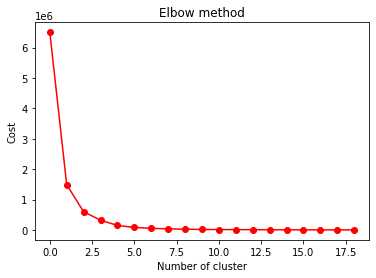

In [ ]:
fig=plt.plot(cost,marker="o",color="red")
plt.title("Elbow method")
plt.xlabel("Number of cluster")
plt.ylabel("Cost")
# for s in ["left","right","bottom","top"]:
#     fig.spines[s].set_visble(False)

plt.show()

In [ ]:
kmean=KMeans(n_clusters=4,init="k-means++",random_state=42)
y_kmean=kmean.fit_predict((np.array(data['noParkSpaces'].dropna()).reshape(-1, 1)))
labels=kmean.labels_

In [ ]:
silhouette_score(np.array(data['noParkSpaces'].dropna()).reshape(-1, 1),kmean.labels_)

0.963816966694224

In [ ]:
davies_bouldin_score(np.array(data['noParkSpaces'].dropna()).reshape(-1, 1),labels)

0.29841423677399026

In [ ]:
def grouping(data,col):
  group = data.groupby(col)
  return (group.size()/data.shape[0]*100).sort_values(ascending= False)


""" It finds outliers for each of columns.
Args:
    data (DataFrame) : your dataset 
    columns (String) : name of columns which you want to pass to the "groupby" method

Returns:
    Return a series grouped based on each value and shows the percentage of each value
"""

In [ ]:
grouping(data,'heatingType')

heatingType
central_heating                   47.973591
district_heating                   9.227450
gas_heating                        7.422354
self_contained_central_heating     7.099498
floor_heating                      6.582481
oil_heating                        1.875395
heat_pump                          1.018040
combined_heat_and_power_plant      0.735726
night_storage_heater               0.498791
wood_pellet_heating                0.357448
electric_heating                   0.335131
stove_heating                      0.127952
solar_heating                      0.061744
dtype: float64

In [ ]:
grouping(data,'condition')


condition
well_kept                             24.768830
refurbished                           10.029384
fully_renovated                        9.807699
first_time_use                         8.167752
mint_condition                         8.159940
modernized                             6.407290
first_time_use_after_refurbishment     5.839316
negotiable                             0.833178
need_of_renovation                     0.510322
ripe_for_demolition                    0.001488
dtype: float64

In [ ]:
grouping(data,'balcony')

balcony
True     61.645527
False    38.354473
dtype: float64

In [ ]:
grouping(data,'garden')

garden
False    80.37679
True     19.62321
dtype: float64

In [ ]:
grouping(data,'livingSpaceRange')

livingSpaceRange
3    30.670634
2    28.411010
4    15.915566
1    10.063976
5     7.633625
6     4.785568
7     2.519621
dtype: float64

In [ ]:
grouping(data,'petsAllowed')

petsAllowed
negotiable    34.208667
no            19.338293
yes            3.837084
dtype: float64

In [ ]:
grouping(data,'typeOfFlat')

typeOfFlat
apartment              48.920216
roof_storey            12.939185
ground_floor           11.730705
other                   3.540636
maisonette              3.466245
raised_ground_floor     2.093361
penthouse               1.327134
terraced_flat           1.259066
half_basement           0.748745
loft                    0.355961
dtype: float64

In [ ]:
grouping(data,'interiorQual')

interiorQual
normal           30.435559
sophisticated    24.088525
luxury            2.844709
simple            0.724940
dtype: float64

In [ ]:
grouping(data,'energyEfficiencyClass')

energyEfficiencyClass
C                 5.435373
NO_INFORMATION    5.255719
D                 5.179468
B                 4.215362
E                 2.970802
A                 1.855310
F                 1.667845
A_PLUS            1.345732
G                 0.671750
H                 0.335875
dtype: float64

In [ ]:
grouping(data,'date')

date
Feb20    29.487075
May19    28.286033
Oct19    24.803794
Sep18    17.423098
dtype: float64

In [ ]:
grouping(data,'hasKitchen')

hasKitchen
False    65.759345
True     34.240655
dtype: float64

In [ ]:
data[["hasKitchen","totalRent"]].groupby(["hasKitchen"],as_index=True).mean().sort_values(by='totalRent', ascending=True)

,totalRent
hasKitchen,
False,834.891787
True,1024.975411


In [ ]:
data[["petsAllowed","totalRent"]].groupby(["petsAllowed"],as_index=True).mean().sort_values(by='totalRent', ascending=True)

,totalRent
petsAllowed,
yes,787.438405
negotiable,806.497770
no,1264.051226


In [ ]:
data[["balcony","totalRent"]].groupby(["balcony"],as_index=True).mean().sort_values(by='totalRent', ascending=True)

,totalRent
balcony,
False,649.778057
True,1056.559576


In [ ]:
data[["garden","totalRent"]].groupby(["garden"],as_index=True).mean().sort_values(by='totalRent', ascending=True)

,totalRent
garden,
True,869.935447
False,909.289857


In [ ]:
def plot_piechart(data,cols):
  for col in cols:
    if data[col].nunique()<8:
      labels = data[col].dropna().unique().tolist()
      values = data[col].groupby(data[col],as_index = True).count().tolist()
      plt.axis('equal')
      plt.pie(values,labels = labels,autopct='%.1f%%',startangle=90)
      plt.title(col)
      plt.show()



""" it shows  pie plot for some columns
Args:
    data (DataFrame) : your dataset 
    columns (list) : list of columns

Returns:
    Return pie plot of columns that the number of their subcategories is less than 8
"""

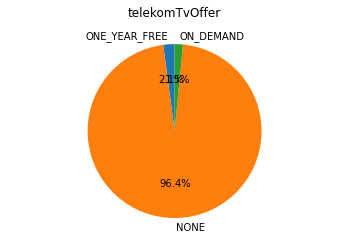

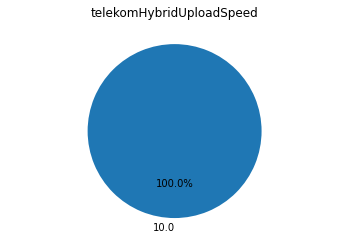

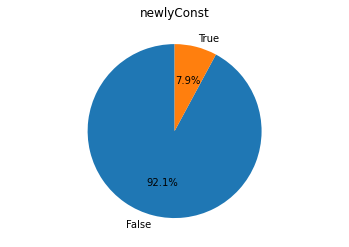

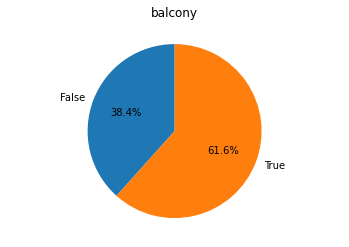

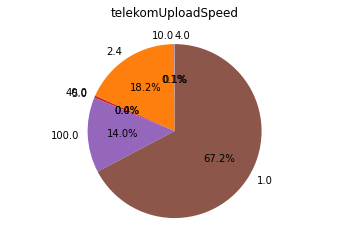

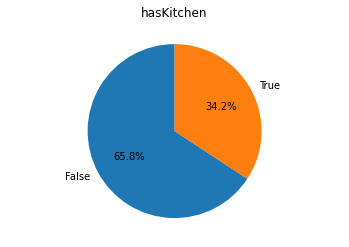

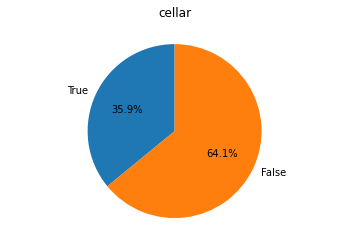

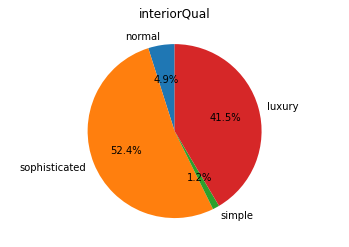

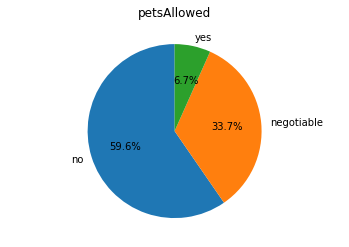

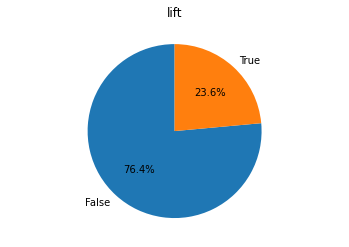

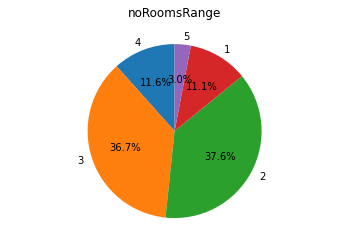

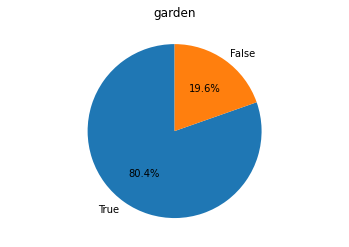

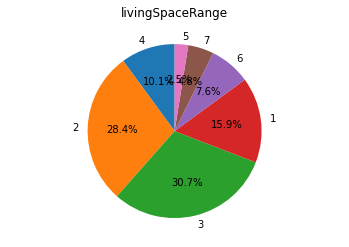

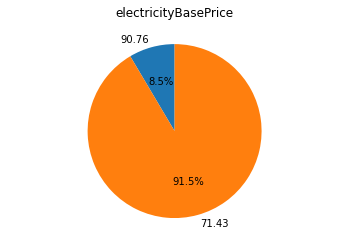

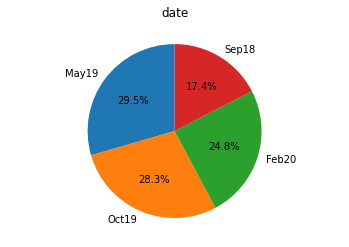

In [ ]:
plot_piechart(data,data.columns)

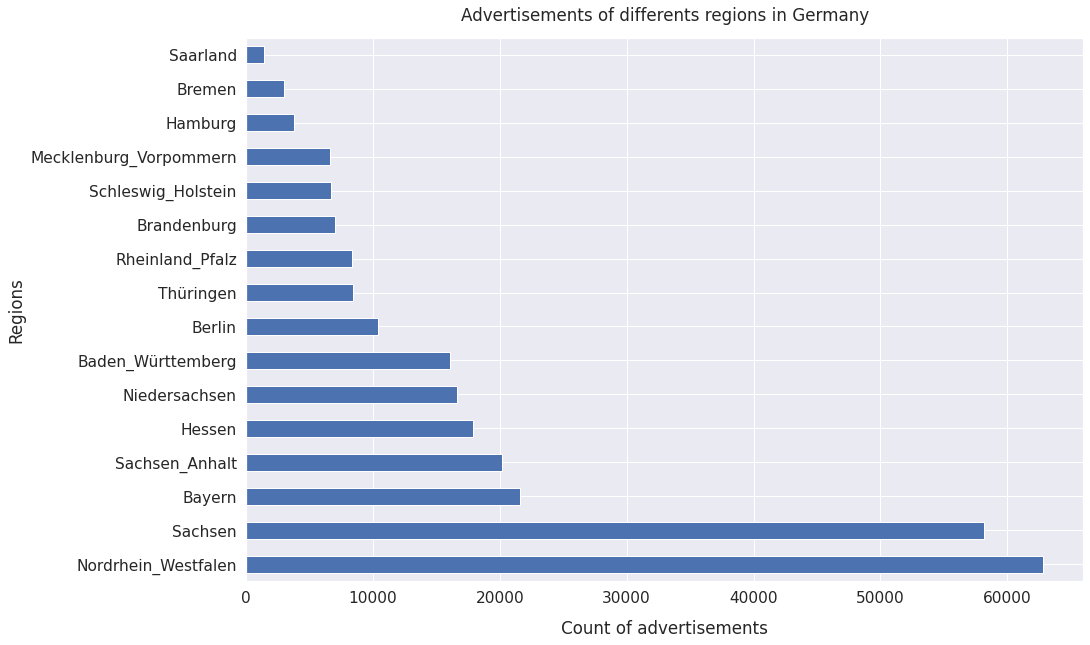

In [ ]:
sns.set(font_scale=1.4)
data['regio1'].value_counts().plot(kind='barh', figsize=(15, 10), rot=0)
plt.xlabel("Count of advertisements", labelpad=14)
plt.ylabel("Regions", labelpad=5)
plt.title("Advertisements of differents regions in Germany", y=1.02);

In [ ]:
rent_mean = data.groupby(['regio1'])['totalRent'].mean().sort_index()

fig = px.histogram(x=data['regio1'].value_counts().sort_index().index   ,   y=rent_mean 
                 , labels={
                     "x": "City"
                  },
                  title="Average Rent for each City",
                  color=data['regio1'].value_counts().sort_index().index)



fig.update_yaxes(title = "mean rent")
fig.show()

In [ ]:
rent_mean = data.groupby(['heatingType'])['totalRent'].mean().sort_index()

fig = px.histogram(x=data['heatingType'].value_counts().sort_index().index   ,   y=rent_mean 
                 , labels={
                     "x": "heatingType"
                  },
                  title="Average Rent for each heatingType",
                  color=data['heatingType'].value_counts().sort_index().index)



fig.update_yaxes(title = "mean rent")
fig.show()

In [ ]:
rent_mean = data.groupby(['typeOfFlat'])['totalRent'].mean().sort_index()

fig = px.histogram(x=data['typeOfFlat'].value_counts().sort_index().index   ,   y=rent_mean 
                 , labels={
                     "x": "typeOfFlat"
                  },
                  title="Average Rent for each type Of Flat",
                  color=data['typeOfFlat'].value_counts().sort_index().index)



fig.update_yaxes(title = "mean rent")
fig.show()

In [ ]:
data['regio1'].value_counts().sort_index().index

Index(['Baden_Württemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen',
       'Hamburg', 'Hessen', 'Mecklenburg_Vorpommern', 'Niedersachsen',
       'Nordrhein_Westfalen', 'Rheinland_Pfalz', 'Saarland', 'Sachsen',
       'Sachsen_Anhalt', 'Schleswig_Holstein', 'Thüringen'],
      dtype='object')

<BarContainer object of 2 artists>

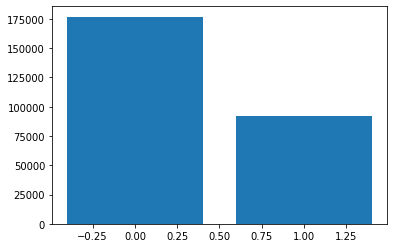

In [ ]:
plt.bar(list(data['hasKitchen'].value_counts().index) ,list(data['hasKitchen'].value_counts()))

Duplicate Data

In [ ]:
data1 = data.drop('scoutId',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
data1.shape

(268850, 48)

In [ ]:
duplicated = data1[data1.duplicated()]

In [ ]:
duplicated.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
15066,Sachsen,105.0,gas_heating,ONE_YEAR_FREE,NaN,False,True,5,-0.20,40.0,345.0,1920.0,NaN,gas,False,Sachsen,True,1.0,240.0,21,49.05,Chemnitz,well_kept,NaN,NaN,Orthstra&szlig;e,Orthstraße,False,1,roof_storey,9131,2.0,NaN,4.0,NaN,2,True,2,Chemnitz,Hilbersdorf,Die Wohnung liegt im 4. Obergeschoss eines wun...,großer sonniger Süd-West Balkon\ngeräumiger Fl...,NaN,NaN,1997.0,NaN,NaN,Oct19
15948,Mecklenburg_Vorpommern,90.0,NaN,ONE_YEAR_FREE,10.0,False,False,8,2.76,10.0,570.0,NaN,NaN,NaN,False,Mecklenburg_Vorpommern,True,NaN,390.0,1,74.00,Mecklenburg_Strelitz_Kreis,modernized,NaN,NaN,Elisabethstra&szlig;e,Elisabethstraße,False,2,roof_storey,17235,3.0,132.0,NaN,NaN,3,False,3,Mecklenburg_Strelitz_Kreis,Neustrelitz,Es handelt sich um eine große 3 - Zimmer Dachg...,Für einen Aufpreis von 65 € lassen wir in der ...,90.0,NaN,NaN,NaN,NaN,Oct19
16764,Rheinland_Pfalz,NaN,gas_heating,NaN,NaN,False,False,0,2.82,NaN,460.0,1970.0,NaN,natural_gas_light,False,Rheinland_Pfalz,True,2.0,320.0,7,50.00,Neuwied_Kreis,well_kept,NaN,no,Am Vogelberg,Am_Vogelberg,False,2,NaN,53557,2.0,NaN,3.0,3.0,2,True,2,Neuwied_Kreis,Bad_Hönningen,Schöne 2 Zimmerwohnung Ideal für 1 bis 2 Perso...,Die Wohnung ist normaler Standard.Hat ein neue...,NaN,NaN,NaN,NaN,NaN,Oct19
17736,Sachsen,40.0,central_heating,ONE_YEAR_FREE,NaN,False,False,10,1.59,40.0,290.0,NaN,NaN,gas,False,Sachsen,False,NaN,250.0,NaN,16.00,Sächsische_Schweiz_Osterzgebirge_Kreis,refurbished,normal,NaN,no_information,NaN,False,1,ground_floor,1737,1.0,NaN,NaN,NaN,1,False,1,Sächsische_Schweiz_Osterzgebirge_Kreis,Tharandt,Bei diesem Objekt handelt es sich um ein liebe...,"Diese Wohnung befindet sich in einem Anwesen, ...",NaN,NaN,2016.0,NaN,NaN,May19
20482,Sachsen_Anhalt,48.0,central_heating,ONE_YEAR_FREE,NaN,False,True,9,0.47,40.0,NaN,NaN,NaN,district_heating,False,Sachsen_Anhalt,False,NaN,185.0,22,32.00,Wittenberg_Kreis,fully_renovated,NaN,negotiable,Braunsdorfer Str.,Braunsdorfer_Str.,False,1,apartment,6886,1.0,117.0,1.0,2.0,1,False,1,Wittenberg_Kreis,Lutherstadt_Wittenberg,Das in den 1970er Jahren erbaute Haus hat zwei...,- Balkon\n- Bad mit Badewanne\n- Wechselsprech...,32.0,NaN,NaN,NaN,NaN,Feb20


In [ ]:
print(f'Number of duplicate data is:',duplicated.shape[0])

Number of duplicate data is: 891


# **Phase 2**

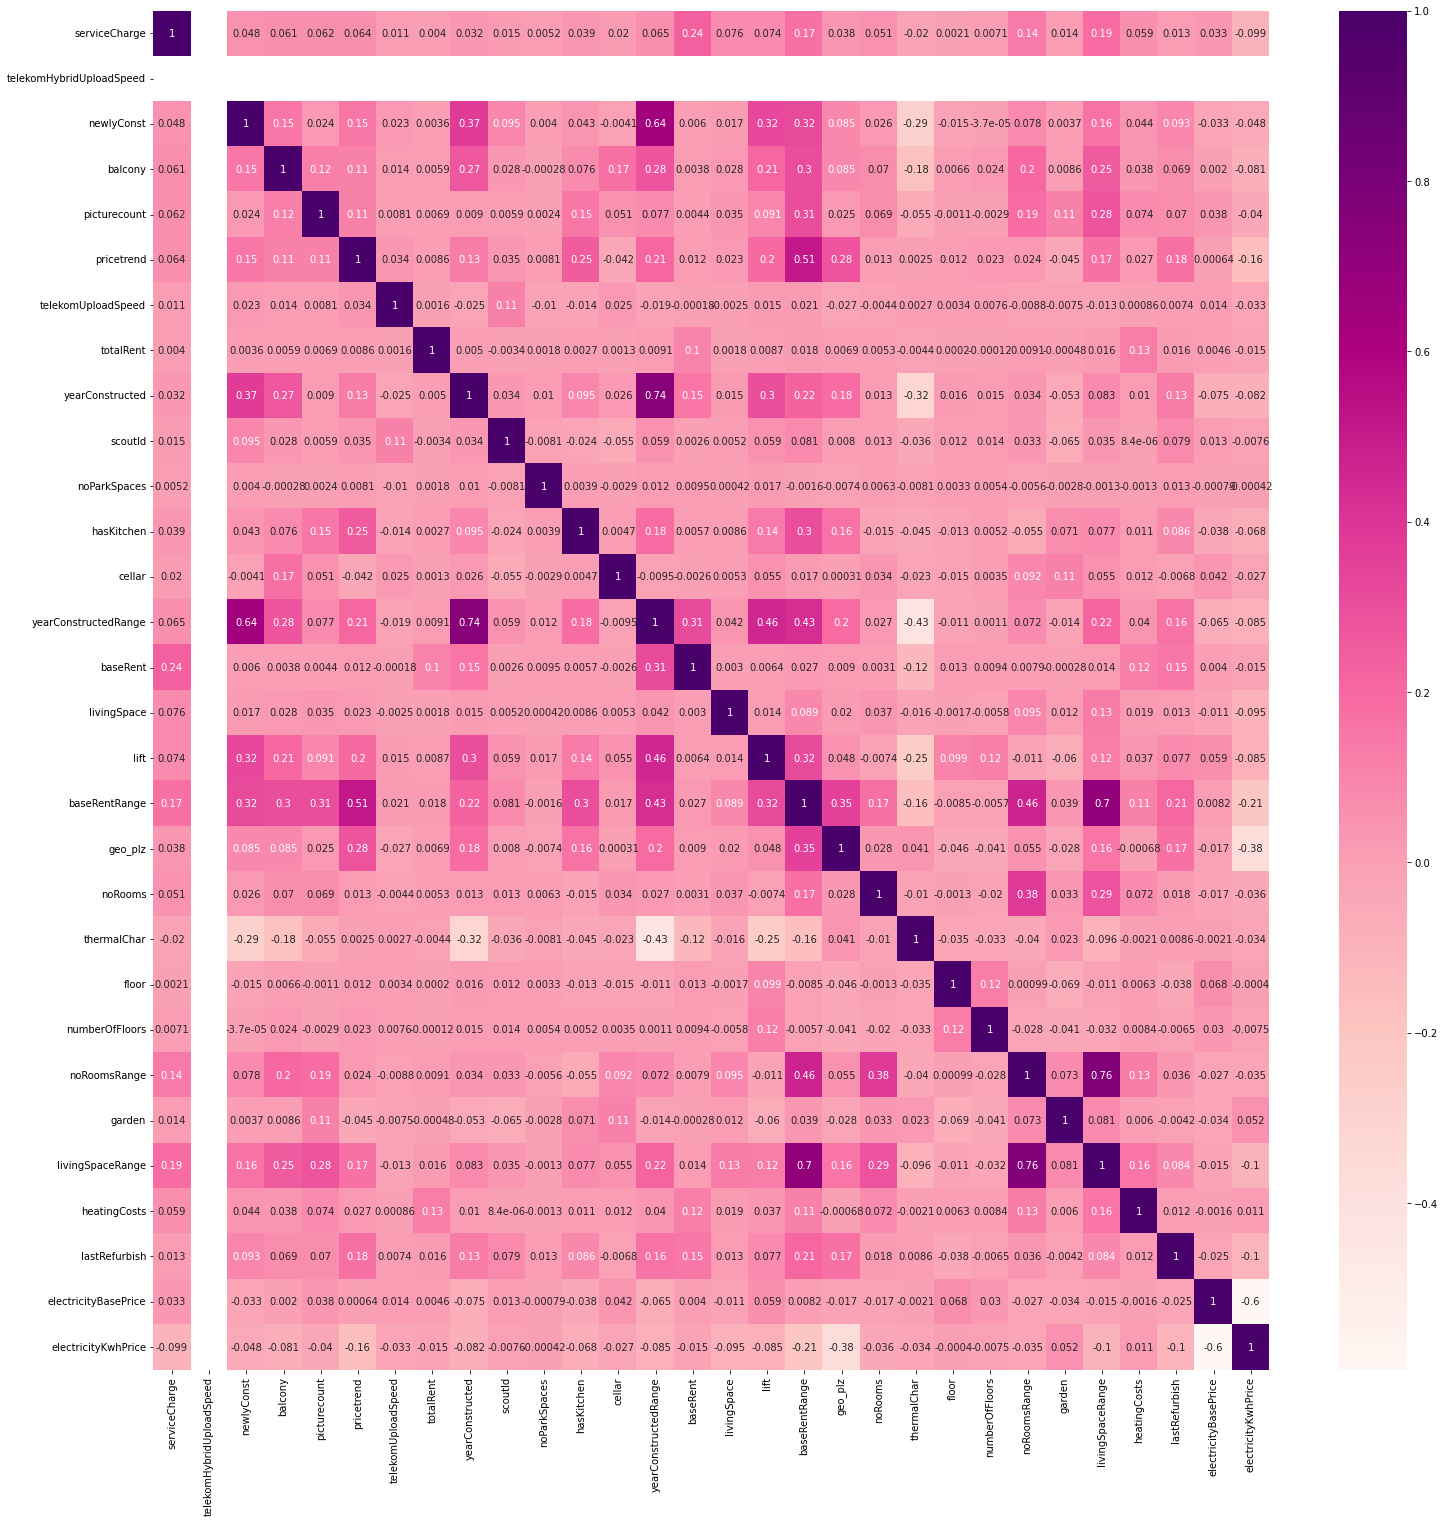

In [ ]:
plt.figure(figsize = (25,25))
sns.heatmap(data.corr(),annot=True,cmap='RdPu')
plt.show()

 **Hypothesis Test** 

*t_test*

In [ ]:
heatingType = data[data['heatingType']=='central_heating'].dropna()

In [ ]:
district_heating = data[data['heatingType']=='district_heating'].dropna()

In [ ]:
alpha = 0.05 
tstat,p_value = stats.ttest_ind(heatingType.totalRent,district_heating.totalRent,equal_var = True , alternative='two-sided')
print('t stat : {} , p_value : {}'.format(tstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

t stat : -3.0761188107832034 , p_value : 0.0055248114952284886
reject null hypothesis


In [ ]:
has_balcony = data[data['balcony']==True].dropna()
has_not_balcony = data[data['balcony']==False].dropna()

In [ ]:
has_balcony.totalRent.std()

443.51485178308735

In [ ]:
has_not_balcony.totalRent.std()

712.7094662078105

In [ ]:
alpha = 0.05 
tstat,p_value = stats.ttest_ind(has_balcony.totalRent,has_not_balcony.totalRent,equal_var = True , alternative='two-sided')
print('t stat : {} , p_value : {}'.format(tstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

t stat : 0.5480018950618804 , p_value : 0.5876153111753484
accept null hypothesis


In [ ]:
has_garden = data[data['garden']==True].dropna()
has_not_garden = data[data['garden']==False].dropna()

In [ ]:
has_garden['totalRent'].std()

598.7893968793633

In [ ]:
has_not_garden['totalRent'].std()

500.88017020945

In [ ]:
alpha = 0.05 
tstat,p_value = stats.ttest_ind(has_garden['totalRent'],has_not_garden['totalRent'],equal_var = True , alternative='two-sided')
print('t stat : {} , p_value : {}'.format(tstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

t stat : -0.2861183320129206 , p_value : 0.7766908753826876
accept null hypothesis


In [ ]:
has_Kitchen =data[data['hasKitchen']==True].dropna()
has_not_Kitchen =data[data['hasKitchen']==False].dropna()

In [ ]:
has_Kitchen['totalRent'].var()

287104.54128088226

In [ ]:
has_not_Kitchen['totalRent'].var()

141714.77349958333

In [ ]:
alpha = 0.05 
tstat,p_value = stats.ttest_ind(has_Kitchen['totalRent'],has_not_Kitchen['totalRent'],equal_var = True , alternative='two-sided')
print('t stat : {} , p_value : {}'.format(tstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

t stat : 3.2332455312325363 , p_value : 0.002902406162061203
reject null hypothesis


In [ ]:
data['petsAllowed'].unique()

array([nan, 'no', 'negotiable', 'yes'], dtype=object)

**Anova**

In [ ]:
petsAllowed = data[data['petsAllowed']=='yes'].dropna()
pets_not_allowed = data[data['petsAllowed']=='no'].dropna()
negotiable = data[data['petsAllowed']=='negotiable'].dropna()

In [ ]:
alpha = 0.05 
fstat,p_value = stats.f_oneway(petsAllowed.totalRent ,pets_not_allowed.totalRent ,negotiable.totalRent )

print('f stat : {} , p_value : {}'.format(fstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

f stat : 1.1956327422801918 , p_value : 0.3165192193078322
accept null hypothesis


In [ ]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns',None)
# data=pd.read_csv('/content/files/data.csv',lineterminator='\n')
data=pd.read_csv('/content/files/immo_data.csv',lineterminator='\n')

*Drop Duplicate Value*


In [ ]:
data = data.drop('scoutId',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
data.shape

(268850, 48)

In [ ]:
duplicated = data[data.duplicated()]

In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
data.shape

(267959, 48)

**Missing Value**

In [ ]:
missing_data = percent_missing_value(data,30)


In [ ]:
missing_data

,value,Missing values%
0,telekomHybridUploadSpeed,83.241466
1,electricityKwhPrice,82.565990
2,electricityBasePrice,82.565990
3,energyEfficiencyClass,71.063857
4,lastRefurbish,70.022280
5,heatingCosts,68.193268
6,noParkSpaces,65.384257
7,petsAllowed,42.602413
8,interiorQual,41.909770
9,thermalChar,39.596356


In [ ]:
# drop columns where the columns contain more than 70% missing
data.drop(columns = list(missing_data[missing_data['Missing values%'] >=50]['value']),inplace =True)

In [ ]:
#Similar feature
# drop 'geo_krs','geo_bln','strret' because they are same as 'regio2' ,'regio1','streetPlain'
data.drop(columns = ['geo_krs','geo_bln','street'],inplace = True)

In [ ]:
# there are some columns that I will drop in the future because they are unused features like:
# 'description','facilities','houseNumber','scoutId'

In [ ]:
#Unused feature
#,'garden'
data.drop(columns=['description','facilities','houseNumber','regio1','regio3','noRooms','livingSpaceRange','geo_plz','date','streetPlain',
                   'telekomTvOffer',"firingTypes",'picturecount','pricetrend','telekomUploadSpeed','firingTypes','petsAllowed','numberOfFloors'],inplace=True)


In [ ]:
data.drop(columns=['thermalChar','baseRentRange','interiorQual'],inplace=True)

In [ ]:
data.head()

,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,condition,lift,typeOfFlat,floor,noRoomsRange,garden,regio2
0,245.00,central_heating,False,False,840.0,1965.0,False,True,2.0,595.0,86.00,well_kept,False,ground_floor,1.0,4,True,Dortmund
1,134.00,self_contained_central_heating,False,True,NaN,1871.0,False,False,1.0,800.0,89.00,refurbished,False,ground_floor,NaN,3,False,Rhein_Pfalz_Kreis
2,255.00,floor_heating,True,True,1300.0,2019.0,False,True,9.0,965.0,83.80,first_time_use,True,apartment,3.0,3,False,Dresden
3,58.15,district_heating,False,True,NaN,1964.0,False,False,2.0,343.0,58.15,NaN,False,other,3.0,3,False,Mittelsachsen_Kreis
4,138.00,self_contained_central_heating,False,True,903.0,1950.0,False,False,1.0,765.0,84.97,refurbished,False,apartment,1.0,3,False,Bremen


In [ ]:
missing_data = percent_missing_value(data,0.5)
missing_data

,value,Missing values%
0,condition,25.498677
1,yearConstructed,21.218918
2,yearConstructedRange,21.218918
3,floor,19.062618
4,heatingType,16.685388
5,totalRent,15.071709
6,typeOfFlat,13.621487
7,serviceCharge,2.565318


In [ ]:
uniqueness(data)

,value,uniqueness
0,newlyConst,2
1,balcony,2
2,hasKitchen,2
3,cellar,2
4,garden,2
5,lift,2
6,noRoomsRange,5
7,yearConstructedRange,9
8,typeOfFlat,10
9,condition,10


In [ ]:
data.describe(include = 'object').T

,count,unique,top,freq
heatingType,223249,13,central_heating,128567
condition,199633,10,well_kept,66393
typeOfFlat,231459,10,apartment,131056
regio2,267959,419,Leipzig,13653


In [ ]:
otherslist = list (data['condition'].value_counts().tail(3).index)
def create_others_group(column):
  if column in otherslist:
    return 'other'
  else:
    return column

data['condition']=data['condition'].apply(create_others_group)


""" It creates other subgroup
Args:
    columns (String) : name of your column that you want to add in 'other' category
Returns:
    Return a series that includes 'other' category, but  the number of subgroups has decreased
"""

" it create other subgroups\nArgs:\n    columns (String) : name of your column that you want create 'other' category\nReturns:\n    return a series that include 'other'category butBut in total the number of subgroups has decreased\n"

In [ ]:
data['condition'].value_counts()

well_kept                             66393
refurbished                           26887
fully_renovated                       26296
mint_condition                        21866
first_time_use                        21795
modernized                            17185
first_time_use_after_refurbishment    15605
other                                  3606
Name: condition, dtype: int64

In [ ]:
otherslist = list (data['typeOfFlat'].value_counts().tail(2).index)
data['typeOfFlat']=data['typeOfFlat'].apply(create_others_group)

In [ ]:
data['typeOfFlat'].value_counts()

apartment              131056
roof_storey             34668
ground_floor            31447
other                   12455
maisonette               9298
raised_ground_floor      5611
penthouse                3547
terraced_flat            3377
Name: typeOfFlat, dtype: int64

In [ ]:
data['heatingType'].value_counts()/sum(data['heatingType'].value_counts())*100

central_heating                   57.589060
district_heating                  11.064327
gas_heating                        8.894553
self_contained_central_heating     8.535313
floor_heating                      7.891637
oil_heating                        2.258465
heat_pump                          1.224642
combined_heat_and_power_plant      0.883319
night_storage_heater               0.599331
wood_pellet_heating                0.429117
electric_heating                   0.402241
stove_heating                      0.153640
solar_heating                      0.074356
Name: heatingType, dtype: float64

In [ ]:
otherslist = list (data['heatingType'].value_counts().tail(8).index)
data['heatingType']=data['heatingType'].apply(create_others_group)

In [ ]:
# data['regio2'].value_counts().head(30)/sum(data['regio2'].value_counts())*100

Leipzig                                   5.104333
Chemnitz                                  4.677329
Berlin                                    3.870560
Dresden                                   2.797843
Magdeburg                                 1.807699
Halle_Saale                               1.697973
München                                   1.630277
Essen                                     1.618375
Frankfurt_am_Main                         1.597917
Hamburg                                   1.398177
Düsseldorf                                1.380324
Duisburg                                  1.310024
Mittelsachsen_Kreis                       1.176121
Dortmund                                  1.166822
Gelsenkirchen                             1.094662
Recklinghausen_Kreis                      1.024363
Köln                                      1.007625
Zwickau                                   0.943277
Wuppertal                                 0.883764
Zwickau_Kreis                  

In [ ]:
# otherslist = list (data['regio2'].value_counts().iloc[30:,].index)
# data['regio2']=data['regio2'].apply(create_others_group)

In [ ]:
otherslist = list (data['regio1'].value_counts().tail(3).index)
data['regio1']=data['regio1'].apply(create_others_group)

In [ ]:
data['regio1'].value_counts()/sum(data['regio1'].value_counts())*100

Nordrhein_Westfalen       26.142172
Sachsen                   20.190223
Sachsen_Anhalt             8.034199
Bayern                     7.191979
Niedersachsen              6.818695
Hessen                     5.901916
Baden_Württemberg          5.436905
Rheinland_Pfalz            3.296773
Thüringen                  3.240854
other                      2.895529
Brandenburg                2.815084
Mecklenburg_Vorpommern     2.813613
Schleswig_Holstein         2.689021
Berlin                     2.533036
Name: regio1, dtype: float64

In [ ]:
# columns_list = data['firingTypes'].value_counts().head(9).index.to_list()
# def create_others_group_head(column):
#   if column in columns_list:
#     return column
#   else:
#     return 'other'

# data['firingTypes']=data['firingTypes'].apply(create_others_group_head)

In [ ]:
def fill_na_mode(columns):
  for col in columns:
    data[col].fillna(data[col].mode()[0],inplace = True)


""" Impute null values for categorical features
Args:
    columns (String): name of some columns that you want to impute with mode
Returns:
    Return your column  after imputation
"""

' impute null value for categorical fearures\nArgs:\n    columns (String) : name of your column that you want impute with mode\nReturns:\n    return your column  after imputation\n'

In [ ]:
def fill_na_other(columns):
  for col in columns:
    data[col].fillna('other',inplace = True)  


""" Impute null values for categorical features
Args:
    columns (String): name of your column that you want to impute with 'other'
Returns:
    Return your column  after imputation
"""

" impute null value for categorical features\nArgs:\n    columns (String) : name of your column that you want impute with 'other'\nReturns:\n    return your column  after imputation\n"

In [ ]:
categorical_list = []
for cols in data.columns:
    if data[cols].dtype == 'object' or data[cols].dtype == 'bool':
        categorical_list.append(cols)


In [ ]:
fill_na_mode(categorical_list)

In [ ]:
fill_na_other(categorical_list)

In [ ]:
missing_data = percent_missing_value(data,0.5)
missing_data

,value,Missing values%
0,yearConstructed,21.218918
1,yearConstructedRange,21.218918
2,floor,19.062618
3,totalRent,15.071709
4,serviceCharge,2.565318


In [ ]:
def fill_na_mean(columns):
  for col in columns:
    data[col].fillna(np.ceil(data[col].mean()),inplace = True)

""" Impute null values for numeric fearures
Args:
    columns (String): name of columns that you want to impute with mean
Returns:
    Return your column  after imputation
"""


' impute null value for numeric fearures\nArgs:\n    columns (String) : name of your column that you want impute with mean\nReturns:\n    return your column  after imputation\n'

In [ ]:
def fill_na_interpolation(columns):
  for col in columns:
    # tou can change the methode
    data[col].interpolate(method ='linear' , inplace = True)

""" Impute null values for numeric fearures
Args:
    columns (String): name of  columns that you want to impute with interpolation
Returns:
    Return your column  after imputation
"""

In [ ]:
mean_list = []
for cols in data.columns:
    if data[cols].dtype == 'int64' or data[cols].dtype == 'float64':
        mean_list.append(cols)


In [ ]:
fill_na_mean(mean_list)

In [ ]:
fill_na_interpolation(mean_list)

# **Feature engineering**

In [ ]:
data['ageOfBuliding'] = date.today().year - data["yearConstructed"]

In [ ]:
# data.loc[data["livingSpace"]<10]=data["livingSpace"].mean()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


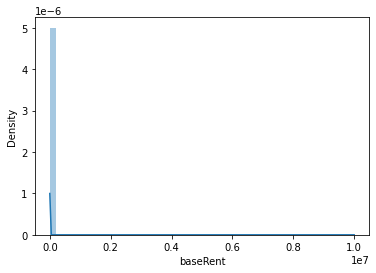

In [ ]:
sns.distplot(data['baseRent'])


In [ ]:
data['baseRent'].describe()

count    2.679590e+05
mean     6.941418e+02
std      1.956844e+04
min      0.000000e+00
25%      3.380000e+02
50%      4.900000e+02
75%      7.990000e+02
max      9.999999e+06
Name: baseRent, dtype: float64

In [ ]:
data[data["baseRent"]<150]=data["baseRent"].mean()

In [ ]:
data.loc[data["baseRent"]<150]=data["baseRent"].mean()

In [ ]:
data['baseRent'].describe()

count    2.679590e+05
mean     6.964925e+02
std      1.956841e+04
min      1.500000e+02
25%      3.400000e+02
50%      4.950000e+02
75%      7.990000e+02
max      9.999999e+06
Name: baseRent, dtype: float64

In [ ]:
data['pricePerSquareMeter'] = data['baseRent']/data['livingSpace']

In [ ]:
data.drop(columns=['yearConstructedRange'],inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


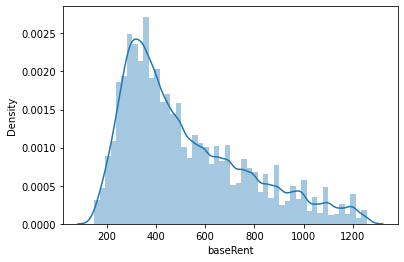

In [ ]:
sns.distplot(data['baseRent'])

**Outllier imputation**

In [ ]:
mean_list

['serviceCharge',
 'totalRent',
 'yearConstructed',
 'yearConstructedRange',
 'baseRent',
 'livingSpace',
 'floor',
 'noRoomsRange']

In [ ]:
# IQR_list =  ['numberOfFloors','floor','totalRent','telekomUploadSpeed','serviceCharge']
IQR_list= ['serviceCharge','totalRent','yearConstructed',
           'baseRent','livingSpace','floor','noRoomsRange']

In [ ]:
# std_list = ['thermalChar','pricetrend']
std_list = ['thermalChar']

In [ ]:
def drop_outliers_IQR (data,columns):
  for col in columns:

    q1 = np.nanpercentile(data[col], 25)
    q3 = np.nanpercentile(data[col], 75)
    iqr = q3-q1 #Interquartile range
    low  = q1-1.5*iqr #acceptable range
    high = q3+1.5*iqr

    indexs = data[(data[col] > high) | (data[col] < low)].index
    data = data.drop(indexs)

  # display(data.describe())

  return data


""" Drop outlier values
Args:
    data (DataFrame) : your dataset
    columns (list): list of columns that do not have normal distributions  
Returns:
   Return Dataframe that the outliers are dropped
"""

' Drop outlier value\nArgs:\n    data (DataFrame) : your dataset\n    columns (list) : list of columns that their distibiution is not normal\nReturns:\n   return Dataframe that the outliers is droped\n'

In [ ]:
def drop_outliers_std (data,columns):
  for col in columns:
    std = data[col].std()
    mean = data[col].mean() 
    low  =  mean - std* 3#acceptable range
    high = mean + std*3


    indexs = data[(data[col] > high) | (data[col] < low)].index
    data = data.drop(indexs)

  return data

""" Drop outlier values
Args:
    data (DataFrame) : your dataset
    columns (list): a list of columns that have normal or relatively normal distributions 
Returns:
    Return Dataframe that  the outliers are dropped
"""


In [ ]:
data = drop_outliers_IQR(data,IQR_list)

In [ ]:
data = drop_outliers_std(data,std_list)

In [ ]:
data['regio1'].value_counts()

Nordrhein_Westfalen       51320
Sachsen                   41010
Sachsen_Anhalt            16294
Bayern                    14421
Niedersachsen             13461
Hessen                    11686
Baden_Württemberg         10931
Rheinland_Pfalz            6609
Thüringen                  6528
Mecklenburg_Vorpommern     5698
Brandenburg                5685
Schleswig_Holstein         5322
Berlin                     5092
Bremen                     2470
Hamburg                    2136
Saarland                   1137
Name: regio1, dtype: int64

In [ ]:
def imputation_outliers_IQR (data,columns):
  for col in columns:
    print(col)
    q1 = np.nanpercentile(data[col], 25)
    q3 = np.nanpercentile(data[col], 75)
    iqr = q3-q1 #Interquartile range
    low  = q1-1.5*iqr #acceptable range
    high = q3+1.5*iqr
    rental_df_include = data.loc[(data[col] >= low) & \
                              (data[col] <= high)] # meeting the acceptable range
    rental_df_exclude = data.loc[(data[col] < low) | \
                                (data[col] > high)] #not meeting the acceptable range


    data.drop(columns=[col] , inplace = True)
    col_mean=rental_df_include[col].mean()
    rental_df_exclude[col]=col_mean
    rental_df = pd.concat([rental_df_include,rental_df_exclude])
    # display(rental_df)
    # data[col] = rental_df[col]
    data =  pd.merge(data, rental_df, how='outer')
    # display(data)
  
    # data[col].describe()
  # display(data.describe())

  return data



""" Impute outlier value
Args:
    data (DataFrame) : your dataset
    columns (list): list of columns that do not have normal distributions  
Returns:
    Return Dataframe that  the outliers are imputed
"""


In [ ]:
def imputation_outliers_std (data,columns):
  for col in columns:
    std = data[col].std()
    mean = data[col].mean() 
    low  =  mean - std* 3#acceptable range
    high = mean + std*3


    rental_df_include = data.loc[(data[col] >= low) & \
                              (data[col] <= high)] # meeting the acceptable range
    rental_df_exclude = data.loc[(data[col] < low) | \
                                (data[col] > high)] #not meeting the acceptable range


    data.drop(columns=[col] , inplace = True)
    col_mean=rental_df_include[col].mean()
    rental_df_exclude[col]=col_mean
    rental_df = pd.concat([rental_df_include,rental_df_exclude])
    # display(rental_df)
    # data[col] = rental_df[col]
    data =  pd.merge(data, rental_df, how='outer')
    # display(data)
  
    # data[col].describe()
  # display(data.describe())

  return data

""" Impute outlier values
Args:
    data (DataFrame) : your dataset
    columns (list): list of columns that have normal or relatively normal distributions 
Returns:
    Return Dataframe that  the outliers are imputed
"""



In [ ]:
data = imputation_outliers_IQR(data,IQR_list)

numberOfFloors


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


floor
totalRent
telekomUploadSpeed
serviceCharge


In [ ]:
data = imputation_outliers_std(data,std_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:
data.describe()

,picturecount,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,noRoomsRange,numberOfFloors,floor,totalRent,telekomUploadSpeed,serviceCharge,thermalChar,pricetrend
count,268850.000000,268850.000000,268850.000000,2.688500e+05,268850.000000,268850.000000,268850.000000,268850.000000,268850.000000,268850.000000,268850.000000,268850.000000,268850.000000,268850.000000
mean,9.791958,1966.527774,3.775113,6.941294e+02,74.355548,3.765256,2.571542,3.555394,1.990315,721.437412,28.791771,140.398847,112.632895,3.340417
std,6.408399,41.710578,2.433143,1.953602e+04,254.759208,2.214357,0.937594,1.083070,1.211828,308.787206,15.203034,63.080323,37.758131,1.855488
min,0.000000,1000.000000,1.000000,0.000000e+00,0.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,1.000000,0.000000,0.100000,-2.500000
25%,6.000000,1958.000000,2.000000,3.380000e+02,54.000000,2.000000,2.000000,3.000000,1.000000,495.000000,10.000000,96.000000,97.900000,2.000000
50%,9.000000,1967.000000,4.000000,4.900000e+02,67.320000,3.000000,3.000000,4.000000,2.000000,721.337582,40.000000,140.000000,113.000000,3.360000
75%,13.000000,1992.000000,5.000000,7.990000e+02,87.000000,5.000000,3.000000,4.000000,3.000000,825.000000,40.000000,179.000000,116.000000,4.520000
max,121.000000,2090.000000,9.000000,9.999999e+06,111111.000000,9.000000,5.000000,7.000000,6.000000,1757.530000,40.000000,332.500000,299.700000,9.280000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


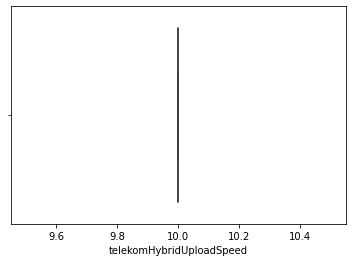

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


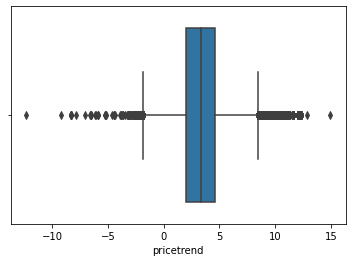

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


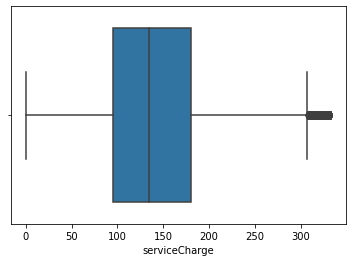

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


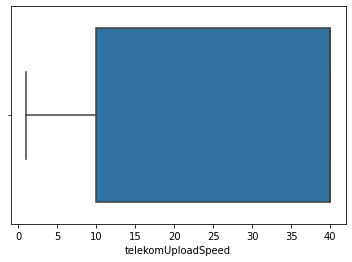

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


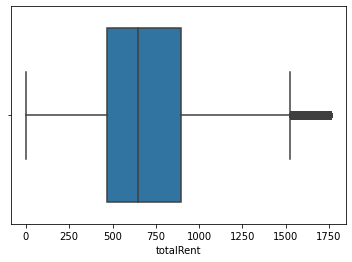

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


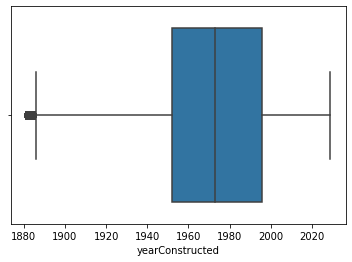

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


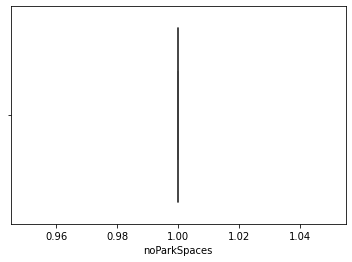

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


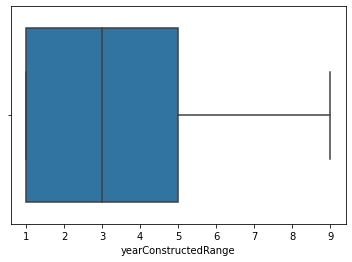

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


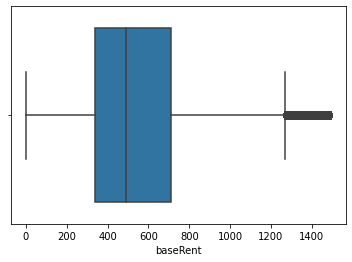

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


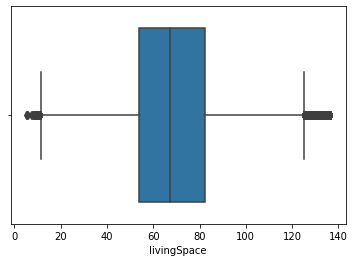

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


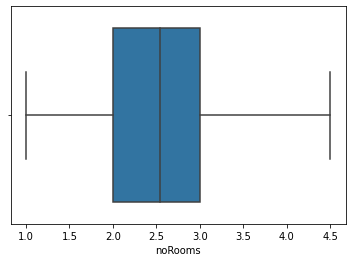

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


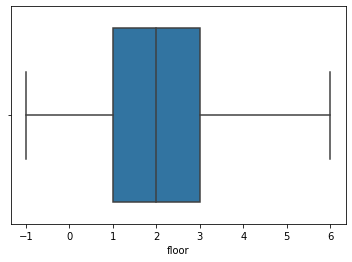

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


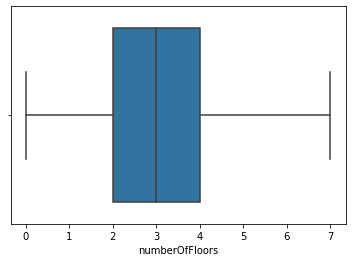

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


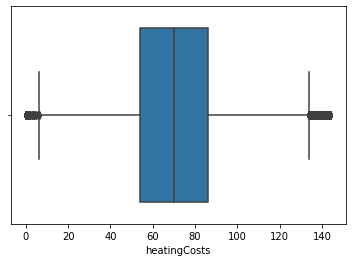

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


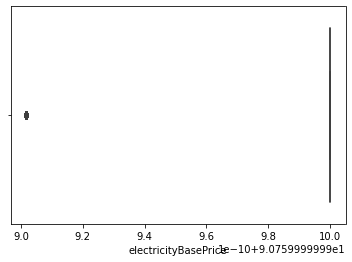

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


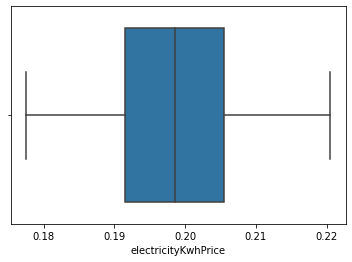

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


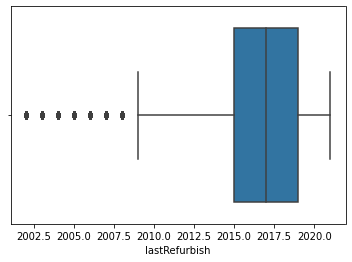

In [ ]:
boxPlot(data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


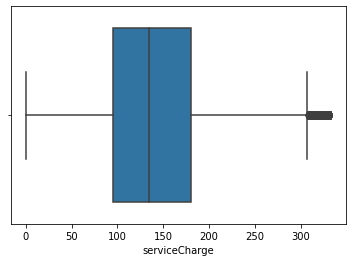

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


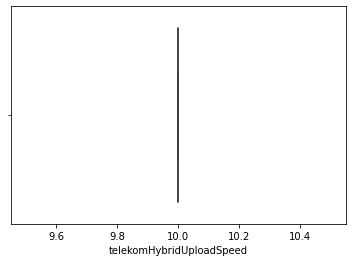

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


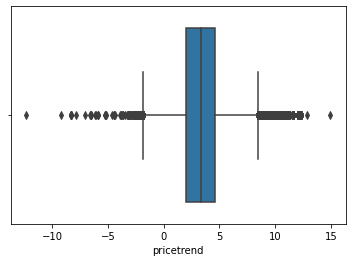

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


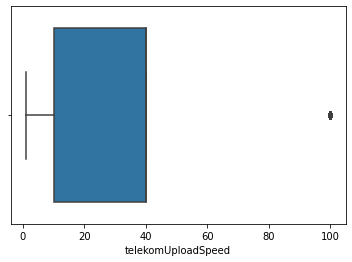

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


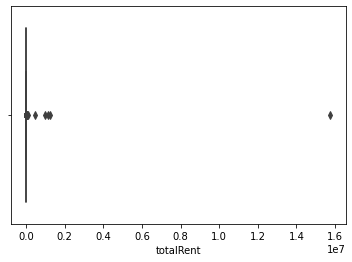

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


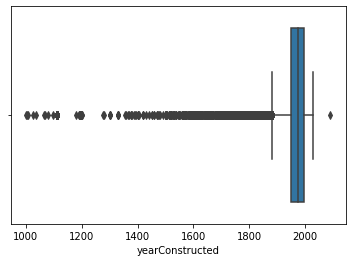

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


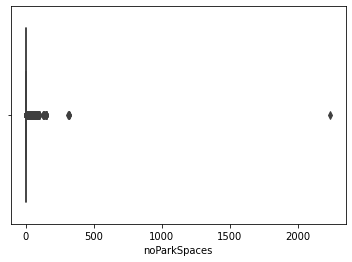

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


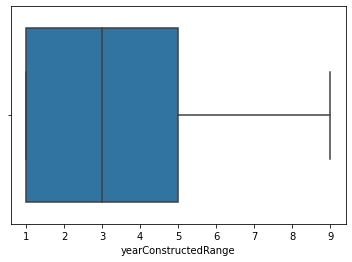

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


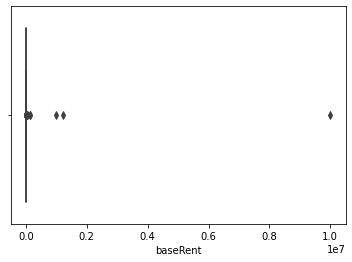

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


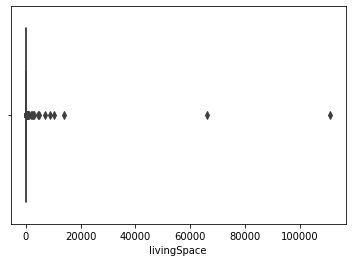

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


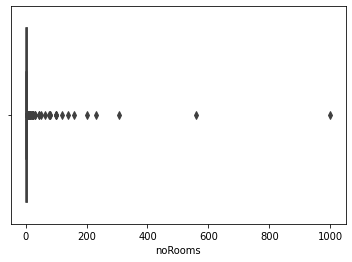

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


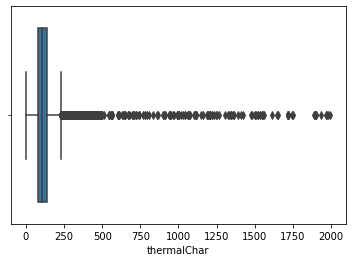

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


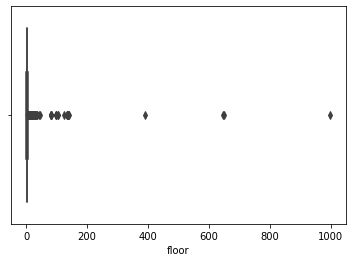

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


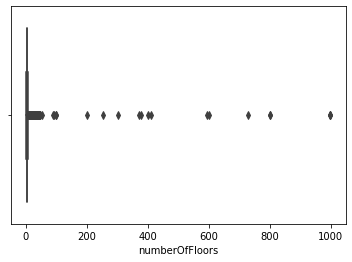

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


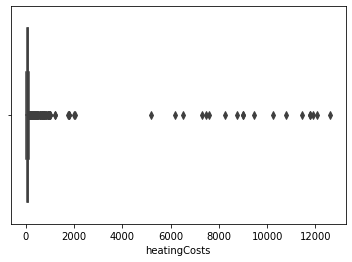

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


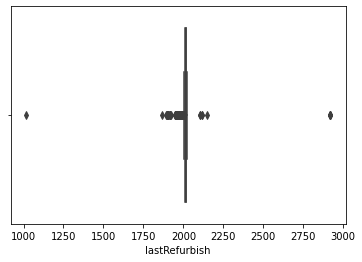

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


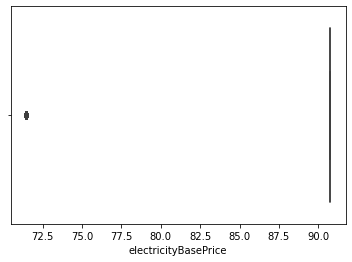

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


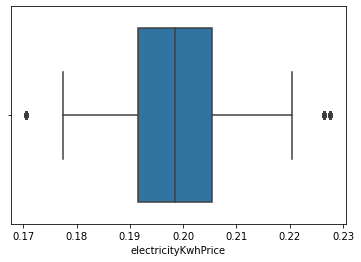

In [ ]:
boxPlot(data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


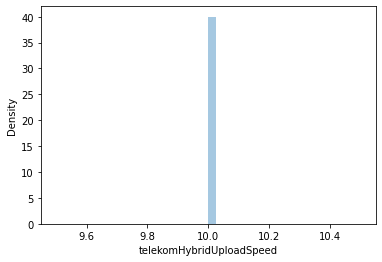

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


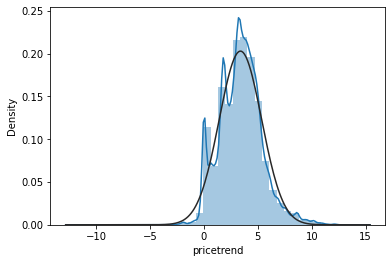

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


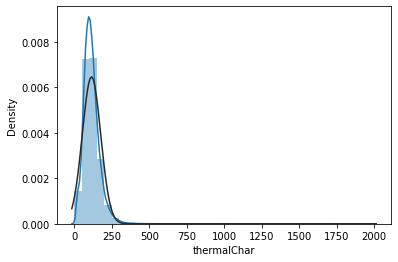

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


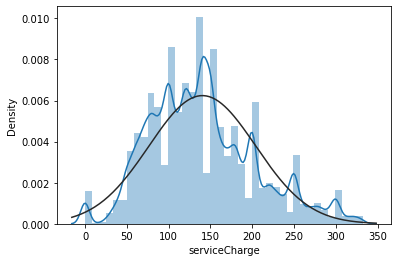

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


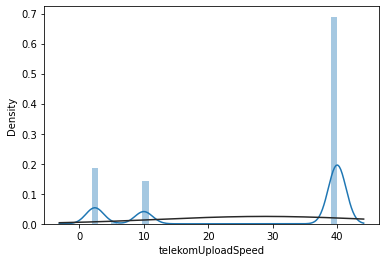

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


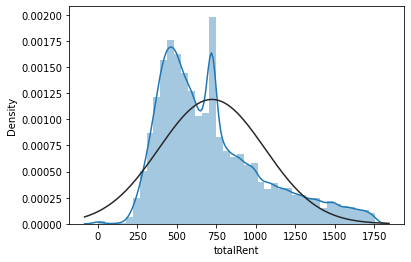

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


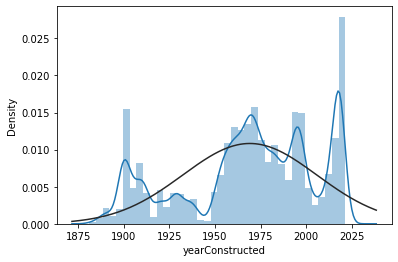

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


LinAlgError: ignored

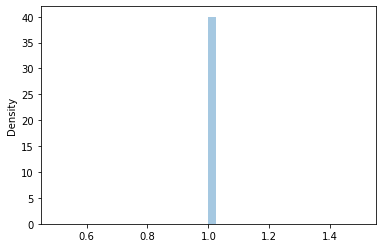

In [ ]:
distribution(data)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
serviceCharge,218150.0,133.794845,56.587169,0.00,90.00,130.00000,170.000000,293.00
picturecount,218150.0,9.285661,5.987188,0.00,5.00,9.00000,12.000000,121.00
pricetrend,218150.0,3.149636,1.789321,-2.44,1.88,3.23000,4.350000,8.82
telekomUploadSpeed,218150.0,28.823057,15.318847,1.00,10.00,40.00000,40.000000,40.00
totalRent,218150.0,709.147677,281.259673,0.00,475.00,670.04500,902.000000,1520.00
baseRentRange,218150.0,3.338698,1.906907,1.00,2.00,3.00000,5.000000,9.00
thermalChar,218150.0,113.785137,35.639029,0.20,99.00,115.00000,118.000000,260.00
floor,218150.0,2.162517,1.212160,-1.00,1.00,2.00000,3.000000,6.00
numberOfFloors,218150.0,3.562792,0.836597,2.00,3.00,4.00000,4.000000,5.00
noRoomsRange,218150.0,2.476360,0.871676,1.00,2.00,2.00000,3.000000,5.00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


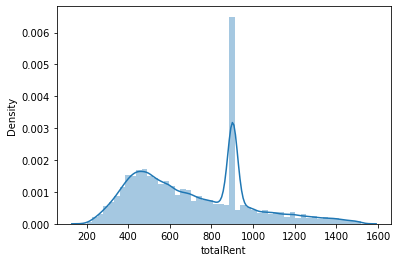

In [ ]:
sns.distplot(data['totalRent'])

In [ ]:
data[data['totalRent']<200]=data['totalRent'].mean()

In [ ]:
data['totalRent'].describe()

count    203414.000000
mean        708.384179
std         272.783842
min         200.000000
25%         480.000000
50%         675.000000
75%         902.000000
max        1520.000000
Name: totalRent, dtype: float64

In [ ]:
data.loc[data['totalRent']<200]=data['totalRent'].mean()

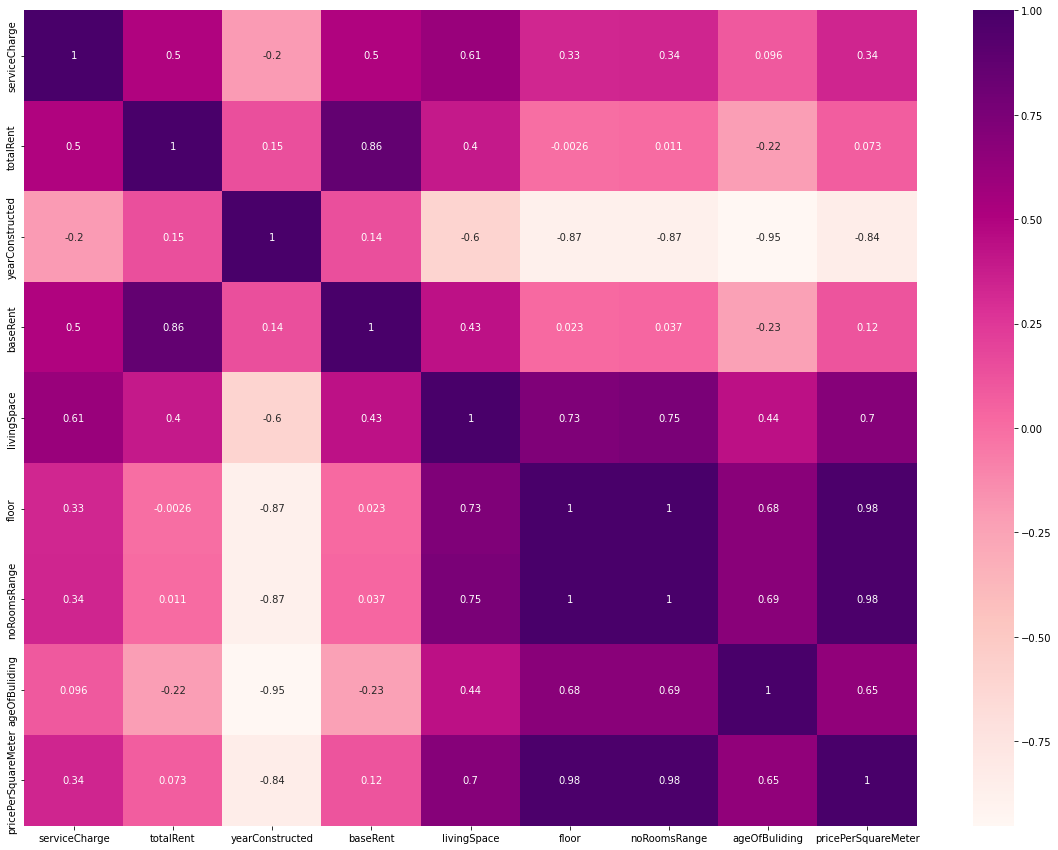

In [ ]:
plt.figure(figsize = (20,15))
sns.heatmap(data.corr(),annot=True,cmap='RdPu')
plt.show()

# **Modeling**

In [ ]:
data['condition'].value_counts()

well_kept                             107787
fully_renovated                        20032
refurbished                            19337
mint_condition                         14711
first_time_use                         14444
modernized                             13497
first_time_use_after_refurbishment     10485
other                                   2872
Name: condition, dtype: int64

In [ ]:
data.drop(data.loc[data['condition']==707.5594666050501].index, inplace=True)

In [ ]:
data.drop(data.loc[data['regio2']==707.6072366558054].index, inplace=True)

In [ ]:
predict_data = data.copy()

In [ ]:
predict_data.head()

,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,cellar,baseRent,livingSpace,condition,lift,typeOfFlat,floor,noRoomsRange,garden,regio2,ageOfBuliding,pricePerSquareMeter
0,245.00,central_heating,False,False,840.0,1965.0,False,True,595.0,86.00,well_kept,False,ground_floor,1.0,4.0,True,Dortmund,57.0,6.918605
2,255.00,floor_heating,True,True,1300.0,2019.0,False,True,965.0,83.80,first_time_use,True,apartment,3.0,3.0,False,Dresden,3.0,11.515513
3,58.15,district_heating,False,True,902.0,1964.0,False,False,343.0,58.15,well_kept,False,other,3.0,3.0,False,Mittelsachsen_Kreis,58.0,5.898538
4,138.00,self_contained_central_heating,False,True,903.0,1950.0,False,False,765.0,84.97,refurbished,False,apartment,1.0,3.0,False,Bremen,72.0,9.003178
5,142.00,gas_heating,False,True,902.0,1999.0,True,False,315.2,53.43,well_kept,False,apartment,3.0,2.0,False,Schleswig_Flensburg_Kreis,23.0,5.899308


# ***Scale Data***

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
for col in predict_data.columns:
  if predict_data[col].dtype=='int64' or predict_data[col].dtype=='float64' :
    if col!='totalRent':
      predict_data[col]=(predict_data[col]-predict_data[col].min())/(predict_data[col].max()-predict_data[col].min())
predict_data

,regio1,serviceCharge,heatingType,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,cellar,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,thermalChar,floor,numberOfFloors,noRoomsRange,garden,ageOfBuliding,pricePerSquareMeter
0,Nordrhein_Westfalen,0.836177,central_heating,False,False,0.049587,0.626998,0.230769,840.0,0.885321,False,True,0.004950,0.000684,well_kept,normal,negotiable,False,0.375,ground_floor,0.697460,0.285714,0.333333,0.75,True,0.114679,0.003786
1,Rheinland_Pfalz,0.457338,self_contained_central_heating,False,True,0.066116,0.524867,0.230769,902.0,0.799083,False,False,0.006658,0.000711,refurbished,normal,no,False,0.500,ground_floor,0.441878,0.571429,0.666667,0.50,False,0.200917,0.004920
2,Sachsen,0.870307,floor_heating,True,True,0.066116,0.458259,0.035897,1300.0,0.934862,False,True,0.008033,0.000664,first_time_use,sophisticated,negotiable,True,0.625,apartment,0.441878,0.571429,0.666667,0.50,False,0.065138,0.006303
3,Sachsen,0.198464,district_heating,False,True,0.074380,0.352575,1.000000,902.0,0.884404,False,False,0.002850,0.000433,well_kept,normal,negotiable,False,0.125,other,0.330254,0.571429,0.666667,0.50,False,0.115596,0.003227
4,Bremen,0.470990,self_contained_central_heating,False,True,0.157025,0.435169,0.717949,903.0,0.871560,False,False,0.006367,0.000675,refurbished,normal,negotiable,False,0.500,apartment,0.726328,0.285714,0.666667,0.50,False,0.128440,0.004927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268843,Sachsen,0.409556,central_heating,False,True,0.099174,0.394316,1.000000,368.0,0.853211,False,True,0.002058,0.000405,other,simple,negotiable,False,0.000,apartment,0.495766,0.285714,0.666667,0.25,True,0.146789,0.002466
268844,Nordrhein_Westfalen,0.273038,gas_heating,False,False,0.099174,0.445826,0.035897,670.0,0.887156,False,False,0.004908,0.000675,first_time_use_after_refurbishment,sophisticated,negotiable,False,0.375,roof_storey,0.441878,0.571429,0.333333,0.50,False,0.112844,0.003798
268845,Bayern,0.307167,heat_pump,False,True,0.000000,0.460036,0.230769,910.0,0.932110,False,True,0.006825,0.000720,mint_condition,sophisticated,no,False,0.625,roof_storey,0.441878,0.571429,0.666667,0.50,False,0.067890,0.004987
268847,Hessen,0.750853,central_heating,False,True,0.173554,0.474245,1.000000,930.0,0.885321,False,True,0.005408,0.000765,well_kept,normal,negotiable,False,0.500,apartment,0.618052,0.285714,0.000000,0.75,True,0.114679,0.003744


In [ ]:
for col in predict_data.columns:
  if predict_data[col].dtype=='int64' or predict_data[col].dtype=='float64' :
    if col!='totalRent':
      predict_data[col]=(predict_data[col]-predict_data[col].mean())/(predict_data[col].std())
predict_data

,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,cellar,baseRent,livingSpace,condition,lift,typeOfFlat,floor,noRoomsRange,garden,regio2,ageOfBuliding,pricePerSquareMeter
0,1.955727,central_heating,False,False,840.0,-0.385685,False,True,0.300539,0.983735,well_kept,False,ground_floor,-0.916275,1.948279,True,Dortmund,0.385685,-0.302966
2,2.131035,floor_heating,True,True,1300.0,1.826918,False,True,1.781181,0.877409,first_time_use,True,apartment,0.651372,0.713773,False,Dresden,-1.826918,0.802818
3,-1.319903,district_heating,False,True,902.0,-0.426659,False,False,-0.707897,-0.362254,well_kept,False,other,0.651372,0.713773,False,Mittelsachsen_Kreis,0.426659,-0.548342
4,0.079931,self_contained_central_heating,False,True,903.0,-1.000296,False,False,0.980834,0.933955,refurbished,False,apartment,-0.916275,0.713773,False,Bremen,1.000296,0.198477
5,0.150055,gas_heating,False,True,902.0,1.007436,True,False,-0.819145,-0.590371,well_kept,False,apartment,0.651372,-0.520733,False,Schleswig_Flensburg_Kreis,-1.007436,-0.548157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,-0.761547,other,False,True,910.0,1.703996,False,True,1.200929,1.177055,mint_condition,False,roof_storey,0.651372,0.713773,False,Weilheim_Schongau_Kreis,-1.703996,0.224440
268846,1.517457,gas_heating,False,True,1150.0,0.351850,True,False,1.641120,2.385303,well_kept,False,apartment,-0.916275,0.713773,False,Bergstraße_Kreis,-0.351850,-0.021920
268847,1.517457,central_heating,False,True,930.0,-0.385685,False,True,0.520635,1.418704,well_kept,False,apartment,-0.916275,1.948279,True,Limburg_Weilburg_Kreis,0.385685,-0.321368
268848,0.728571,other,True,True,1015.0,1.826918,False,True,1.280964,0.210456,first_time_use,True,apartment,0.651372,-0.520733,False,Köln,-1.826918,0.919361


In [ ]:
data1 = pd.DataFrame(scaler.fit_transform(data1),
                     columns = list(data1.columns))

# ***Dummy Variable***

In [ ]:
columns = []
for cols in predict_data.columns:
    if predict_data[cols].dtype == 'object' or predict_data[cols].dtype == 'bool':
        columns.append(cols)

In [ ]:
# 'telekomTvOffer','firingTypes',yearConstructedRange,'cellar',  'garden' , 'petsAllowed', 
dummy_df = pd.get_dummies(predict_data[columns])
dummy_df.head()

,heatingType_central_heating,heatingType_district_heating,heatingType_floor_heating,heatingType_gas_heating,heatingType_other,heatingType_self_contained_central_heating,newlyConst_False,newlyConst_True,balcony_False,balcony_True,hasKitchen_False,hasKitchen_True,cellar_False,cellar_True,condition_first_time_use,condition_first_time_use_after_refurbishment,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_other,condition_refurbished,condition_well_kept,lift_False,lift_True,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat,garden_False,garden_True,regio2_Aachen,regio2_Aachen_Kreis,regio2_Ahrweiler_Kreis,regio2_Aichach_Friedberg_Kreis,regio2_Alb_Donau_Kreis,regio2_Altenburger_Land_Kreis,regio2_Altenkirchen_Westerwald_Kreis,regio2_Altmarkkreis_Salzwedel,regio2_Altötting_Kreis,regio2_Alzey_Worms_Kreis,regio2_Amberg,regio2_Amberg_Sulzbach_Kreis,regio2_Ammerland_Kreis,regio2_Anhalt_Bitterfeld_Kreis,regio2_Ansbach,regio2_Ansbach_Kreis,regio2_Aschaffenburg,regio2_Aschaffenburg_Kreis,regio2_Augsburg,regio2_Augsburg_Kreis,regio2_Aurich_Kreis,regio2_Bad_Doberan_Kreis,regio2_Bad_Dürkheim_Kreis,regio2_Bad_Kissingen_Kreis,regio2_Bad_Kreuznach_Kreis,regio2_Bad_Tölz_Wolfratshausen_Kreis,regio2_Baden_Baden,regio2_Bamberg,regio2_Bamberg_Kreis,regio2_Barnim_Kreis,regio2_Bautzen_Kreis,regio2_Bayreuth,regio2_Bayreuth_Kreis,regio2_Berchtesgadener_Land_Kreis,regio2_Bergstraße_Kreis,regio2_Berlin,regio2_Bernkastel_Wittlich_Kreis,regio2_Biberach_Kreis,regio2_Bielefeld,regio2_Birkenfeld_Kreis,regio2_Bitburg_Prüm_Kreis,regio2_Bochum,regio2_Bodenseekreis,regio2_Bonn,regio2_Borken_Kreis,regio2_Bottrop,regio2_Brandenburg_an_der_Havel,regio2_Braunschweig,regio2_Breisgau_Hochschwarzwald_Kreis,regio2_Bremen,regio2_Bremerhaven,regio2_Burgenlandkreis,regio2_Böblingen_Kreis,regio2_Börde_Kreis,regio2_Calw_Kreis,regio2_Celle_Kreis,regio2_Cham_Kreis,regio2_Chemnitz,regio2_Cloppenburg_Kreis,regio2_Coburg,regio2_Coburg_Kreis,regio2_Cochem_Zell_Kreis,regio2_Coesfeld_Kreis,regio2_Cottbus,regio2_Cuxhaven_Kreis,regio2_Dachau_Kreis,regio2_Dahme_Spreewald_Kreis,regio2_Darmstadt,regio2_Darmstadt_Dieburg_Kreis,regio2_Deggendorf_Kreis,regio2_Delmenhorst,regio2_Demmin_Kreis,regio2_Dessau_Roßlau,regio2_Diepholz_Kreis,regio2_Dillingen_an_der_Donau_Kreis,regio2_Dingolfing_Landau_Kreis,regio2_Dithmarschen_Kreis,regio2_Donau_Ries_Kreis,regio2_Donnersbergkreis,regio2_Dortmund,regio2_Dresden,regio2_Duisburg,regio2_Düren_Kreis,regio2_Düsseldorf,regio2_Ebersberg_Kreis,regio2_Eichsfeld_Kreis,regio2_Eichstätt_Kreis,regio2_Eisenach,regio2_Elbe_Elster_Kreis,regio2_Emden,regio2_Emmendingen_Kreis,regio2_Emsland_Kreis,regio2_Ennepe_Ruhr_Kreis,regio2_Enzkreis,regio2_Erding_Kreis,regio2_Erfurt,regio2_Erlangen,regio2_Erlangen_Höchstadt_Kreis,regio2_Erzgebirgskreis,regio2_Essen,regio2_Esslingen_Kreis,regio2_Euskirchen_Kreis,regio2_Flensburg,regio2_Forchheim_Kreis,regio2_Frankenthal_Pfalz,regio2_Frankfurt_Oder,regio2_Frankfurt_am_Main,regio2_Freiburg_im_Breisgau,regio2_Freising_Kreis,regio2_Freudenstadt_Kreis,regio2_Freyung_Grafenau_Kreis,regio2_Friesland_Kreis,regio2_Fulda_Kreis,regio2_Fürstenfeldbruck_Kreis,regio2_Fürth,regio2_Fürth_Kreis,regio2_Garmisch_Partenkirchen_Kreis,regio2_Gelsenkirchen,regio2_Gera,regio2_Germersheim_Kreis,regio2_Gießen_Kreis,regio2_Gifhorn_Kreis,regio2_Goslar_Kreis,regio2_Gotha_Kreis,regio2_Grafschaft_Bentheim_Kreis,regio2_Greifswald,regio2_Greiz_Kreis,regio2_Groß_Gerau_Kreis,regio2_Göppingen_Kreis,regio2_Görlitz,regio2_Görlitz_Kreis,regio2_Göttingen_Kreis,regio2_Günzburg_Kreis,regio2_Güstrow_Kreis,regio2_Gütersloh_Kreis,regio2_Hagen,regio2_Halle_Saale,regio2_Hamburg,regio2_Hameln_Pyrmont_Kreis,regio2_Hamm,regio2_Hannover,regio2_Hannover_Kreis,regio2_Harburg_Kreis,regio2_Harz_Kreis,regio2_Havelland_Kreis,regio2_Haßberge_Kreis,regio2_Heidekreis,regio2_Heidelberg,regio2_Heidenheim_Kreis,regio2_Heilbronn,regio2_

In [ ]:
predict_data = pd.concat([predict_data,dummy_df] , axis = 1)
predict_data.head()

,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,cellar,baseRent,livingSpace,condition,lift,typeOfFlat,floor,noRoomsRange,garden,regio2,ageOfBuliding,pricePerSquareMeter,heatingType_central_heating,heatingType_district_heating,heatingType_floor_heating,heatingType_gas_heating,heatingType_other,heatingType_self_contained_central_heating,newlyConst_False,newlyConst_True,balcony_False,balcony_True,hasKitchen_False,hasKitchen_True,cellar_False,cellar_True,condition_first_time_use,condition_first_time_use_after_refurbishment,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_other,condition_refurbished,condition_well_kept,lift_False,lift_True,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat,garden_False,garden_True,regio2_Aachen,regio2_Aachen_Kreis,regio2_Ahrweiler_Kreis,regio2_Aichach_Friedberg_Kreis,regio2_Alb_Donau_Kreis,regio2_Altenburger_Land_Kreis,regio2_Altenkirchen_Westerwald_Kreis,regio2_Altmarkkreis_Salzwedel,regio2_Altötting_Kreis,regio2_Alzey_Worms_Kreis,regio2_Amberg,regio2_Amberg_Sulzbach_Kreis,regio2_Ammerland_Kreis,regio2_Anhalt_Bitterfeld_Kreis,regio2_Ansbach,regio2_Ansbach_Kreis,regio2_Aschaffenburg,regio2_Aschaffenburg_Kreis,regio2_Augsburg,regio2_Augsburg_Kreis,regio2_Aurich_Kreis,regio2_Bad_Doberan_Kreis,regio2_Bad_Dürkheim_Kreis,regio2_Bad_Kissingen_Kreis,regio2_Bad_Kreuznach_Kreis,regio2_Bad_Tölz_Wolfratshausen_Kreis,regio2_Baden_Baden,regio2_Bamberg,regio2_Bamberg_Kreis,regio2_Barnim_Kreis,regio2_Bautzen_Kreis,regio2_Bayreuth,regio2_Bayreuth_Kreis,regio2_Berchtesgadener_Land_Kreis,regio2_Bergstraße_Kreis,regio2_Berlin,regio2_Bernkastel_Wittlich_Kreis,regio2_Biberach_Kreis,regio2_Bielefeld,regio2_Birkenfeld_Kreis,regio2_Bitburg_Prüm_Kreis,regio2_Bochum,regio2_Bodenseekreis,regio2_Bonn,regio2_Borken_Kreis,regio2_Bottrop,regio2_Brandenburg_an_der_Havel,regio2_Braunschweig,regio2_Breisgau_Hochschwarzwald_Kreis,regio2_Bremen,regio2_Bremerhaven,regio2_Burgenlandkreis,regio2_Böblingen_Kreis,regio2_Börde_Kreis,regio2_Calw_Kreis,regio2_Celle_Kreis,regio2_Cham_Kreis,regio2_Chemnitz,regio2_Cloppenburg_Kreis,regio2_Coburg,regio2_Coburg_Kreis,regio2_Cochem_Zell_Kreis,regio2_Coesfeld_Kreis,regio2_Cottbus,regio2_Cuxhaven_Kreis,regio2_Dachau_Kreis,regio2_Dahme_Spreewald_Kreis,regio2_Darmstadt,regio2_Darmstadt_Dieburg_Kreis,regio2_Deggendorf_Kreis,regio2_Delmenhorst,regio2_Demmin_Kreis,regio2_Dessau_Roßlau,regio2_Diepholz_Kreis,regio2_Dillingen_an_der_Donau_Kreis,regio2_Dingolfing_Landau_Kreis,regio2_Dithmarschen_Kreis,regio2_Donau_Ries_Kreis,regio2_Donnersbergkreis,regio2_Dortmund,regio2_Dresden,regio2_Duisburg,regio2_Düren_Kreis,regio2_Düsseldorf,regio2_Ebersberg_Kreis,regio2_Eichsfeld_Kreis,regio2_Eichstätt_Kreis,regio2_Eisenach,regio2_Elbe_Elster_Kreis,regio2_Emden,regio2_Emmendingen_Kreis,regio2_Emsland_Kreis,regio2_Ennepe_Ruhr_Kreis,regio2_Enzkreis,regio2_Erding_Kreis,regio2_Erfurt,regio2_Erlangen,regio2_Erlangen_Höchstadt_Kreis,regio2_Erzgebirgskreis,regio2_Essen,regio2_Esslingen_Kreis,regio2_Euskirchen_Kreis,regio2_Flensburg,regio2_Forchheim_Kreis,regio2_Frankenthal_Pfalz,regio2_Frankfurt_Oder,regio2_Frankfurt_am_Main,regio2_Freiburg_im_Breisgau,regio2_Freising_Kreis,regio2_Freudenstadt_Kreis,regio2_Freyung_Grafenau_Kreis,regio2_Friesland_Kreis,regio2_Fulda_Kreis,regio2_Fürstenfeldbruck_Kreis,regio2_Fürth,regio2_Fürth_Kreis,regio2_Garmisch_Partenkirchen_Kreis,regio2_Gelsenkirchen,regio2_Gera,regio2_Germersheim_Kreis,regio2_Gießen_Kreis,regio2_Gifhorn_Kreis,regio2_Goslar_Kreis,regio2_Gotha_Kreis,regio2_Grafschaft_Bentheim_Kreis,regio2_Greifswald,regio2_Greiz_Kreis,regio2_Groß_Gerau_Kreis,regio2_Göppingen_Kreis,regio2_Görlitz,regio2_Görlitz_Kreis,regio2_Göttingen_Kreis,regio2_Günzburg_Kreis,regio2_Güstrow_Kreis,regio2_Gütersloh_Kreis,regio2_Hagen,regio2_Halle_Saale,regio2_Hamburg,regio2_Hameln_Pyrmont_Kreis,regio2_Hamm,reg

In [ ]:
# 'telekomTvOffer','firingTypes'yearConstructedRange
predict_data.drop(columns = columns,inplace = True)
predict_data.head()

,serviceCharge,totalRent,yearConstructed,baseRent,livingSpace,floor,noRoomsRange,ageOfBuliding,pricePerSquareMeter,heatingType_central_heating,heatingType_district_heating,heatingType_floor_heating,heatingType_gas_heating,heatingType_other,heatingType_self_contained_central_heating,newlyConst_False,newlyConst_True,balcony_False,balcony_True,hasKitchen_False,hasKitchen_True,cellar_False,cellar_True,condition_first_time_use,condition_first_time_use_after_refurbishment,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_other,condition_refurbished,condition_well_kept,lift_False,lift_True,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat,garden_False,garden_True,regio2_Aachen,regio2_Aachen_Kreis,regio2_Ahrweiler_Kreis,regio2_Aichach_Friedberg_Kreis,regio2_Alb_Donau_Kreis,regio2_Altenburger_Land_Kreis,regio2_Altenkirchen_Westerwald_Kreis,regio2_Altmarkkreis_Salzwedel,regio2_Altötting_Kreis,regio2_Alzey_Worms_Kreis,regio2_Amberg,regio2_Amberg_Sulzbach_Kreis,regio2_Ammerland_Kreis,regio2_Anhalt_Bitterfeld_Kreis,regio2_Ansbach,regio2_Ansbach_Kreis,regio2_Aschaffenburg,regio2_Aschaffenburg_Kreis,regio2_Augsburg,regio2_Augsburg_Kreis,regio2_Aurich_Kreis,regio2_Bad_Doberan_Kreis,regio2_Bad_Dürkheim_Kreis,regio2_Bad_Kissingen_Kreis,regio2_Bad_Kreuznach_Kreis,regio2_Bad_Tölz_Wolfratshausen_Kreis,regio2_Baden_Baden,regio2_Bamberg,regio2_Bamberg_Kreis,regio2_Barnim_Kreis,regio2_Bautzen_Kreis,regio2_Bayreuth,regio2_Bayreuth_Kreis,regio2_Berchtesgadener_Land_Kreis,regio2_Bergstraße_Kreis,regio2_Berlin,regio2_Bernkastel_Wittlich_Kreis,regio2_Biberach_Kreis,regio2_Bielefeld,regio2_Birkenfeld_Kreis,regio2_Bitburg_Prüm_Kreis,regio2_Bochum,regio2_Bodenseekreis,regio2_Bonn,regio2_Borken_Kreis,regio2_Bottrop,regio2_Brandenburg_an_der_Havel,regio2_Braunschweig,regio2_Breisgau_Hochschwarzwald_Kreis,regio2_Bremen,regio2_Bremerhaven,regio2_Burgenlandkreis,regio2_Böblingen_Kreis,regio2_Börde_Kreis,regio2_Calw_Kreis,regio2_Celle_Kreis,regio2_Cham_Kreis,regio2_Chemnitz,regio2_Cloppenburg_Kreis,regio2_Coburg,regio2_Coburg_Kreis,regio2_Cochem_Zell_Kreis,regio2_Coesfeld_Kreis,regio2_Cottbus,regio2_Cuxhaven_Kreis,regio2_Dachau_Kreis,regio2_Dahme_Spreewald_Kreis,regio2_Darmstadt,regio2_Darmstadt_Dieburg_Kreis,regio2_Deggendorf_Kreis,regio2_Delmenhorst,regio2_Demmin_Kreis,regio2_Dessau_Roßlau,regio2_Diepholz_Kreis,regio2_Dillingen_an_der_Donau_Kreis,regio2_Dingolfing_Landau_Kreis,regio2_Dithmarschen_Kreis,regio2_Donau_Ries_Kreis,regio2_Donnersbergkreis,regio2_Dortmund,regio2_Dresden,regio2_Duisburg,regio2_Düren_Kreis,regio2_Düsseldorf,regio2_Ebersberg_Kreis,regio2_Eichsfeld_Kreis,regio2_Eichstätt_Kreis,regio2_Eisenach,regio2_Elbe_Elster_Kreis,regio2_Emden,regio2_Emmendingen_Kreis,regio2_Emsland_Kreis,regio2_Ennepe_Ruhr_Kreis,regio2_Enzkreis,regio2_Erding_Kreis,regio2_Erfurt,regio2_Erlangen,regio2_Erlangen_Höchstadt_Kreis,regio2_Erzgebirgskreis,regio2_Essen,regio2_Esslingen_Kreis,regio2_Euskirchen_Kreis,regio2_Flensburg,regio2_Forchheim_Kreis,regio2_Frankenthal_Pfalz,regio2_Frankfurt_Oder,regio2_Frankfurt_am_Main,regio2_Freiburg_im_Breisgau,regio2_Freising_Kreis,regio2_Freudenstadt_Kreis,regio2_Freyung_Grafenau_Kreis,regio2_Friesland_Kreis,regio2_Fulda_Kreis,regio2_Fürstenfeldbruck_Kreis,regio2_Fürth,regio2_Fürth_Kreis,regio2_Garmisch_Partenkirchen_Kreis,regio2_Gelsenkirchen,regio2_Gera,regio2_Germersheim_Kreis,regio2_Gießen_Kreis,regio2_Gifhorn_Kreis,regio2_Goslar_Kreis,regio2_Gotha_Kreis,regio2_Grafschaft_Bentheim_Kreis,regio2_Greifswald,regio2_Greiz_Kreis,regio2_Groß_Gerau_Kreis,regio2_Göppingen_Kreis,regio2_Görlitz,regio2_Görlitz_Kreis,regio2_Göttingen_Kreis,regio2_Günzburg_Kreis,regio2_Güstrow_Kreis,regio2_Gütersloh_Kreis,regio2_Hagen,regio2_Halle_Saale,regio2_Hamburg,regio2_Hameln_Pyrmont_Kreis,regio2_Hamm,regio2_Hannover,regio2_Hannover_Kreis,regio2_Harburg_Kreis,regio2_Harz_Kreis,regio2_Havellan

# ***Split data ***

In [ ]:
x = predict_data.drop(columns = ['totalRent'])
y = predict_data['totalRent'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=46)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.coef_

array([ 2.97363730e+01, -1.66312473e+02,  2.19092197e+02,  6.67238679e+00,
        3.98766767e-01,  6.94442324e+00, -1.67336981e+02, -4.05881019e+00,
        6.40761496e+11,  6.40761496e+11,  6.40761496e+11,  6.40761496e+11,
        6.40761496e+11,  6.40761496e+11, -1.09279650e+13, -1.09279650e+13,
       -4.72660229e+12, -4.72660229e+12, -2.03228833e+12, -2.03228833e+12,
       -1.80035163e+12, -1.80035163e+12, -6.63655250e+09, -6.63655250e+09,
       -6.63655250e+09, -6.63655249e+09, -6.63655250e+09, -6.63655249e+09,
       -6.63655250e+09, -6.63655249e+09,  9.80011644e+11,  9.80011644e+11,
       -1.84880038e+12, -1.84880038e+12, -1.84880038e+12, -1.84880038e+12,
       -1.84880038e+12, -1.84880038e+12, -1.84880038e+12, -1.84880038e+12,
        2.06378475e+10,  2.06378475e+10,  2.06378475e+10,  2.06378475e+10,
        2.06378475e+10,  2.06378475e+10,  2.06378475e+10,  2.06378475e+10,
        2.06378475e+10,  2.06378475e+10,  2.06378475e+10,  2.06378475e+10,
        2.06378475e+10,  

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

65.8236945895003

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

11731.125191372146

*Linear Regression*


In [ ]:
x = predict_data.drop(columns = ['totalRent'])
y = predict_data['totalRent'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=46)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.coef_

array([ 2.21032753e+01, -8.85448739e+13,  2.15275416e+02,  9.94605428e+00,
        1.68324511e+00,  6.21260561e+00, -8.85448739e+13, -6.95318545e+00,
       -4.41709519e+13, -4.41709519e+13, -4.41709519e+13, -4.41709519e+13,
       -4.41709519e+13, -4.41709519e+13,  3.50849759e+14,  3.50849759e+14,
       -2.08967921e+14, -2.08967921e+14, -2.15145818e+13, -2.15145818e+13,
       -2.29935619e+14, -2.29935619e+14, -5.47205237e+13, -5.47205237e+13,
       -5.47205237e+13, -5.47205237e+13, -5.47205237e+13, -5.47205237e+13,
       -5.47205237e+13, -5.47205237e+13, -1.68102160e+13, -1.68102160e+13,
        2.95687893e+13,  2.95687893e+13,  2.95687893e+13,  2.95687893e+13,
        2.95687893e+13,  2.95687893e+13,  2.95687893e+13,  2.95687893e+13,
       -3.57378663e+13, -3.57378663e+13,  7.64326325e+11,  7.64326325e+11,
        7.64326325e+11,  7.64326325e+11,  7.64326325e+11,  7.64326325e+11,
        7.64326325e+11,  7.64326325e+11,  7.64326325e+11,  7.64326325e+11,
        7.64326325e+11,  

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

86.00555156323831

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

17031.613103132604

In [ ]:
predict_data.shape

(204258, 450)

In [ ]:
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [ ]:
y_train =y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

In [ ]:
y_train.shape

(171702, 1)

In [ ]:
X_train.shape

(171702, 461)

In [ ]:
y_test.shape

(57235, 1)

In [ ]:
X_test.shape

(57235, 461)

In [ ]:
np.isnan(X_train).any()

serviceCharge              True
yearConstructed            True
baseRent                  False
livingSpace               False
floor                      True
                          ...  
regio2_Würzburg_Kreis     False
regio2_Zollernalbkreis    False
regio2_Zweibrücken        False
regio2_Zwickau            False
regio2_Zwickau_Kreis      False
Length: 461, dtype: bool

*Nural Network*

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [ ]:
hidden_units1 = 35
hidden_units2 = 20
hidden_units3 = 15
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [ ]:
import tensorflow as tf
# loss function

model.compile(
    loss="mse", 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)
# train the model
history = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    batch_size=64,
    # validation_split=0.2,
    validation_data=(X_test, y_test),
    shuffle=True
)

Epoch 1/100
2381/2381 [==============================] - 8s 3ms/step - loss: 35998.5000 - mean_absolute_error: 133.9921 - val_loss: 17281.5449 - val_mean_absolute_error: 89.0956
Epoch 2/100
2381/2381 [==============================] - 7s 3ms/step - loss: 25607.8262 - mean_absolute_error: 116.7007 - val_loss: 17114.8105 - val_mean_absolute_error: 83.9222
Epoch 3/100
2381/2381 [==============================] - 7s 3ms/step - loss: 22878.8242 - mean_absolute_error: 109.5575 - val_loss: 16973.8477 - val_mean_absolute_error: 89.6520
Epoch 4/100
2381/2381 [==============================] - 7s 3ms/step - loss: 21094.1055 - mean_absolute_error: 104.9174 - val_loss: 16930.5449 - val_mean_absolute_error: 86.6018
Epoch 5/100
2381/2381 [==============================] - 7s 3ms/step - loss: 20430.6074 - mean_absolute_error: 103.0061 - val_loss: 19202.2891 - val_mean_absolute_error: 94.6363
Epoch 6/100
2381/2381 [==============================] - 7s 3ms/step - loss: 20015.2383 - mean_absolute_error:

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 35)                16170     
                                                                 
 dropout_6 (Dropout)         (None, 35)                0         
                                                                 
 dense_13 (Dense)            (None, 20)                720       
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 dense_14 (Dense)            (None, 15)                315       
                                                                 
 dense_15 (Dense)            (None, 1)                 16        
                                                                 
Total params: 17,221
Trainable params: 17,221
Non-trai

In [ ]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    batch_size=128,
    validation_split=0.2,
    validation_data=(X_test, y_test),
    shuffle=True
)

Epoch 1/10
953/953 [==============================] - 5s 4ms/step - loss: 0.6292 - mean_squared_logarithmic_error: 0.6288 - val_loss: 0.0387 - val_mean_squared_logarithmic_error: 0.0387
Epoch 2/10
953/953 [==============================] - 3s 4ms/step - loss: 0.0641 - mean_squared_logarithmic_error: 0.0641 - val_loss: 0.0380 - val_mean_squared_logarithmic_error: 0.0381
Epoch 3/10
953/953 [==============================] - 4s 4ms/step - loss: 0.0644 - mean_squared_logarithmic_error: 0.0643 - val_loss: 0.0381 - val_mean_squared_logarithmic_error: 0.0381
Epoch 4/10
953/953 [==============================] - 3s 4ms/step - loss: 0.0641 - mean_squared_logarithmic_error: 0.0640 - val_loss: 0.0380 - val_mean_squared_logarithmic_error: 0.0380
Epoch 5/10
953/953 [==============================] - 3s 4ms/step - loss: 0.0641 - mean_squared_logarithmic_error: 0.0641 - val_loss: 0.0371 - val_mean_squared_logarithmic_error: 0.0371
Epoch 6/10
953/953 [==============================] - 4s 4ms/step - lo

In [ ]:
##########
# model = Sequential()
# model.add(Dense(20, input_dim=461))
# model.add(Dense(15, activation='sigmoid'))
# model.add(Dense(2, activation='sigmoid'))

# # compile the keras model
# model.compile(loss='binary_crossentropy', metrics=['accuracy'])

# # fit the keras model on the dataset
# fitness=model.fit(X_train, y_train, epochs=100 ,validation_data=(X_test, y_test),shuffle=True)

# model.summary()

# plt.plot(range(len(fitness.history['accuracy'])),fitness.history['accuracy'],c='m')
# plt.plot(range(len(fitness.history['accuracy'])),fitness.history['val_accuracy'],c='c')
# plt.title("accuracy")
# plt.legend(["accuracy","val_accuracy"])
# plt.show()

# plt.plot(range(len(fitness.history['loss'])),fitness.history['loss'],c='r')
# plt.plot(range(len(fitness.history['loss'])),fitness.history['val_loss'],c='b')
# plt.legend(['loss','val_loss'])
# plt.title("loss")
# plt.show()

# ...
# # evaluate the keras model
# _, accuracy = model.evaluate(X_test, y_test)
# print('Accuracy: %.2f' % (accuracy*100))
###############

*SVR*

In [ ]:
from sklearn.svm import SVR
# create the model object
regressor = SVR(kernel = 'rbf')
# fit the model on the data
regressor.fit(X_train, y_train)

*Decision Tree*

In [ ]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 

In [ ]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 22) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=22)

In [ ]:
y_pred_tree = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred_tree)

73.63971717987084

*RandomForestRegressor(ensambling)*

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


In [ ]:
RandFor = RandomForestRegressor(random_state=22)

RandFor.fit(X_train, y_train)


RandomForestRegressor(random_state=22)

In [ ]:
y_pred_rand = RandFor.predict(X_test)

In [ ]:
rmse = mean_squared_error(y_test, y_pred_rand, squared=False)
# square=false so its RMSE and not MSE
print(rmse)

115.20731205338224


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred_rand)

65.8944858502367

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
#try alpha=0.1
ridgereg = Ridge(alpha=0.00000001, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)

# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


R-Square Value 0.7740678776121752


mean_absolute_error : 85.67882910701773


mean_squared_error :  16988.554336271078


root_mean_squared_error :  130.34014859693494


In [ ]:
# try alpha=0.001 and examine coefficients
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)

# try alpha=0.01 and examine coefficients
# lassoreg = Lasso(alpha=0.01, normalize=True)
# lassoreg.fit(X_train, y_train)
# print(lassoreg.coef_)

# calculate RMSE (for alpha=0.01)
y_pred = lassoreg.predict(X_test)


# calculate MAE, MSE, RMSE
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


[ 2.32567438e+01  3.79669078e-01  2.13208933e+02  1.01828400e+01
  5.12297078e-01  6.14421925e+00 -3.58766961e-01 -4.20135247e+00
  0.00000000e+00  1.27022796e+01  0.00000000e+00 -2.29867042e+01
 -1.31094036e+01 -8.91618668e+00  0.00000000e+00 -0.00000000e+00
 -2.25172080e+00  1.19560445e-15  4.84953781e+00 -4.86273978e-15
 -1.57994346e+00  3.50612189e-15  0.00000000e+00 -5.42395635e+00
 -8.92608375e-01  9.00334573e-01 -7.14752390e-01  5.44258614e+00
 -8.89965986e+00  5.82205259e+00 -7.68249650e+00  0.00000000e+00
  3.21880208e+00  0.00000000e+00 -0.00000000e+00 -5.05719394e+00
 -1.81458574e-01 -1.88808795e+00 -4.25142577e+00  5.90339948e+00
  9.60219008e+00 -0.00000000e+00 -5.91592552e+00  1.72077744e+00
  4.55417046e+00 -0.00000000e+00 -1.49425174e+01 -3.88160082e+01
  0.00000000e+00 -4.24932822e+01 -0.00000000e+00 -0.00000000e+00
 -8.40291278e+00 -3.36730555e+01  2.15132171e+01  0.00000000e+00
 -2.83693441e+01 -0.00000000e+00 -1.67257597e+00 -0.00000000e+00
  0.00000000e+00  3.42062

In [ ]:
import lightgbm as lgb

In [ ]:
d_train = lgb.Dataset(X_train, label=y_train) # Load the dataset and test

# parameters for this model
params = {
        'n_estimators': 10000,
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'max_depth': -1,
        'learning_rate': 0.01,
        'subsample': 0.72,
        'subsample_freq': 4,
        'feature_fraction': 0.4,
        'lambda_l1': 1,
        'lambda_l2': 1,
        'seed': 46,
        }

clf = lgb.train(params, d_train, 100)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([843.83657793, 867.62769902, 673.50998149, ..., 784.40654188,
       427.52057627, 598.69007532])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def compute_rmse(model, X, y_true, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y_true, y_pred)
    rmse = pow(mse,0.5)
    print(f'Root Mean Squared Error for {name}: {rmse}')

In [ ]:
compute_rmse(clf, X_train, y_train, 'Training Set')
compute_rmse(clf, X_test, y_test, 'Test Set')

Root Mean Squared Error for Training Set: 102.32023052114576
Root Mean Squared Error for Test Set: 117.08535682191605


In [ ]:
X_train.shape

(172491, 459)

In [ ]:
from sklearn.decomposition import PCA
# pca = PCA(n_components =400)
pca = PCA(0.9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
X_train.shape

(172491, 22)

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
mean_absolute_error(y_test, y_pred)

68.60192957445054

**Tuning**

In [ ]:

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


*Group By regio1*

In [ ]:
data

,regio1,serviceCharge,heatingType,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,cellar,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,thermalChar,floor,numberOfFloors,noRoomsRange,garden,ageOfBuliding,pricePerSquareMeter
0,Nordrhein_Westfalen,245.00,central_heating,False,False,6.0,4.62,10.0,840.0,1965.0,False,True,595.0,86.00,well_kept,normal,negotiable,False,4.0,ground_floor,181.40,1.0,3.0,4.0,True,57.0,6.918605
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,8.0,3.47,10.0,902.0,1871.0,False,False,800.0,89.00,refurbished,normal,no,False,5.0,ground_floor,115.00,3.0,4.0,3.0,False,151.0,8.988764
2,Sachsen,255.00,floor_heating,True,True,8.0,2.72,2.4,1300.0,2019.0,False,True,965.0,83.80,first_time_use,sophisticated,negotiable,True,6.0,apartment,115.00,3.0,4.0,3.0,False,3.0,11.515513
3,Sachsen,58.15,district_heating,False,True,9.0,1.53,40.0,902.0,1964.0,False,False,343.0,58.15,well_kept,normal,negotiable,False,2.0,other,86.00,3.0,4.0,3.0,False,58.0,5.898538
4,Bremen,138.00,self_contained_central_heating,False,True,19.0,2.46,29.0,903.0,1950.0,False,False,765.0,84.97,refurbished,normal,negotiable,False,5.0,apartment,188.90,1.0,4.0,3.0,False,72.0,9.003178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268843,Sachsen,120.00,central_heating,False,True,12.0,2.00,40.0,368.0,1930.0,False,True,248.0,55.00,other,simple,negotiable,False,1.0,apartment,129.00,1.0,4.0,2.0,True,92.0,4.509091
268844,Nordrhein_Westfalen,80.00,gas_heating,False,False,12.0,2.58,2.4,670.0,1967.0,False,False,590.0,85.00,first_time_use_after_refurbishment,sophisticated,negotiable,False,4.0,roof_storey,115.00,3.0,3.0,3.0,False,55.0,6.941176
268845,Bayern,90.00,heat_pump,False,True,0.0,2.74,10.0,910.0,2016.0,False,True,820.0,90.00,mint_condition,sophisticated,no,False,6.0,roof_storey,115.00,3.0,4.0,3.0,False,6.0,9.111111
268847,Hessen,220.00,central_heating,False,True,21.0,2.90,40.0,930.0,1965.0,False,True,650.0,95.00,well_kept,normal,negotiable,False,5.0,apartment,160.77,1.0,2.0,4.0,True,57.0,6.842105


In [ ]:
data['regio1'].value_counts()

Nordrhein_Westfalen       51238
Sachsen                   40921
Sachsen_Anhalt            16285
Bayern                    14411
Niedersachsen             13450
Hessen                    11683
Baden_Württemberg         10920
Rheinland_Pfalz            6604
Thüringen                  6527
Mecklenburg_Vorpommern     5695
Brandenburg                5678
Schleswig_Holstein         5321
Berlin                     5091
Bremen                     2469
Hamburg                    2135
Saarland                   1137
Name: regio1, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:

for region in list(data['regio1'].unique()):
  print(region)

  predict_data=data[data['regio1']==region]
  predict_data.drop(columns=['regio1'],inplace=True)


  for col in predict_data.columns:
    if predict_data[col].dtype=='int64' or predict_data[col].dtype=='float64':
      if col!='totalRent':
        predict_data[col]=(predict_data[col]-predict_data[col].mean())/(predict_data[col].std())

  columns = []
  for cols in predict_data.columns:
    if predict_data[cols].dtype == 'object' or predict_data[cols].dtype == 'bool':
        columns.append(cols)

  dummy_df = pd.get_dummies(predict_data[columns])


  predict_data = pd.concat([predict_data,dummy_df] , axis = 1)
  

  predict_data.drop(columns = columns,inplace = True)
  

  x = predict_data.drop(columns = ['totalRent'])
  y = predict_data['totalRent'].values

  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  

  reg = LinearRegression().fit(X_train, y_train)

  # print(reg.coef_)

  y_pred = reg.predict(X_test)
  print("MAE : ",mean_absolute_error(y_test, y_pred))



Nordrhein_Westfalen


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


MAE :  92.3911990413867
Sachsen


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


MAE :  82.25134166418366
Bremen
MAE :  71.82351847165992
Schleswig_Holstein


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=err

MAE :  60.75317326877934
Baden_Württemberg


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


MAE :  70.97317880036631
Rheinland_Pfalz
MAE :  101.79810122539743
Thüringen


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=err

MAE :  95.36399191232772
Hessen


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=err

MAE :  79.25357706862431
Hamburg
MAE :  58.73120063676911
Sachsen_Anhalt


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

MAE :  99.20891896300277
Mecklenburg_Vorpommern
MAE :  72.35732703676456
Bayern


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=err

MAE :  63.61362506910119
Niedersachsen


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


MAE :  113.83403279330167
Brandenburg
MAE :  60.8354876574666
Berlin


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=err

MAE :  2851315327.039712
Saarland
MAE :  103.46769892175854
Total MAE :  178207284.60600528


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
